In [3]:
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cd ../../src

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


In [3]:
path = '../experiments/seedsearch/seed/seed_lstm/simplestate_secondslstm/binconcepts/lstm/raw_full/2022_02_14_0/'
gs_path = 'gridsearch results/supgs_l900_f0.pkl'

In [4]:
with open(path + gs_path, 'rb') as fp:
    gs = pickle.load(fp)

In [5]:
results = pd.DataFrame(gs._results).transpose()
results.head()

seed batch_size cell_type dropout early_stopping epochs loss n_cells  \
0  193         16       GRU       0           True    150  auc    [32]   
1  142         16       GRU       0           True    150  auc    [32]   
2  105         16       GRU       0           True    150  auc    [32]   
3  510         16       GRU       0           True    150  auc    [32]   
4  103         16       GRU       0           True    150  auc    [32]   

  n_layers optimiser padding_value shuffle verbose attention  flatten  \
0        1      adam            -1    True       1   dropout  average   
1        1      adam            -1    True       1   dropout  average   
2        1      adam            -1    True       1   dropout  average   
3        1      adam            -1    True       1   dropout  average   
4        1      adam            -1    True       1   dropout  average   

                                         fold_scores mean_score std_score  \
0  [0.7592592592592593, 0.8333333333333334, 0.814...   0.764602  0.110909   
1  [0.7592592592592592, 0.8333333333333334, 0.805...   0.753866  0.119713   
2  [0.7037037037037036, 0.8611111111111112, 0.740...   0.712181  0.186639   
3  [0.7129629629629629, 0.8333333333333334, 0.759...   0.739565  0.135999   
4  [0.7222222222222221, 0.8703703703703703, 0.759...   0.743468   0.14632   

                                          fold_index  
0  {0: {'train': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, ...  
1  {0: {'train': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, ...  
2  {0: {'train': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, ...  
3  {0: {'train': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, ...  
4  {0: {'train': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, ...

In [6]:
results = results.sort_values('mean_score')

In [7]:
results[['seed', 'mean_score']]

seed mean_score
2    105   0.712181
9   2022   0.724106
43  1933   0.725611
30  2609   0.726917
6     24   0.730597
15  1015   0.730944
14  2107   0.731375
38    39   0.732106
31     5   0.732134
33     1   0.732417
45  1939   0.732537
23  1999   0.733505
16   216   0.734431
47   605   0.734597
32    42   0.735009
37   113   0.735829
34     2   0.736523
41  1965   0.736699
42  1966   0.737787
13   328   0.738741
27  2015   0.739023
3    510   0.739565
39     7   0.739829
7    274   0.739838
24  2002   0.741741
21    19   0.742759
46  1942    0.74287
4    103   0.743468
28  2018   0.743671
10  2020   0.743792
26  2009   0.744468
5     36   0.744926
40     9   0.746551
12  2510   0.747301
18  1011   0.753255
17   231   0.753685
25  2003   0.753843
1    142   0.753866
22  1997   0.754134
35     3    0.75519
29  2011   0.756148
11  2021   0.757046
8   4992   0.758157
48   286   0.759028
36    17   0.759051
0    193   0.764602
20   136   0.765486
44  1034   0.765778
19  1212    0.77687

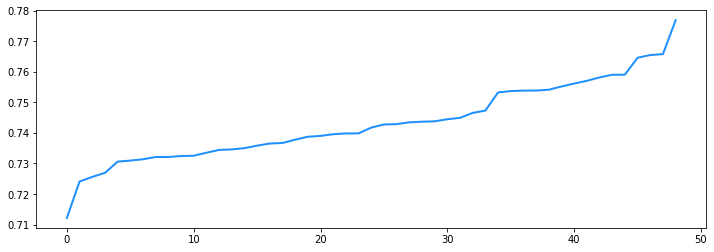

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(range(len(results['seed'])), results['mean_score'], color='dodgerblue', linewidth=2)

In [21]:
with open(path + 'config.yaml', 'rb') as fp:
    config = pickle.load(fp)

In [22]:
config

{'paths': {'sequenced_simulations': '../data/sequenced_simulations/'},
 'experiment': {'class_name': 'binconcepts',
  'root_name': 'seed_lstm/simplestate_secondslstm/binconcepts/lstm/raw_full/',
  'name': '2022_02_14_0',
  'old_root_name': 'blank/simplestate_secondslstm',
  'random_seed': 129,
  'n_folds': 'blank',
  'n_classes': 2,
  'class_map': '../data/experiment_keys/permutation_maps/nconcepts_binary.yaml'},
 'data': {'min_length': 0,
  'pipeline': {'sequencer': 'simplestate_secondslstm',
   'sequencer_interval': 5,
   'sequencer_dragasclick': True,
   'concatenator': {'type': 'chemconcat', 'tasks': ['2']},
   'demographic_filter': 'chemlab',
   'event_filter': 'nofilt',
   'break_filter': 'cumulseconds',
   'break_threshold': 0.6,
   'adjuster': 'full',
   'encoder': 'raw',
   'skipgram_weights': '',
   'skipgram_map': '',
   'aggregator': 'minmax',
   'encoders_aggregators_pairs': {1: ['actionspan', 'normagg'],
    2: ['1hot', 'aveagg']}},
  'adjuster': {'limit': 900},
  'filter

In [ ]:
with open(path + 'results/nested_xval_mlstm_l900.pkl', 'rb') as fp:
    

# Seed plots

## After training

In [8]:
%load_ext autoreload

In [11]:
from ml import load_tf_models as loader
from extractors.pipeline_maker import PipelineMaker

In [80]:
from matplotlib import pyplot as plt

In [52]:
%autoreload

In [53]:
experiment_path = '../experiments/seed_lstm/simplestate_secondslstm/binconcepts/lstm/raw_full/2022_02_18_0'
nns = loader.load_all_nn(experiment_path)

with open(experiment_path + '/config.yaml', 'rb') as fp:
    config = pickle.load(fp)

{'seed': [193], 'batch_size': [16], 'cell_type': ['GRU'], 'dropout': [0], 'early_stopping': [True], 'epochs': [3], 'loss': ['auc'], 'n_cells': [[32]], 'n_layers': [1], 'optimiser': ['adam'], 'padding_value': [-1], 'shuffle': [True], 'verbose': [1], 'attention': {'dropout': [0.05]}, 'flatten': ['average']}
dict_keys(['9', '2', '6', '8', '3', '7', '0', '4', '1', '5'])
(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 24, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 

Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_63 (GRU)                (None, 32)                4224      
                                                                 
 dense_63 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_66 (GRU)                (None, 32)                4224      
                                                                 
 dense_66 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_69 (GRU)                (None, 32)                4224      
                                                                 
 dense_69 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_72 (GRU)                (None, 32)                4224      
                                                                 
 dense_72 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_75 (GRU)                (None, 32)                4224      
                                                                 
 dense_75 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_78 (GRU)                (None, 32)                4224      
                                                                 
 dense_78 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_81 (GRU)                (None, 32)                4224      
                                                                 
 dense_81 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_84 (GRU)                (None, 32)                4224      
                                                                 
 dense_84 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_87 (GRU)                (None, 32)                4224      
                                                                 
 dense_87 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_90 (GRU)                (None, 32)                4224      
                                                                 
 dense_90 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_93 (GRU)                (None, 32)                4224      
                                                                 
 dense_93 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_96 (GRU)                (None, 32)                4224      
                                                                 
 dense_96 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_99 (GRU)                (None, 32)                4224      
                                                                 
 dense_99 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.172008

Model: "model_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_102 (GRU)               (None, 32)                4224      
                                                                 
 dense_102 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_105 (GRU)               (None, 32)                4224      
                                                                 
 dense_105 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_108 (GRU)               (None, 32)                4224      
                                                                 
 dense_108 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_111 (GRU)               (None, 32)                4224      
                                                                 
 dense_111 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_114 (GRU)               (None, 32)                4224      
                                                                 
 dense_114 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_117 (GRU)               (None, 32)                4224      
                                                                 
 dense_117 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_120 (GRU)               (None, 32)                4224      
                                                                 
 dense_120 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_123 (GRU)               (None, 32)                4224      
                                                                 
 dense_123 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_126 (GRU)               (None, 32)                4224      
                                                                 
 dense_126 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_129 (GRU)               (None, 32)                4224      
                                                                 
 dense_129 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_132 (GRU)               (None, 32)                4224      
                                                                 
 dense_132 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_135 (GRU)               (None, 32)                4224      
                                                                 
 dense_135 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_138 (GRU)               (None, 32)                4224      
                                                                 
 dense_138 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_141 (GRU)               (None, 32)                4224      
                                                                 
 dense_141 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_144 (GRU)               (None, 32)                4224      
                                                                 
 dense_144 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_147 (GRU)               (None, 32)                4224      
                                                                 
 dense_147 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_150 (GRU)               (None, 32)                4224      
                                                                 
 dense_150 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

Model: "model_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_153 (GRU)               (None, 32)                4224      
                                                                 
 dense_153 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

post-weight check: [-0.28643468 -0.28427804 -0.01686558 -0.34928048  0.03853549 -0.08506743
 -0.22971877  0.13357107  0.02813329 -0.01772306 -0.14214371 -0.11231367
  0.1338086  -0.10069225 -0.13933767  0.19311891  0.00899814  0.22333987
  0.03669953  0.0568424  -0.35054836  0.06788397  0.04628152  0.16049898
 -0.2085576  -0.12781079 -0.1791935   0.02880671 -0.25329843  0.05706706
  0.22617039 -0.20488545 -0.05673333 -0.12431384  0.14462106 -0.10879574
 -0.08969624 -0.11594529 -0.2247975  -0.12921461  0.14663778  0.01912771
 -0.07244486  0.0797504   0.41434202  0.0740004   0.12881304  0.09934042
 -0.00651443  0.00813757  0.22877625 -0.11020431  0.01303606 -0.1172346
 -0.00814233 -0.08814542  0.0714093  -0.14958869 -0.04432904 -0.20861892
  0.02168394 -0.04669354  0.10987054  0.02136088  0.2886717   0.3552134
 -0.06713087 -0.06896459 -0.12411108 -0.11753558  0.1078514  -0.02574451
  0.15669136  0.18300834 -0.04231676 -0.1770229  -0.01762819 -0.35664475
 -0.14881748 -0.1448368   0.017680

Model: "model_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_158 (GRU)               (None, 32)                4224      
                                                                 
 dense_158 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
None
pre-weight check: [-0.18591672 -0.11410011  0.12531634  0.22193222  0.08108927  0.033507
 -0.184219   -0.05944812  0.0720446  -0.11427742  0.01718397 -0.2211314
 -0.19650865  0.17200

In [56]:
bad_seeds = [
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed105lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed2022lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed1933lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed2609lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed24lstm',
]

good_seeds = [
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed17lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed193lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed136lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed1034lstm',
    'ctGRU_nlayers1_ncells[32]_drop0_optimadam_lossauc_bs16_ep50_seed1212lstm',
]

In [59]:
nns[good_seeds[0]]['0']['0']._model.summary()

Model: "model_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_76 (GRU)                (None, 32)                4224      
                                                                 
 dense_76 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [100]:
np.array(nns[good_seeds[gs]]['0'][inner_fold]._model.layers[2].get_weights())[0].shape

(10, 96)

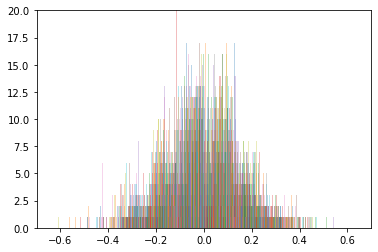

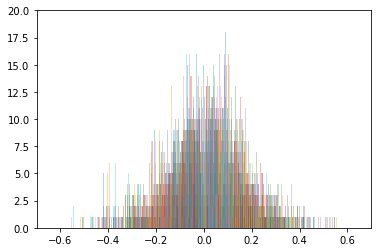

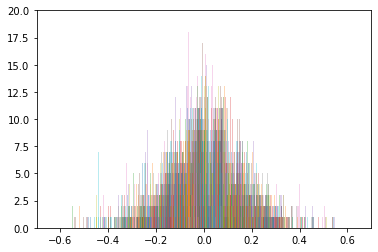

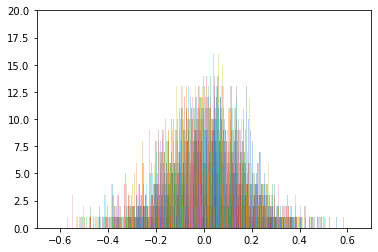

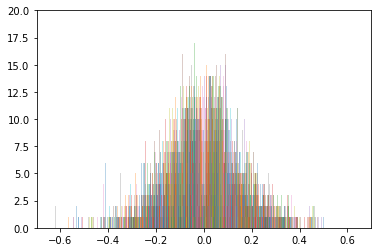

In [104]:
for gs in range(len(good_seeds)):
    for inner_fold in nns[good_seeds[gs]]['0']:
        for i in range(len(np.array(nns[good_seeds[gs]]['0'][inner_fold]._model.layers[2].get_weights()))):
            plt.hist(nns[good_seeds[gs]]['0'][inner_fold]._model.layers[2].get_weights()[i], alpha=0.3)
    plt.xlim([-0.7, 0.7])
    plt.ylim([0, 20])
    plt.show()
    print()

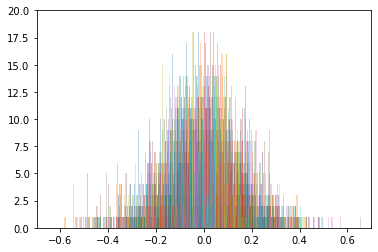

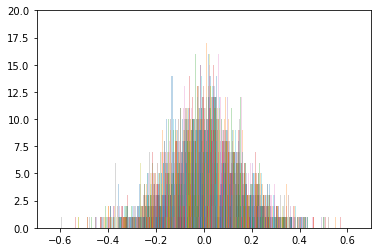

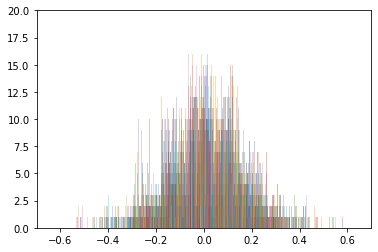

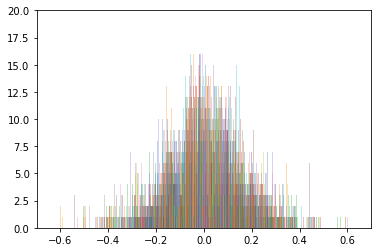

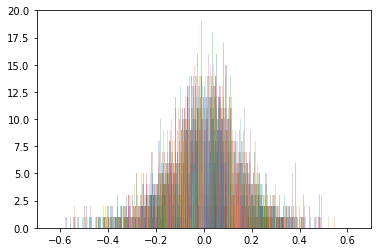

In [105]:
for gs in range(len(bad_seeds)):
    for inner_fold in nns[bad_seeds[gs]]['0']:
        for i in range(len(np.array(nns[bad_seeds[gs]]['0'][inner_fold]._model.layers[2].get_weights()))):
            plt.hist(nns[bad_seeds[gs]]['0'][inner_fold]._model.layers[2].get_weights()[i], alpha=0.3)
    plt.xlim([-0.7, 0.7])
    plt.ylim([0, 20])
    plt.show()
    print()

## Before training

In [86]:
%autoreload

In [87]:
from ml.models.classifiers.lstm import LSTMModel
from extractors.pipeline_maker import PipelineMaker

import seaborn as sns

In [32]:
experiment_path = '../experiments/seed_lstm/simplestate_secondslstm/binconcepts/lstm/raw_full/2022_02_18_0'
with open(experiment_path + '/config.yaml', 'rb') as fp:
    config = pickle.load(fp)    
print(config['ML']['models']['classifiers']['lstm']['seed'])

pipeline = PipelineMaker(config)
sequences, labels, indices, id_dictionary = pipeline.build_data()

24


In [9]:
bad_seeds = [
    105, 2022, 1933, 2609, 24
]

good_seeds = [
    17, 193, 136, 1034, 1212
]

### Initial weights

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 105, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_138 (GRU)               (None, 32)                4224      
                                                                 
 dense_137 (Dense)           (None, 2)                 66        
                                                                 
Total p

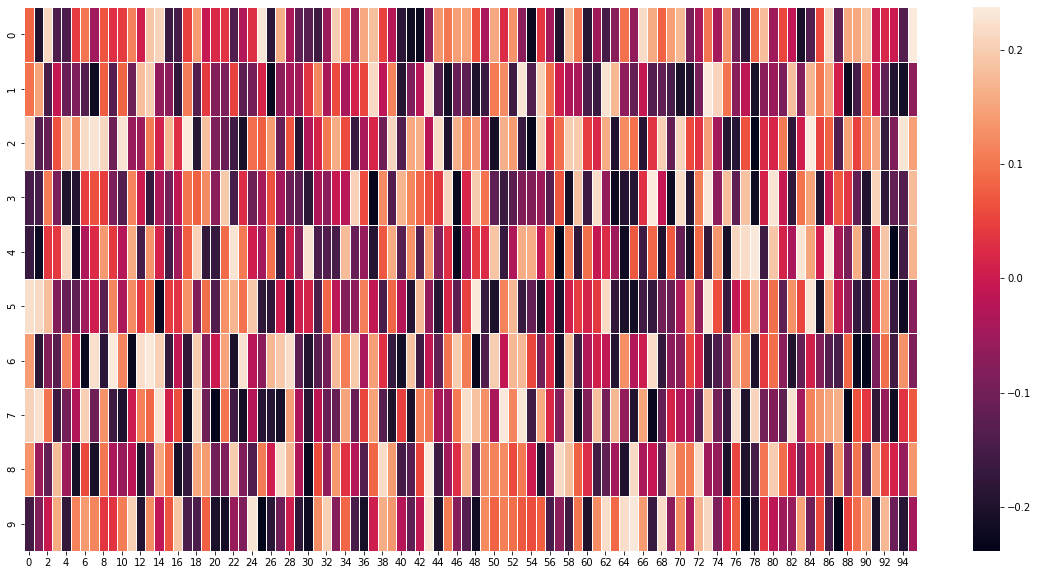

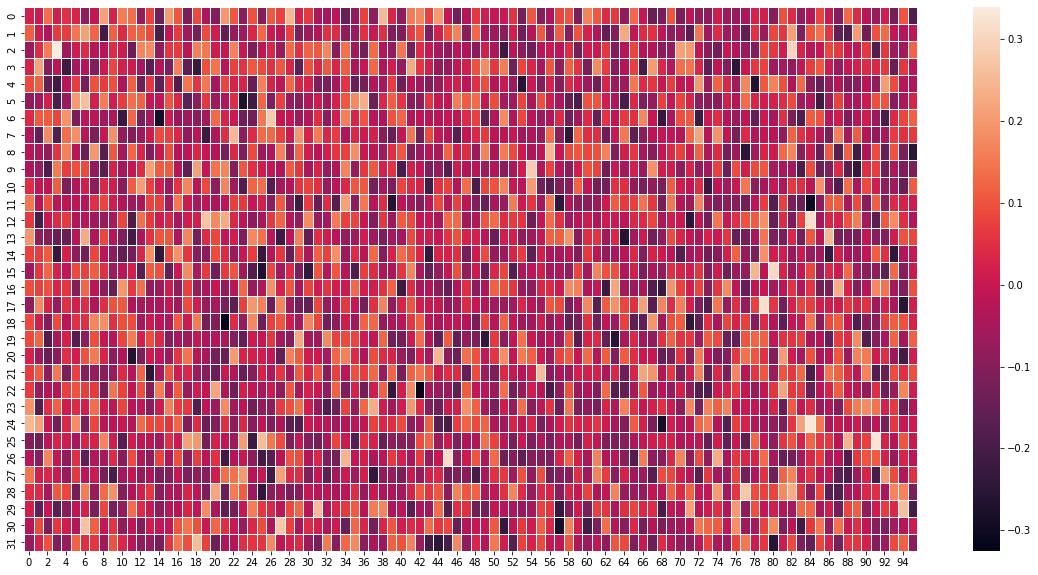

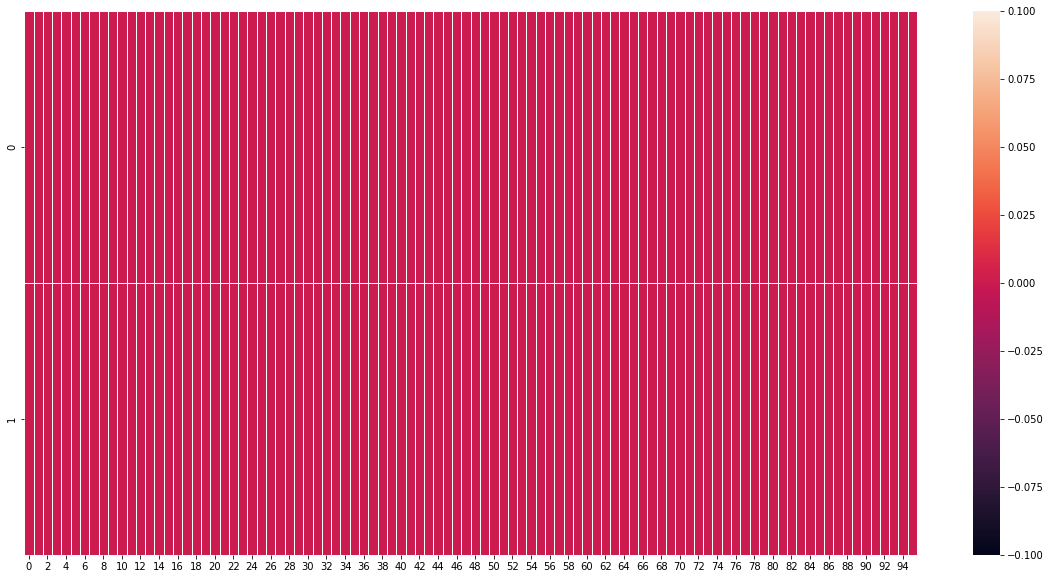

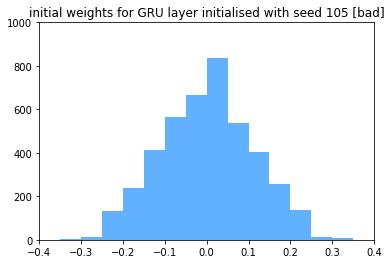

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 2022, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_139 (GRU)               (None, 32)                4224      
                                                                 
 dense_138 (Dense)           (None, 2)                 66        
                                                                 
Total 

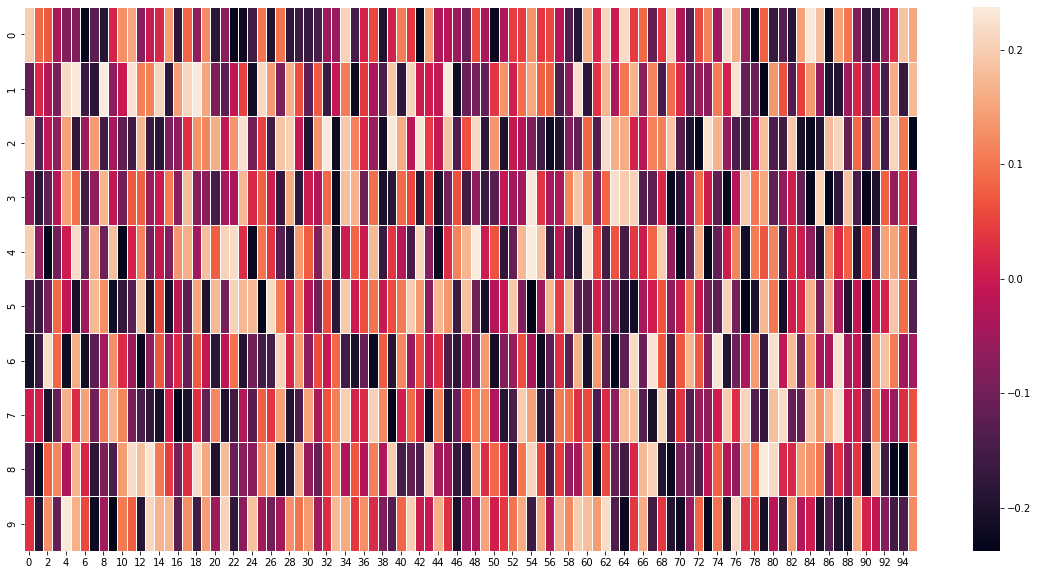

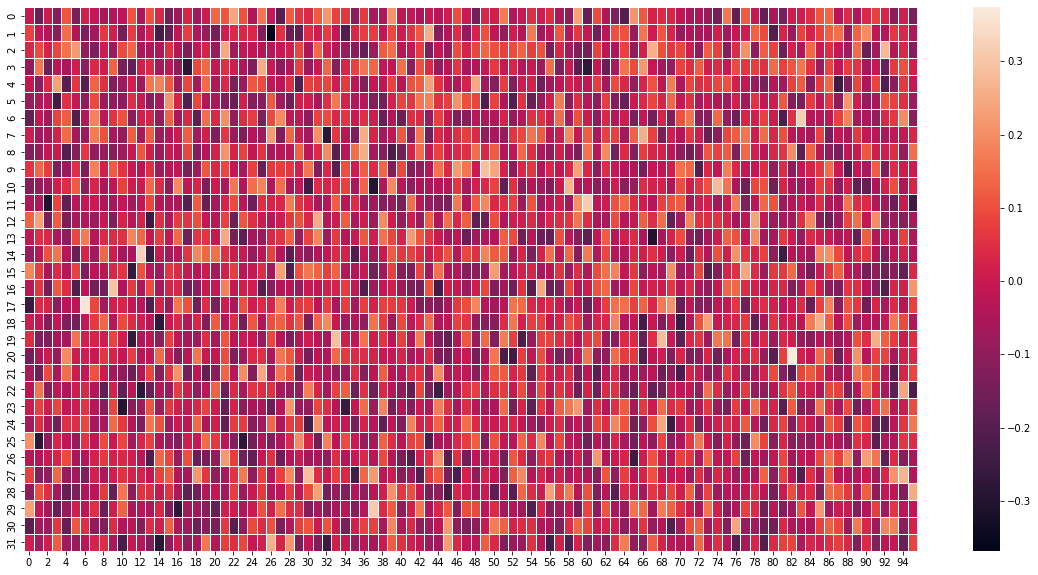

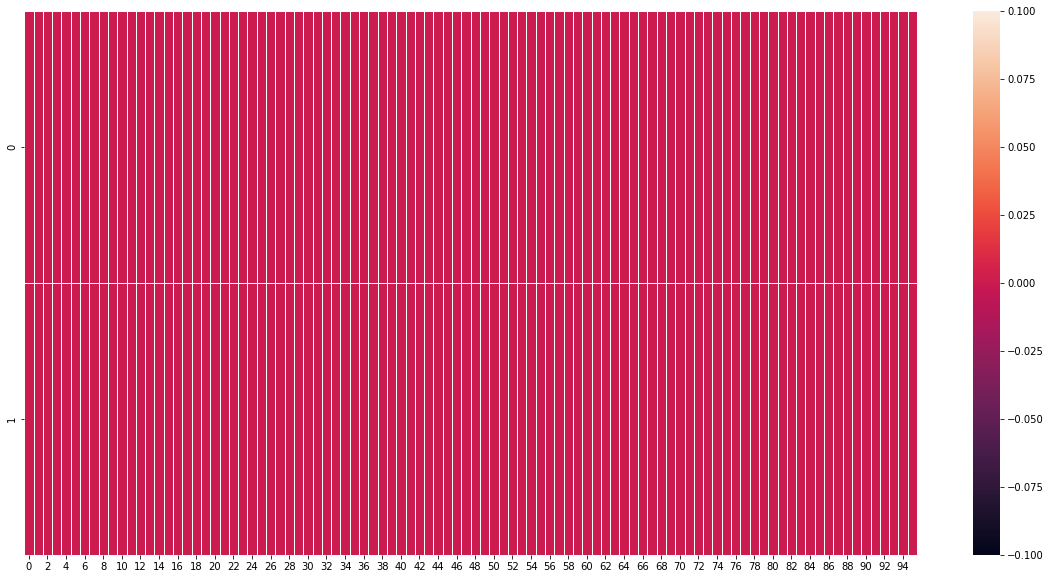

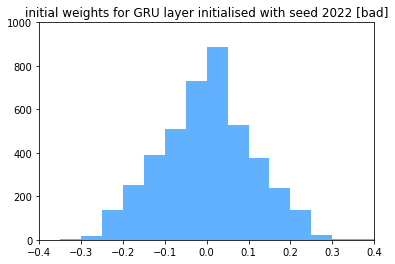

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 1933, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_140 (GRU)               (None, 32)                4224      
                                                                 
 dense_139 (Dense)           (None, 2)                 66        
                                                                 
Total 

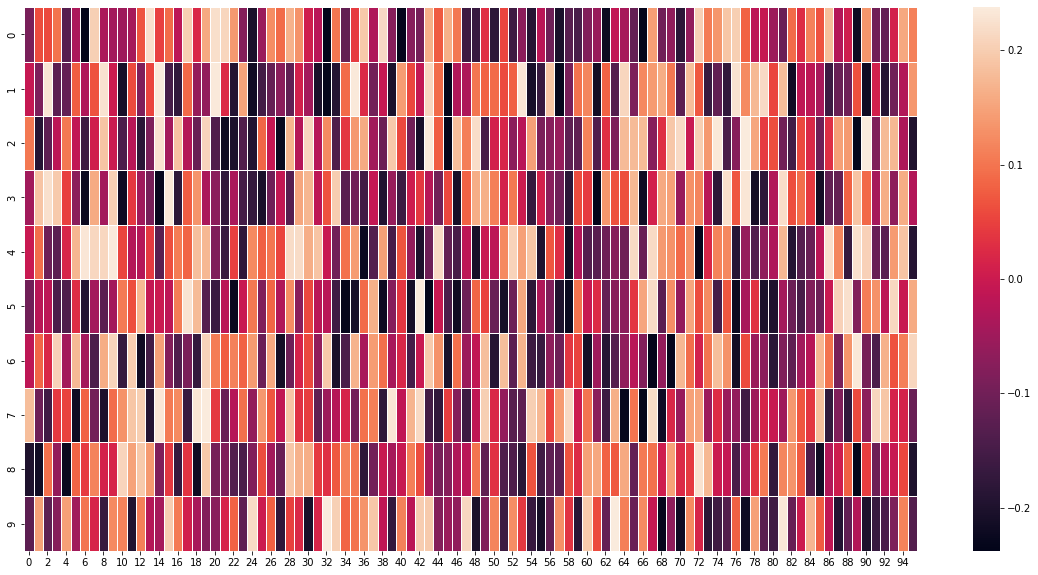

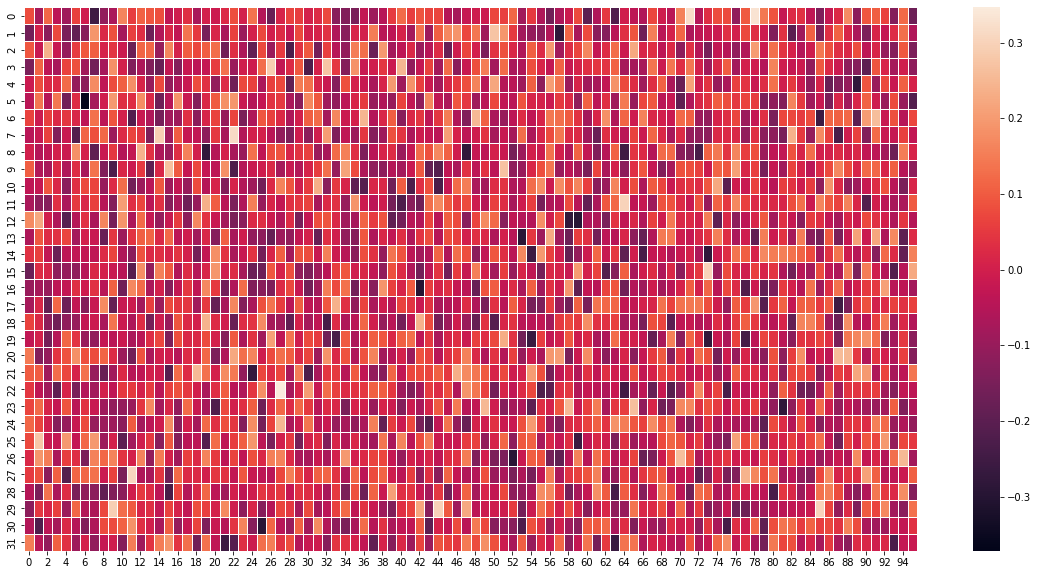

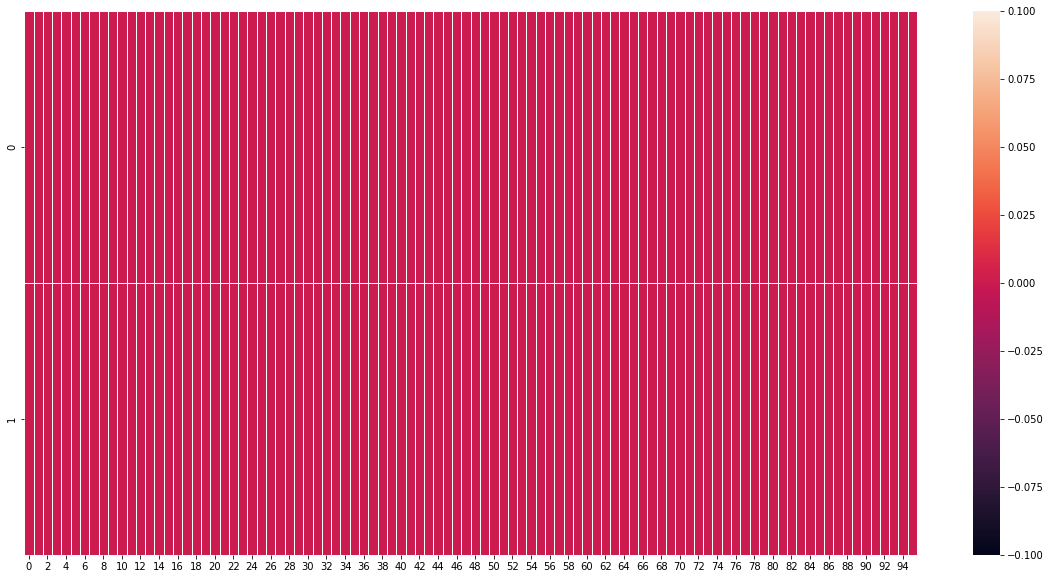

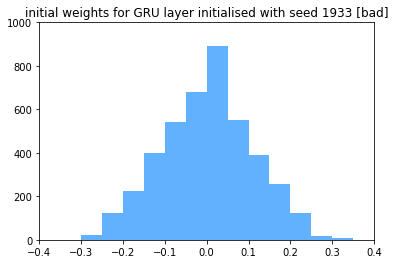

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 2609, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_141 (GRU)               (None, 32)                4224      
                                                                 
 dense_140 (Dense)           (None, 2)                 66        
                                                                 
Total 

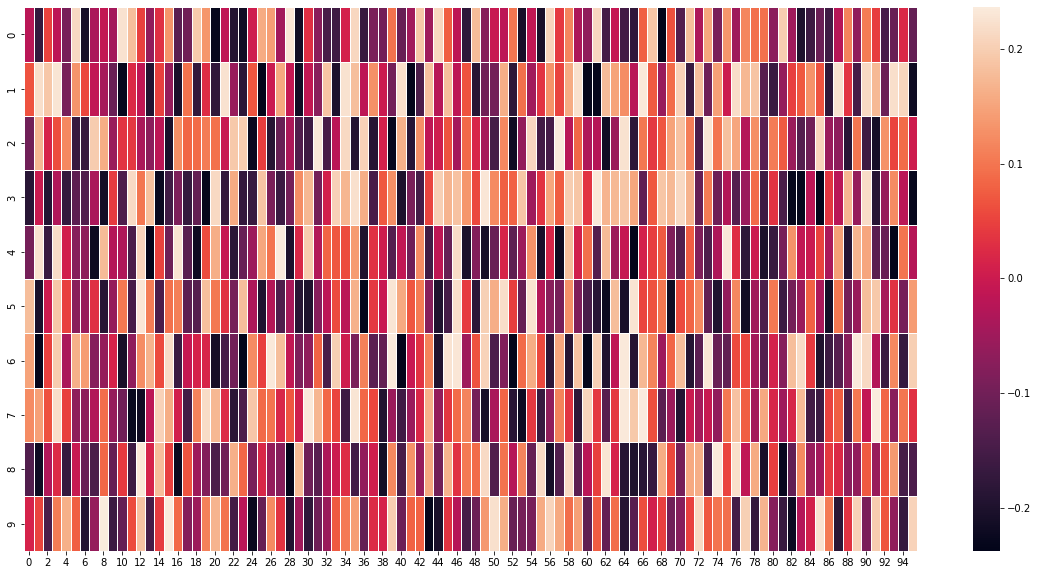

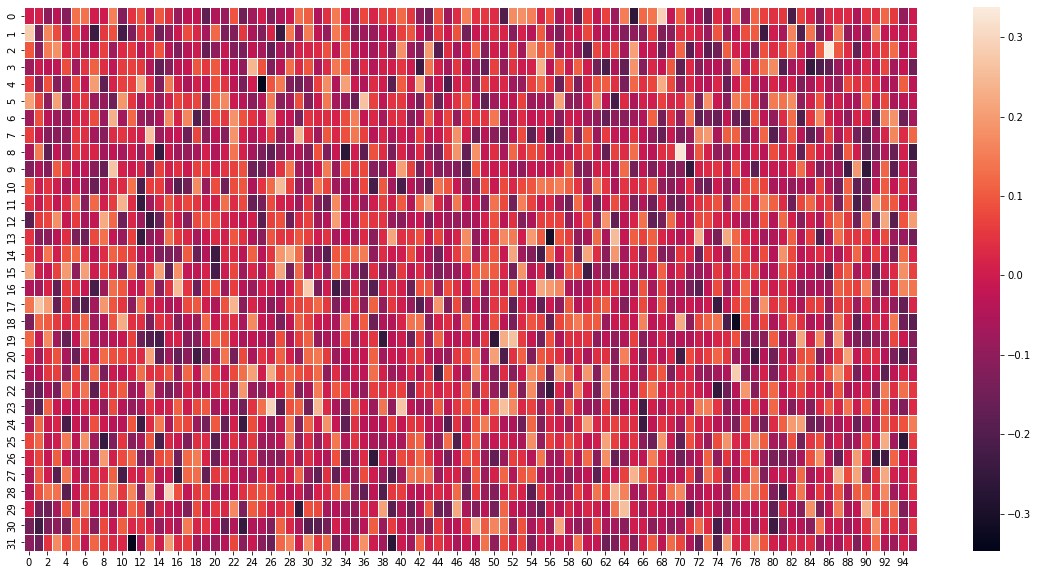

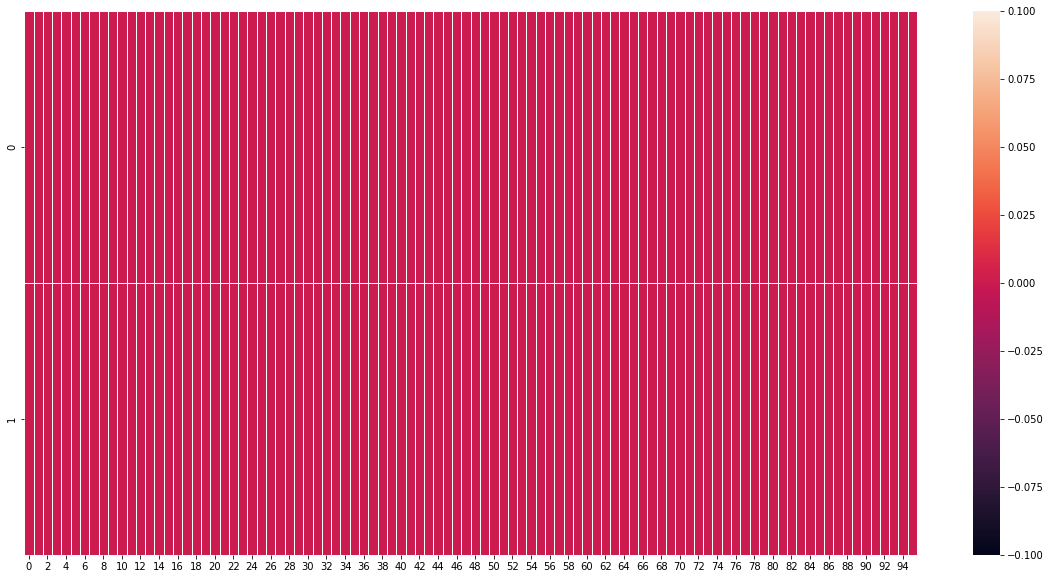

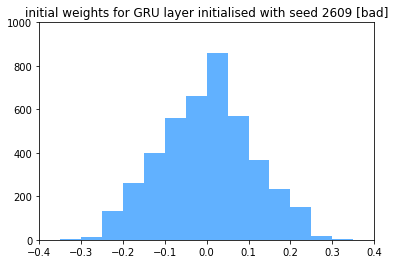

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 24, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_142 (GRU)               (None, 32)                4224      
                                                                 
 dense_141 (Dense)           (None, 2)                 66        
                                                                 
Total pa

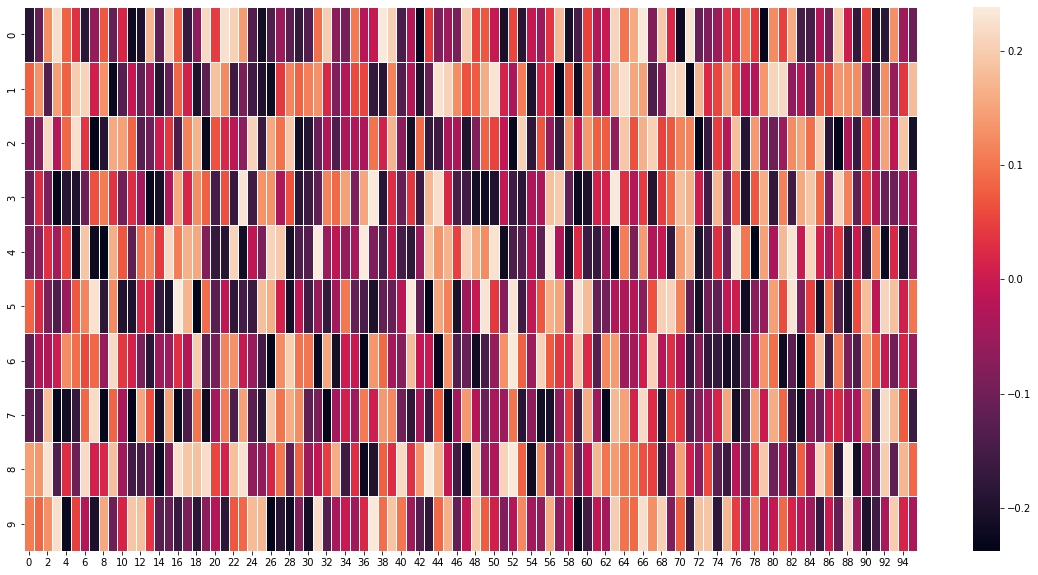

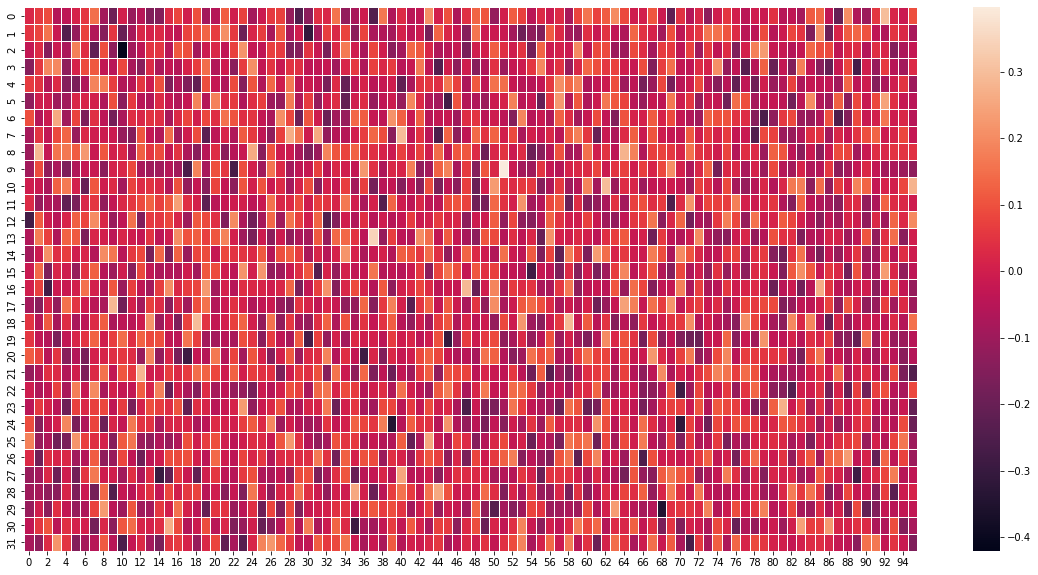

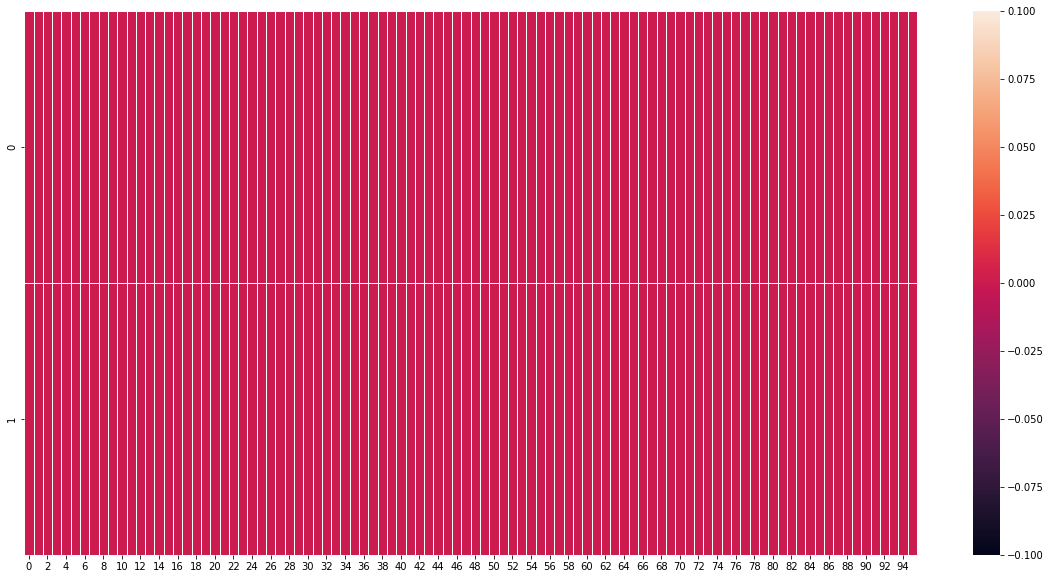

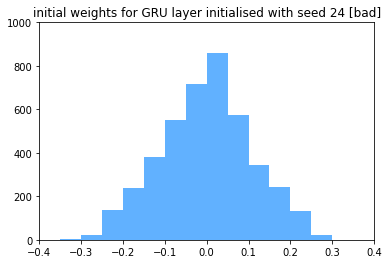

In [72]:
for seed in bad_seeds:
    settings = dict(config)
    settings['ML']['models']['classifiers']['lstm']['seed'] = seed
    model = LSTMModel(settings)
    model.set_outer_fold(0)
    x = model._format_features(sequences)
    
    model._init_model(x)
    weights = model._model.layers[2].get_weights()
    ws = []
    for w in weights:
        ws = list(ws) + list(w)
        plt.figure(figsize=(20,10))
        sns.heatmap(w, linewidth=0.5)
        plt.show()
    ws = [item for sublist in ws for item in sublist]
    plt.hist(ws, alpha=0.7, color='dodgerblue', bins=np.arange(-0.4, 0.5, 0.05))
    plt.xlim([-0.4, 0.4])
    plt.ylim([0, 1000])
    plt.title('initial weights for GRU layer initialised with seed {} [bad]'.format(seed))
    plt.show()
    

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 17, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_133 (GRU)               (None, 32)                4224      
                                                                 
 dense_132 (Dense)           (None, 2)                 66        
                                                                 
Total pa

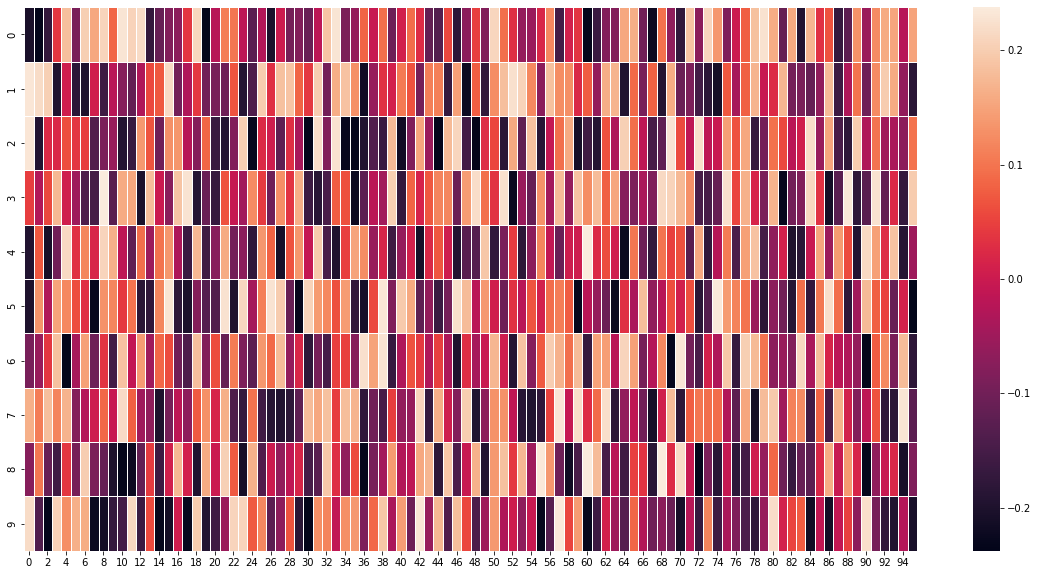

shape (32, 96)


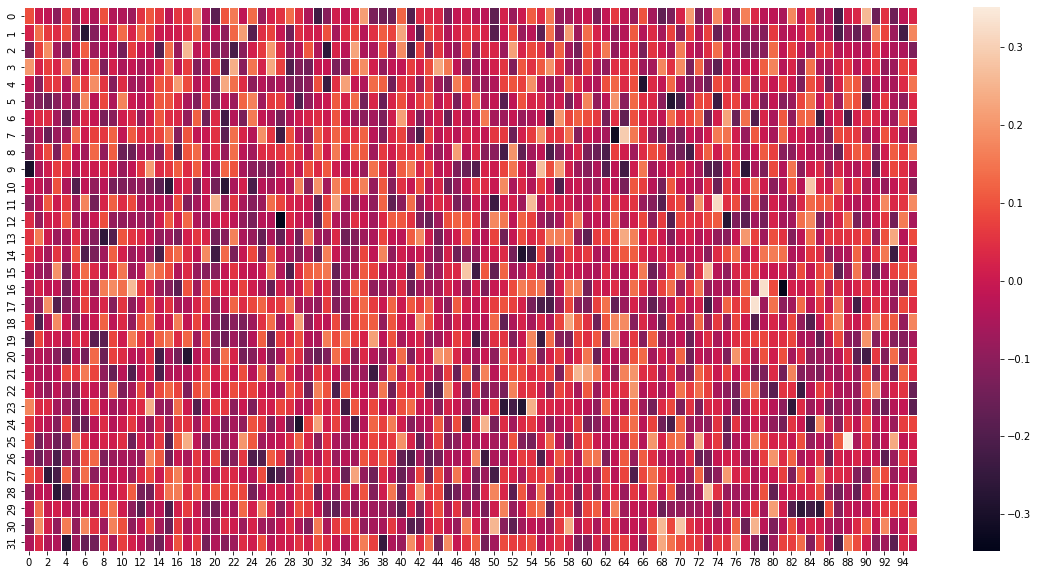

shape (2, 96)


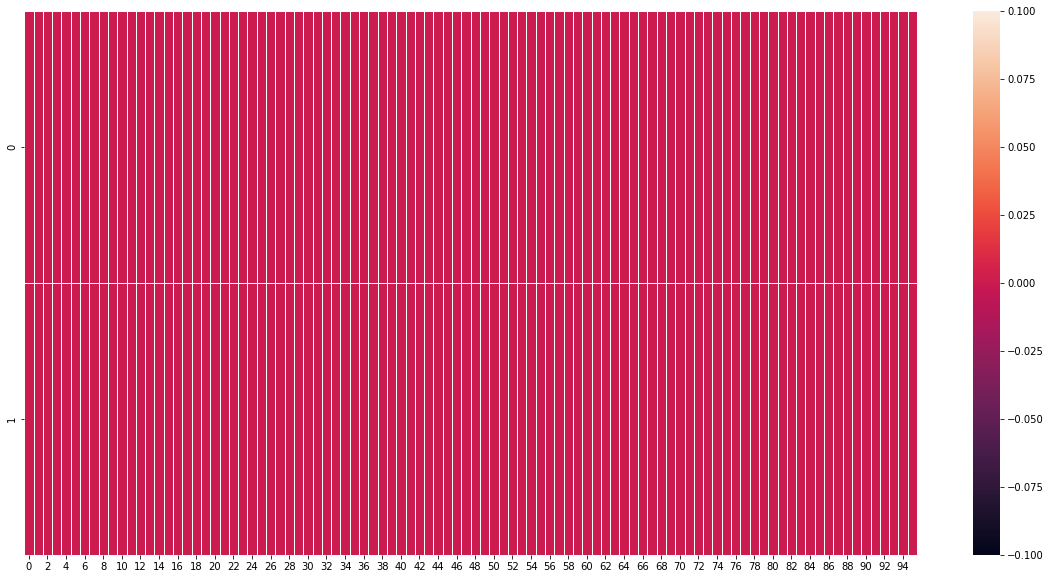

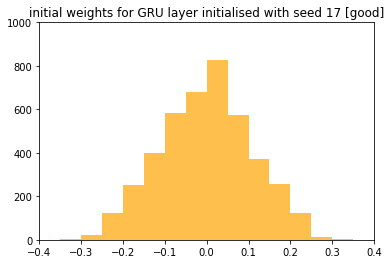

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 193, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_134 (GRU)               (None, 32)                4224      
                                                                 
 dense_133 (Dense)           (None, 2)                 66        
                                                                 
Total p

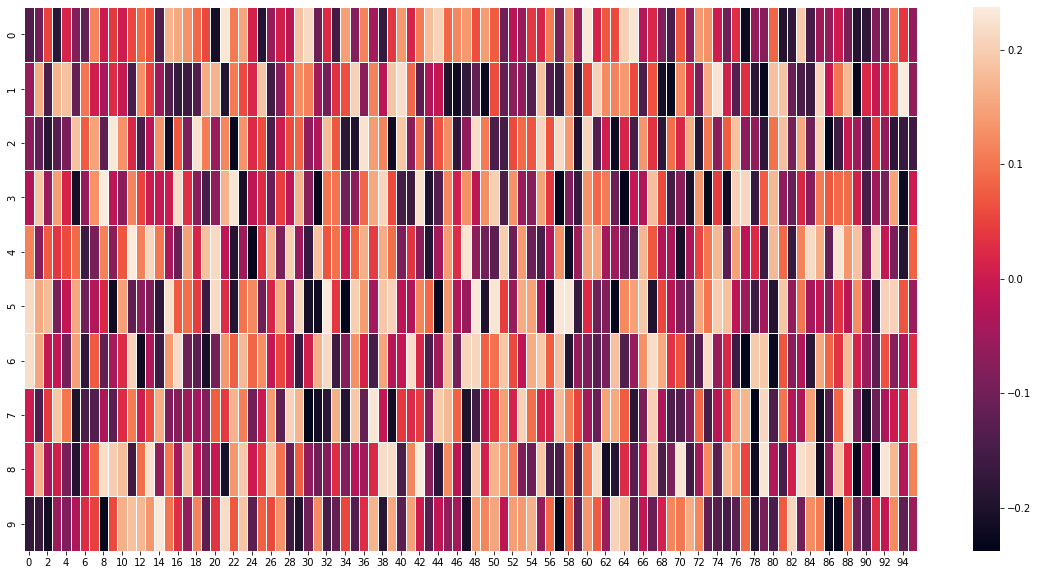

shape (32, 96)


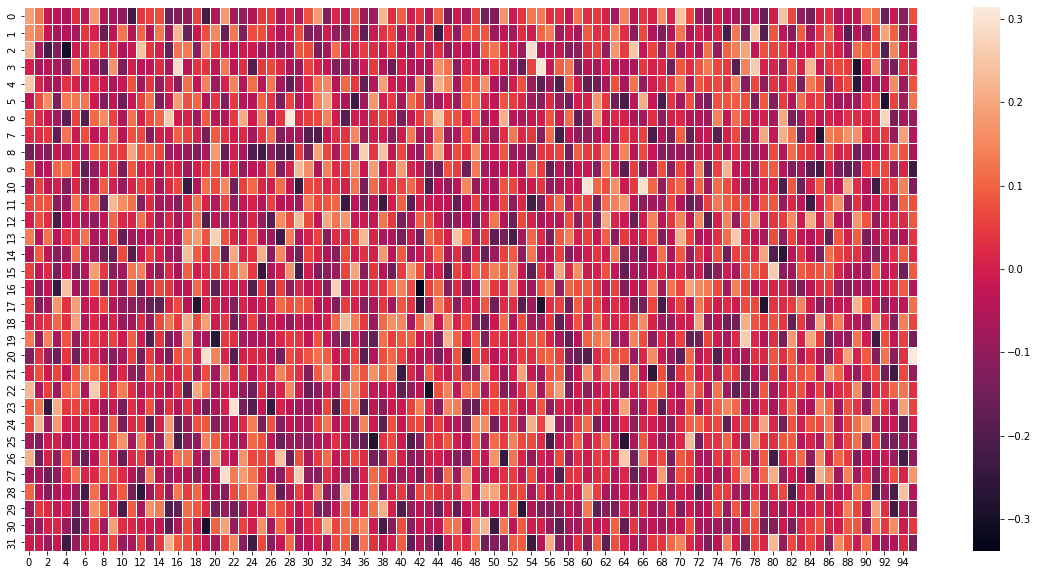

shape (2, 96)


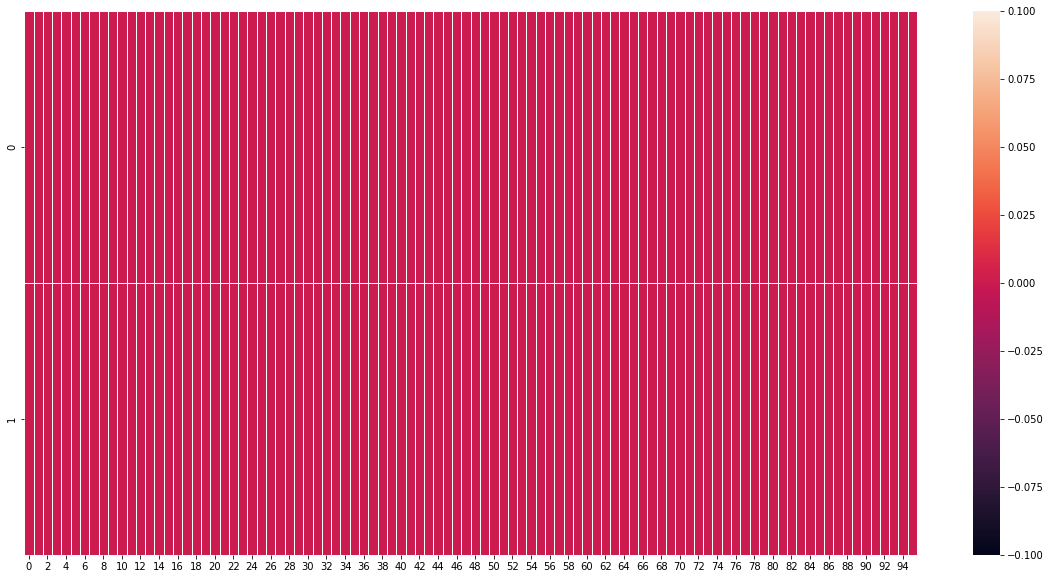

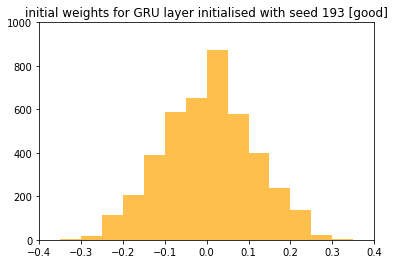

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 136, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_135 (GRU)               (None, 32)                4224      
                                                                 
 dense_134 (Dense)           (None, 2)                 66        
                                                                 
Total p

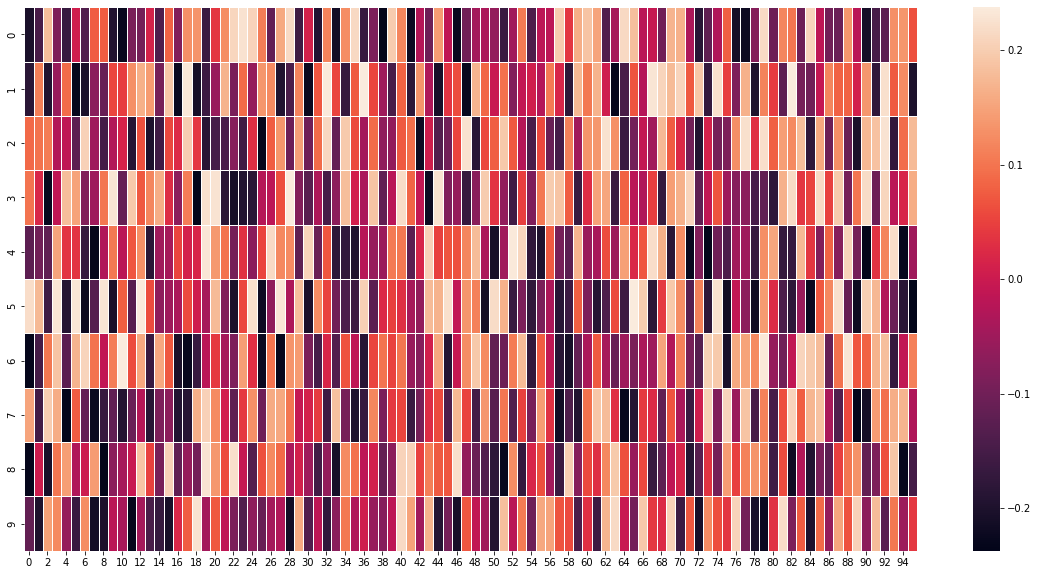

shape (32, 96)


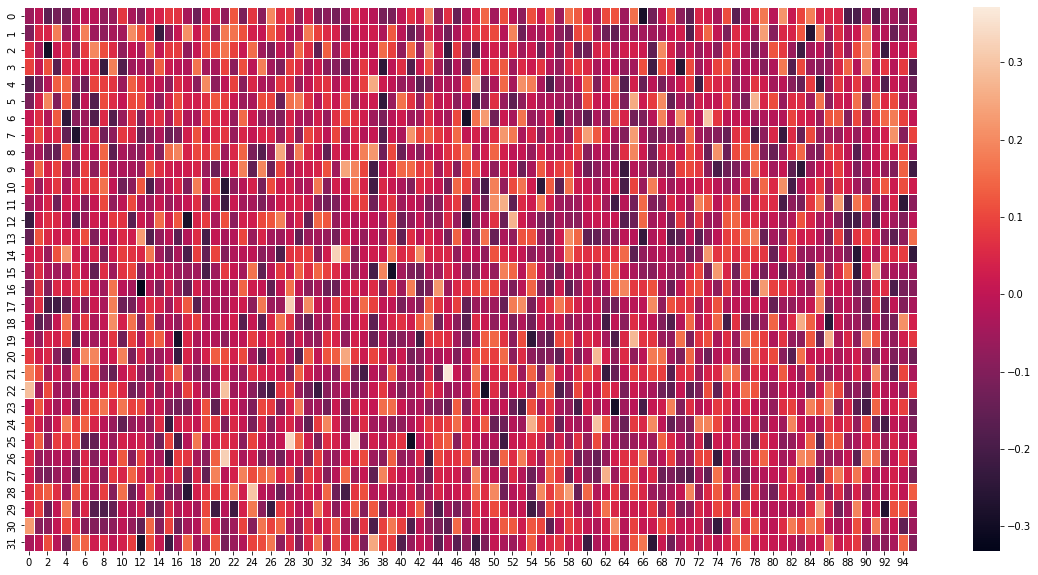

shape (2, 96)


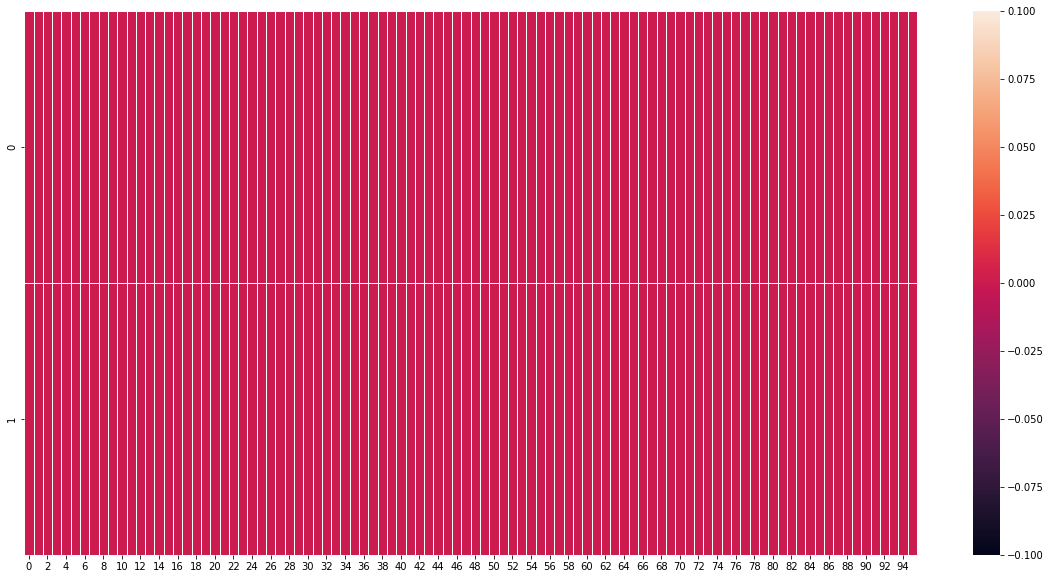

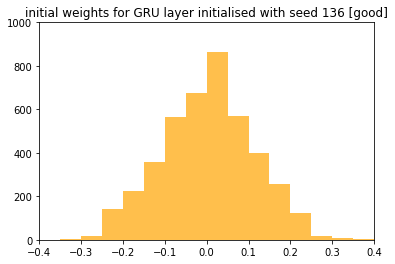

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 1034, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_136 (GRU)               (None, 32)                4224      
                                                                 
 dense_135 (Dense)           (None, 2)                 66        
                                                                 
Total 

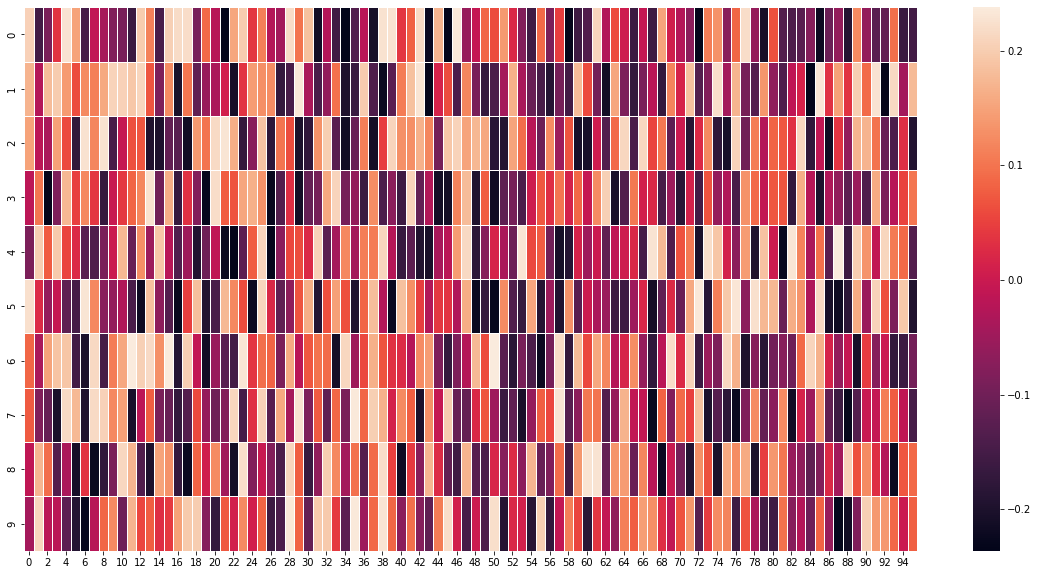

shape (32, 96)


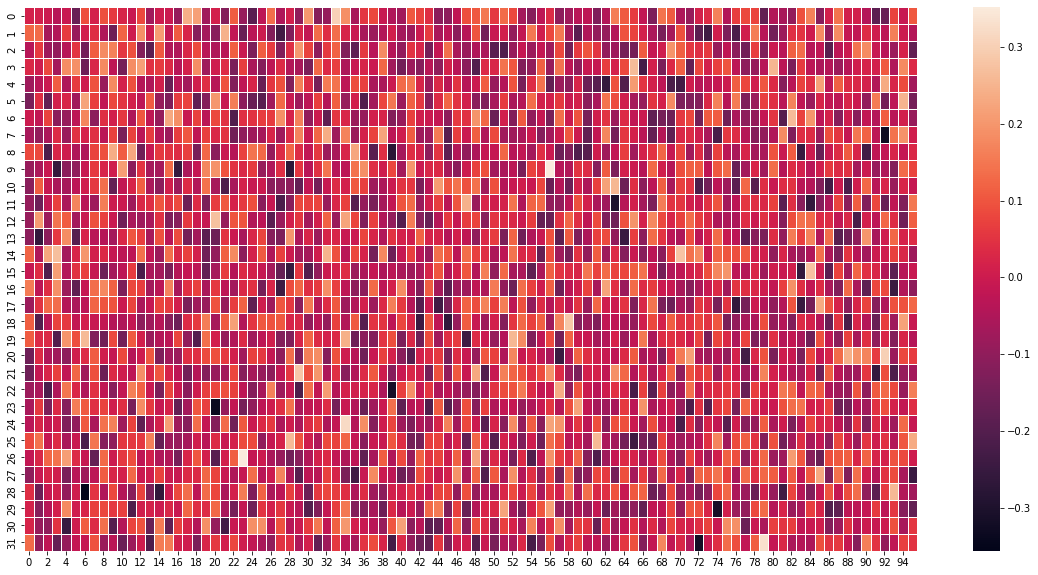

shape (2, 96)


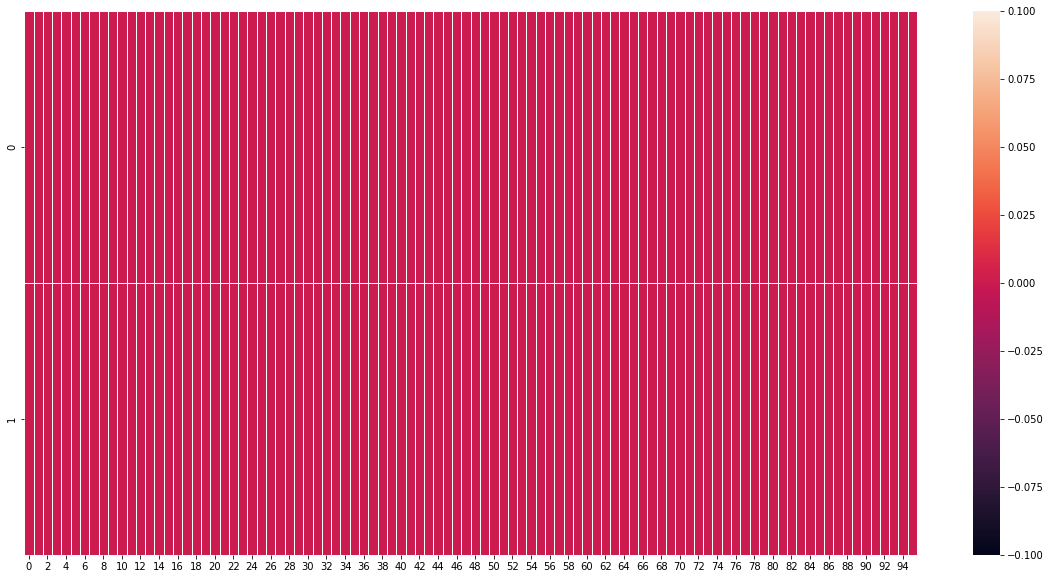

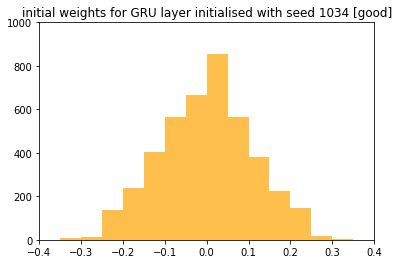

(256,)
-1 900
{'dummy_parameters': 'blank', 'seed': 1212, 'batch_size': 16, 'cell_type': 'GRU', 'dropout': 0, 'early_stopping': False, 'epochs': 50, 'loss': 'auc', 'n_cells': [32], 'n_layers': 1, 'optimiser': 'adam', 'padding_value': -1, 'shuffle': True, 'verbose': 1, 'attention': 'dropout', 'flatten': 'average'}
Model: "model_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 900, 10)]        0         
                                                                 
 masking_features (Masking)  (None, 900, 10)           0         
                                                                 
 gru_137 (GRU)               (None, 32)                4224      
                                                                 
 dense_136 (Dense)           (None, 2)                 66        
                                                                 
Total 

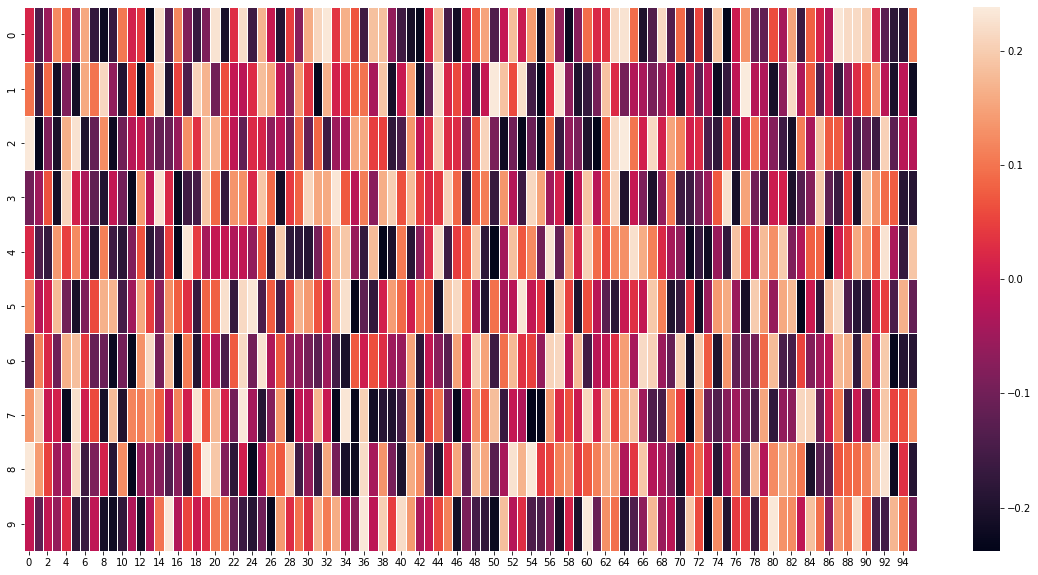

shape (32, 96)


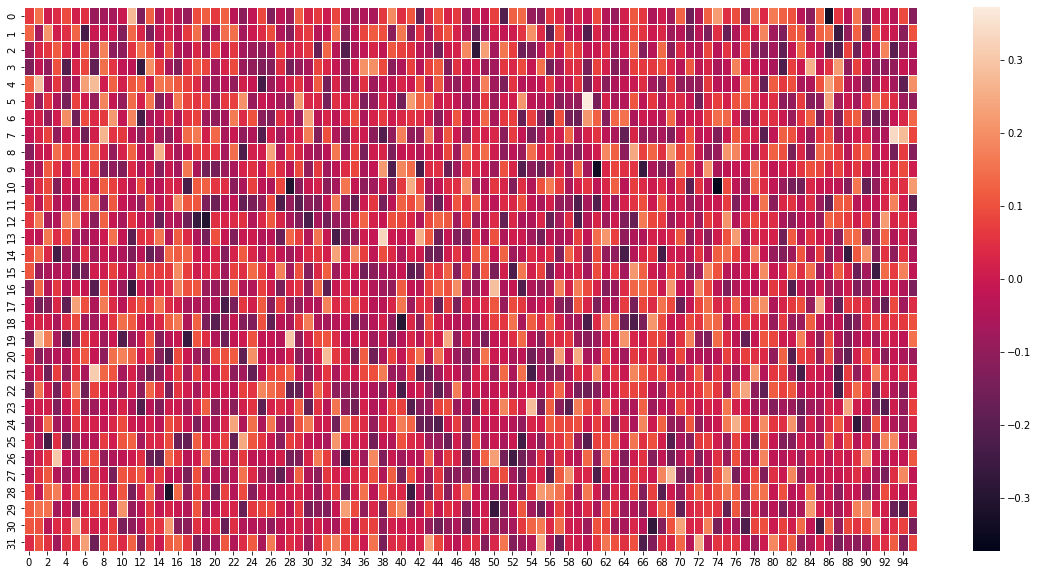

shape (2, 96)


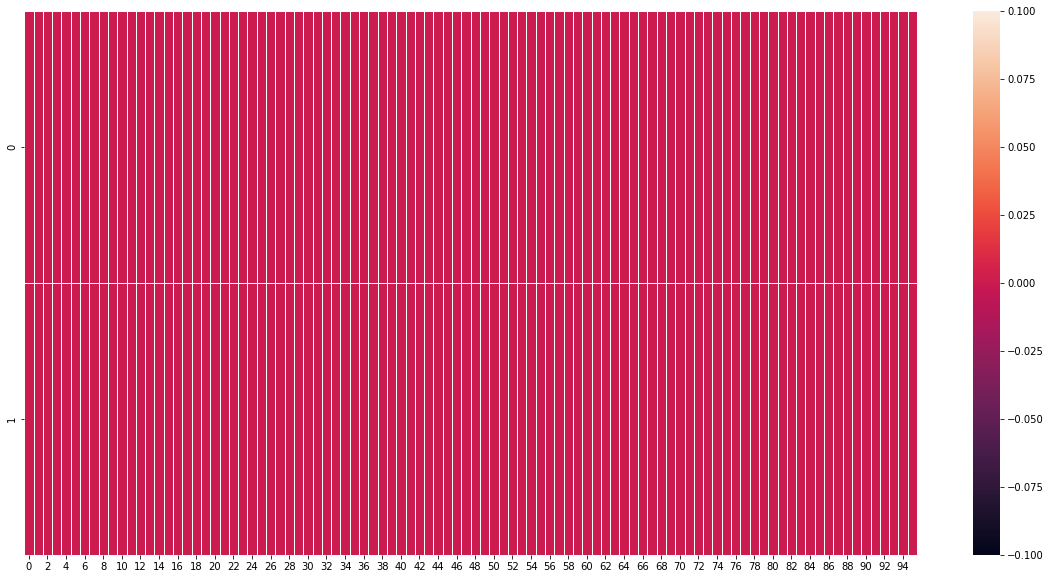

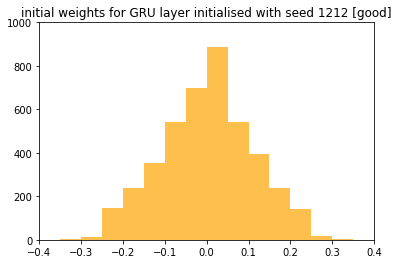

In [71]:
for seed in good_seeds:
    settings = dict(config)
    settings['ML']['models']['classifiers']['lstm']['seed'] = seed
    model = LSTMModel(settings)
    model.set_outer_fold(0)
    x = model._format_features(sequences)
    
    model._init_model(x)
    weights = model._model.layers[2].get_weights()
    ws = []
    for w in weights:
        ws = list(ws) + list(w)
        print('shape',w.shape)
        plt.figure(figsize=(20,10))
        sns.heatmap(w, linewidth=0.5)
        plt.show()
    ws = [item for sublist in ws for item in sublist]
    plt.hist(ws, alpha=0.7, color='orange', bins=np.arange(-0.4, 0.5, 0.05))
    plt.xlim([-0.4, 0.4])
    plt.ylim([0, 1000])
    plt.title('initial weights for GRU layer initialised with seed {} [good]'.format(seed))
    plt.show()
    

**************************************************
matrix 1, row 0
105


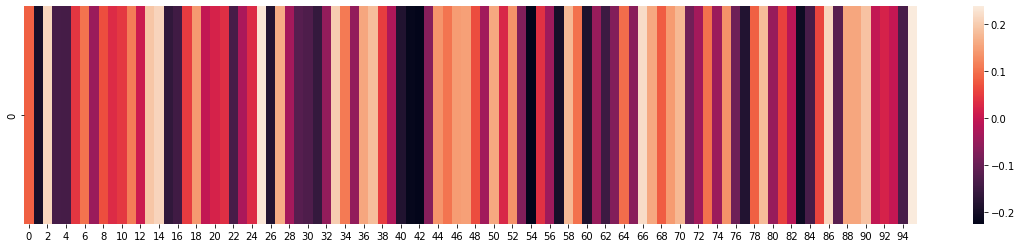

2022


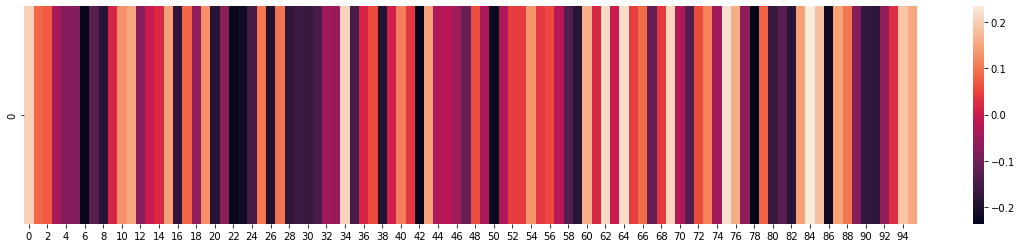

1933


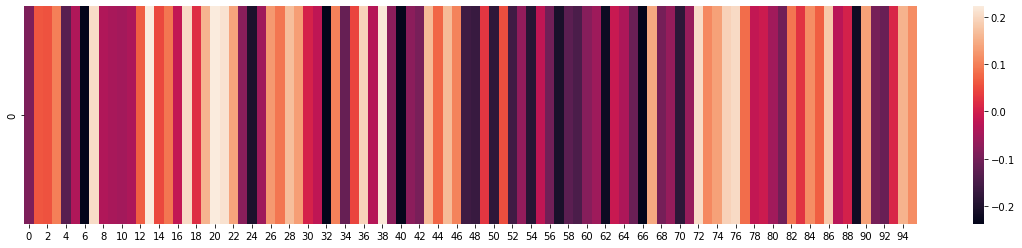

2609


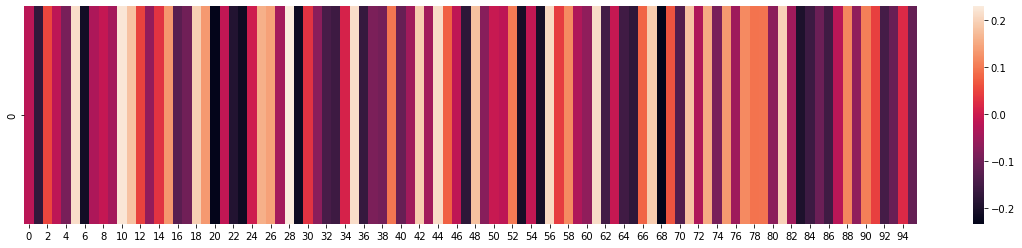

24


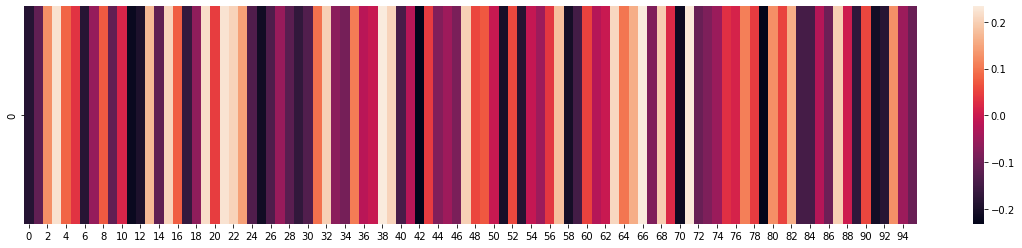

**************************************************
matrix 1, row 1
105


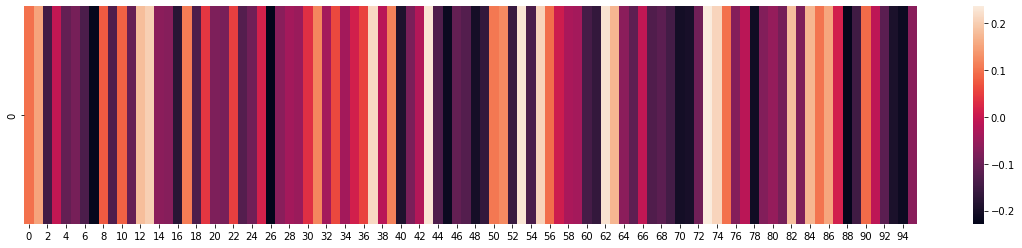

2022


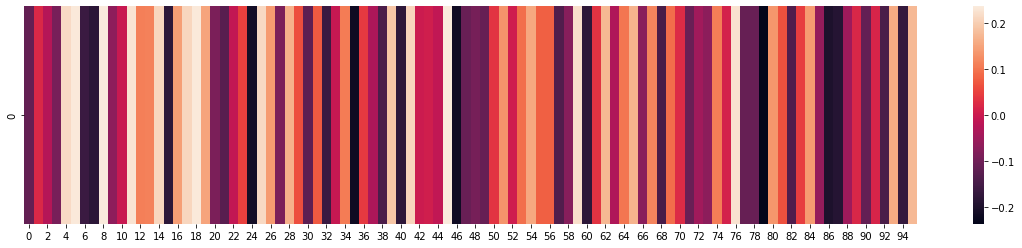

1933


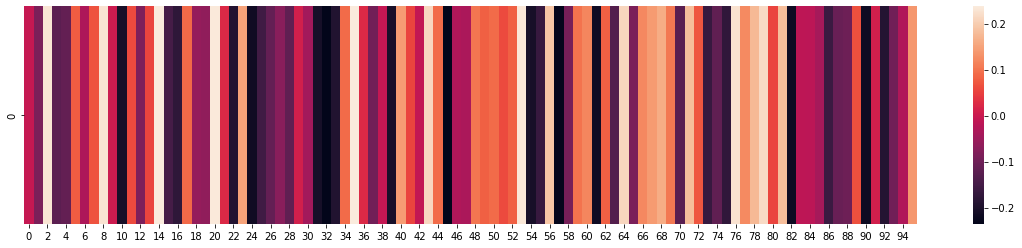

2609


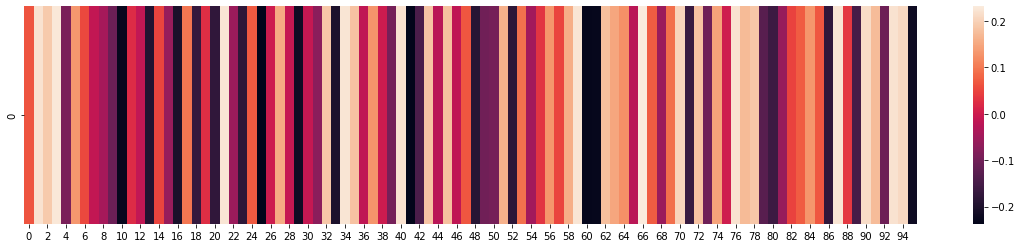

24


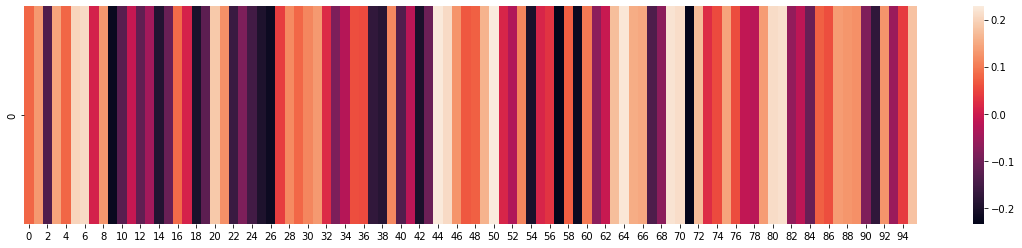

**************************************************
matrix 1, row 2
105


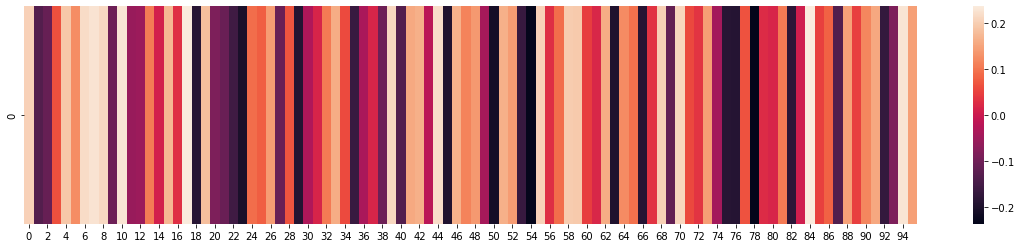

2022


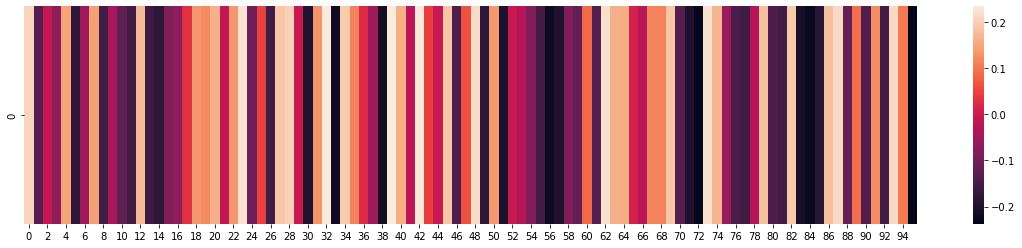

1933


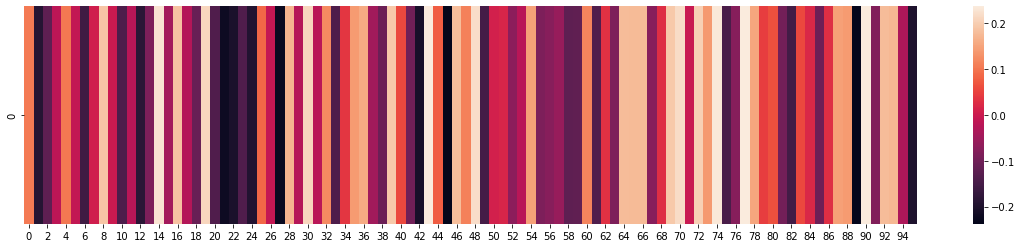

2609


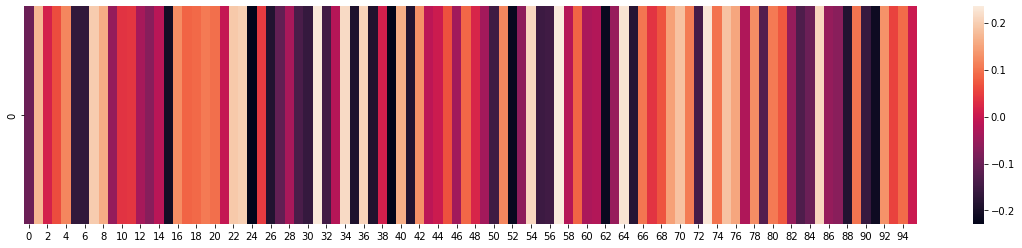

24


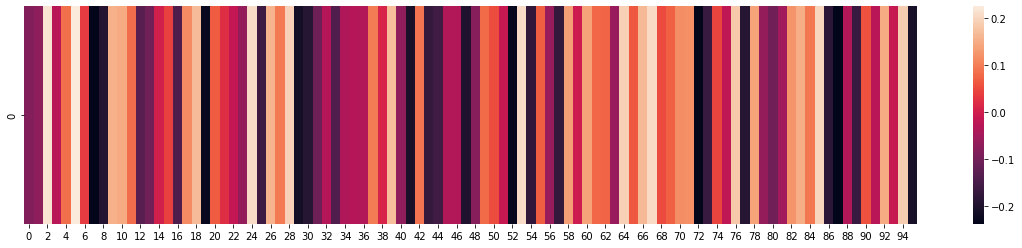

**************************************************
matrix 1, row 3
105


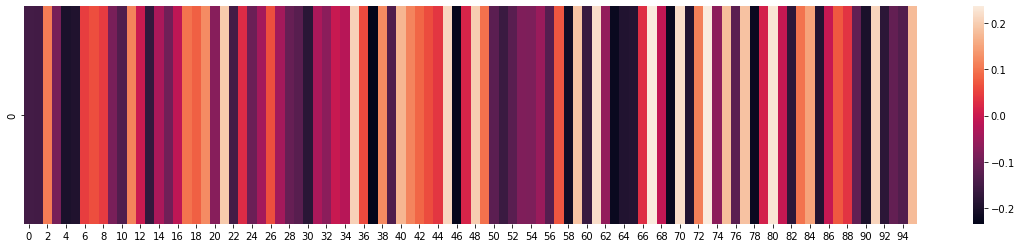

2022


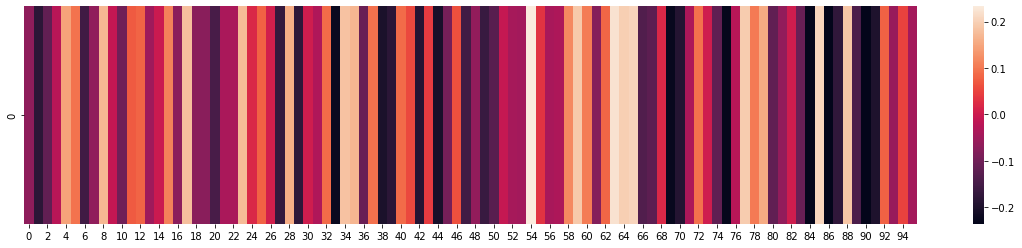

1933


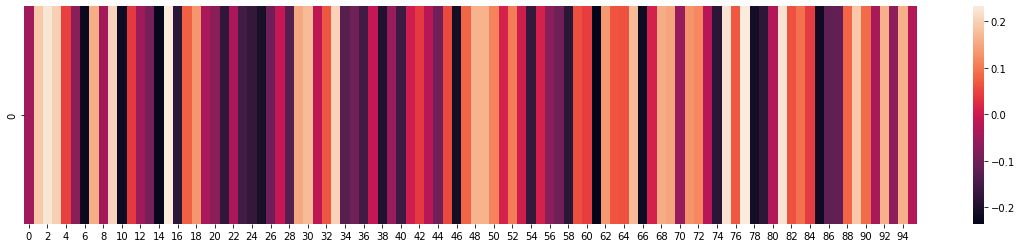

2609


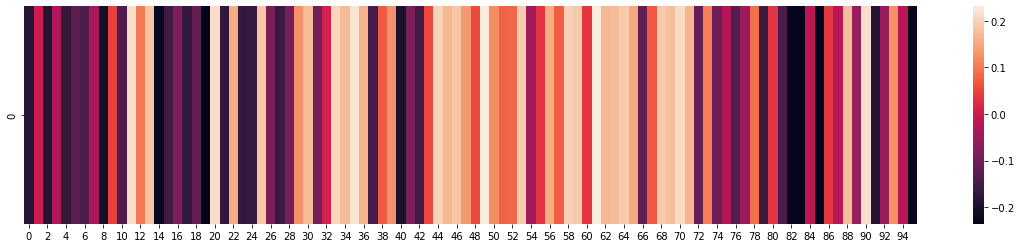

24


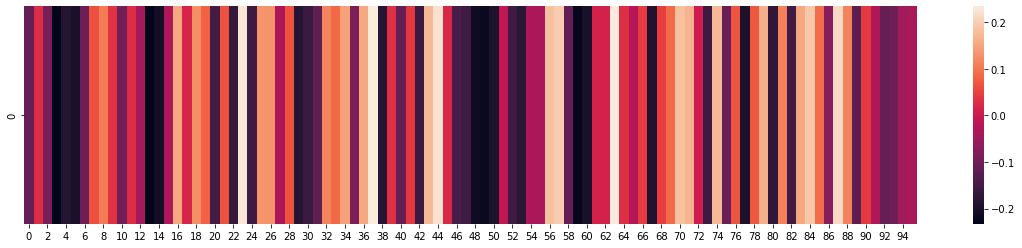

**************************************************
matrix 1, row 4
105


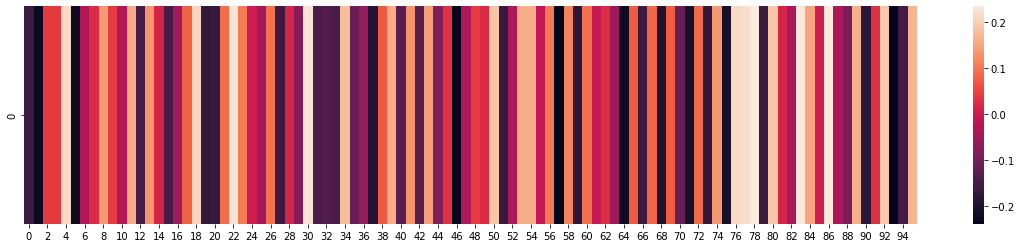

2022


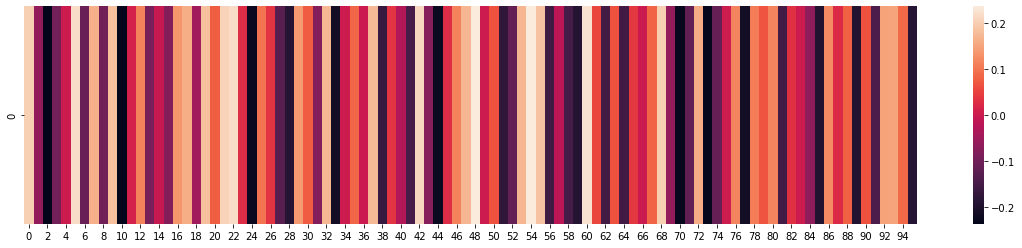

1933


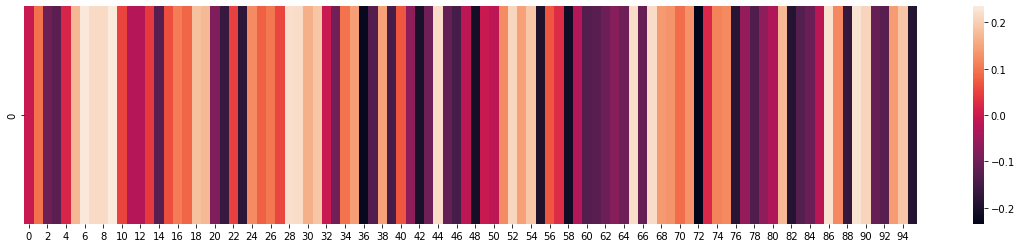

2609


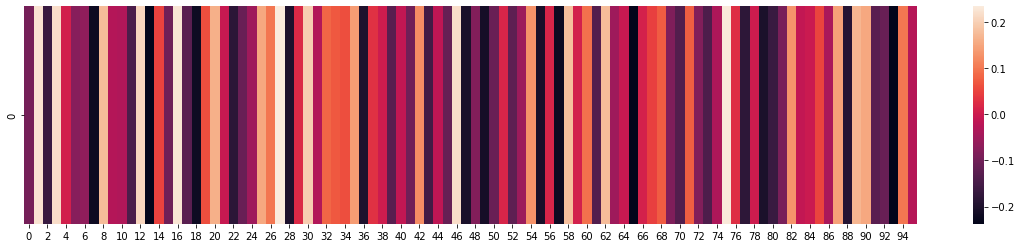

24


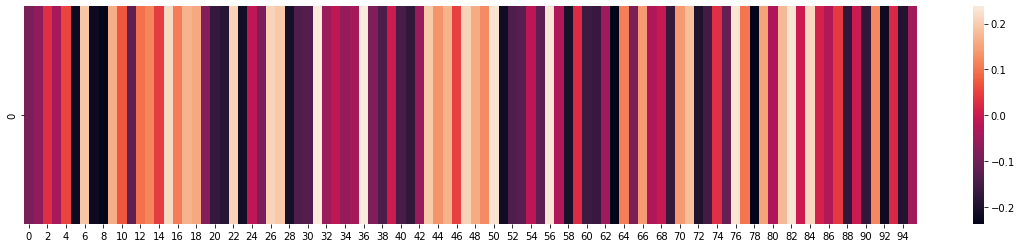

**************************************************
matrix 1, row 5
105


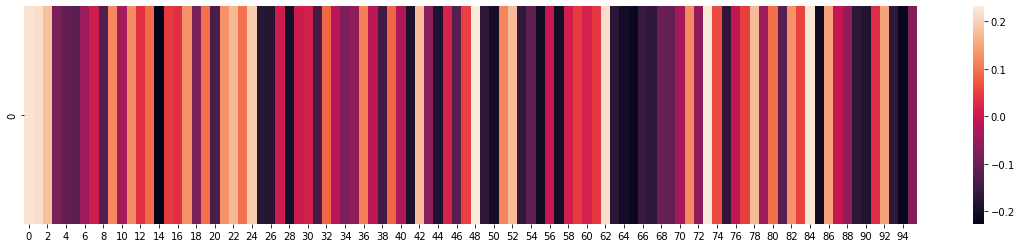

2022


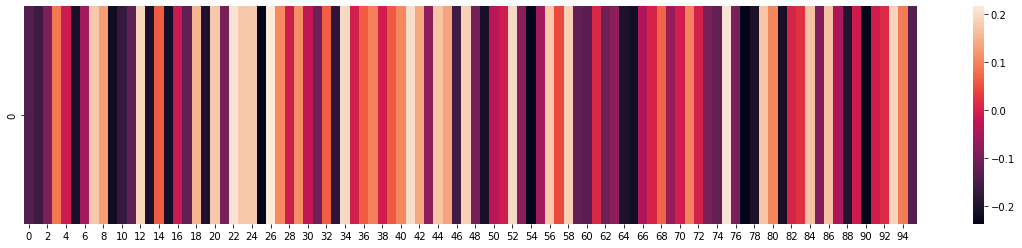

1933


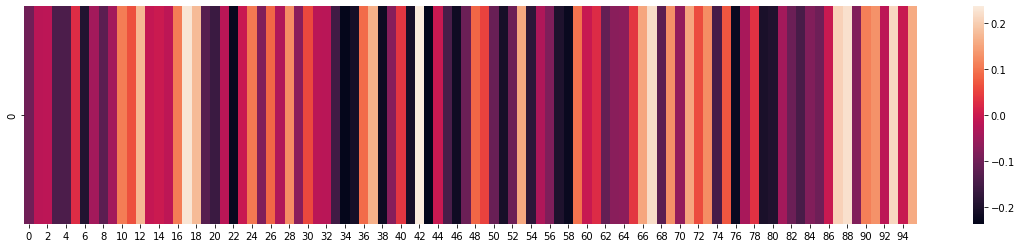

2609


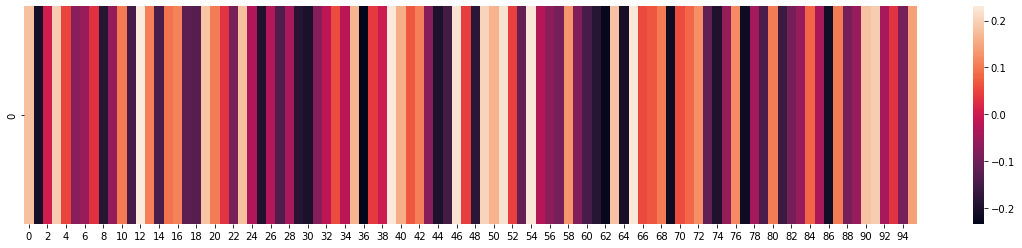

24


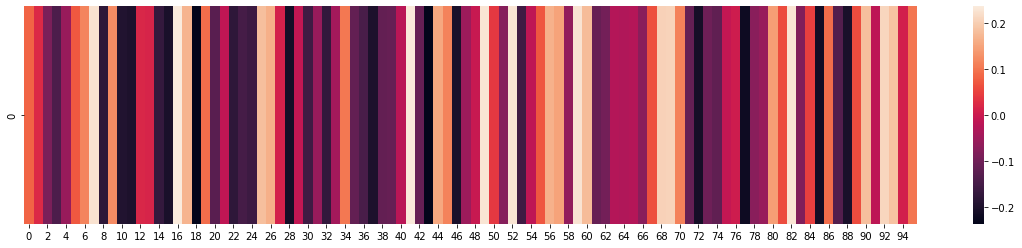

**************************************************
matrix 1, row 6
105


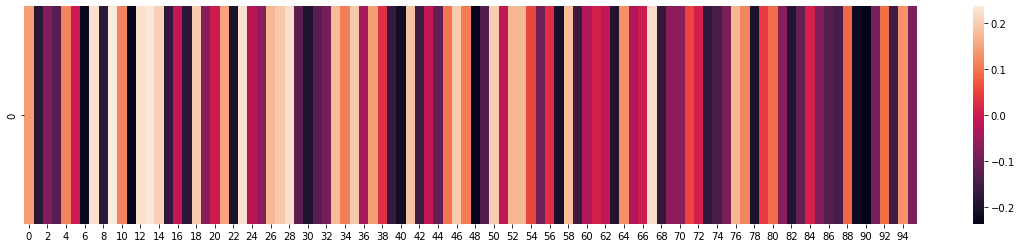

2022


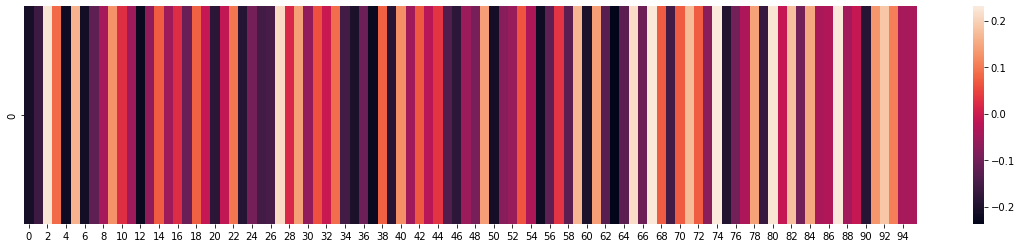

1933


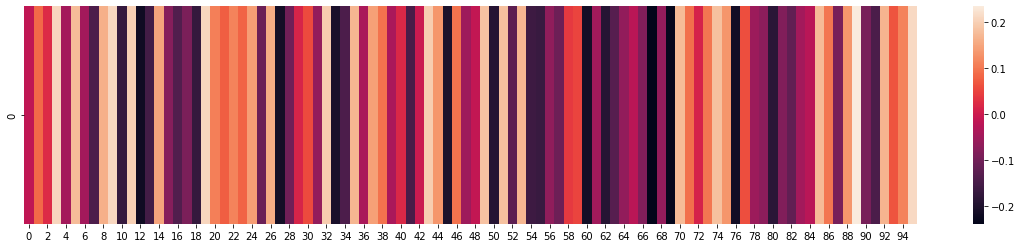

2609


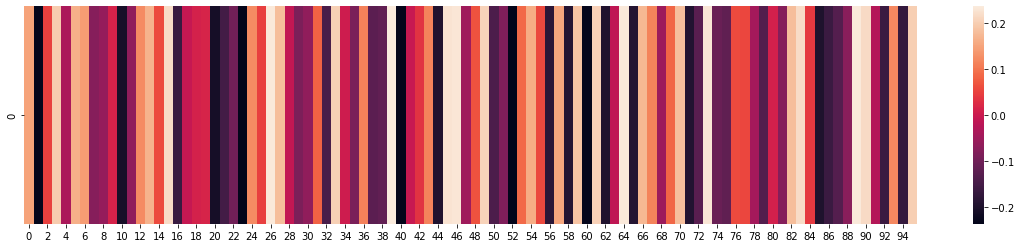

24


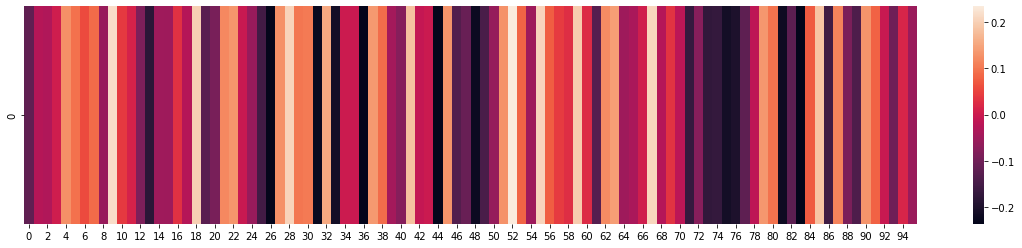

**************************************************
matrix 1, row 7
105


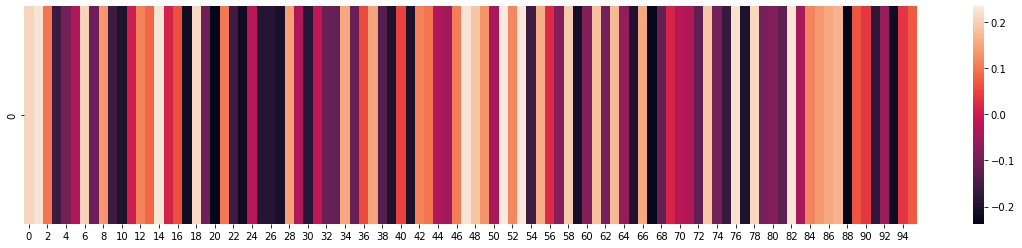

2022


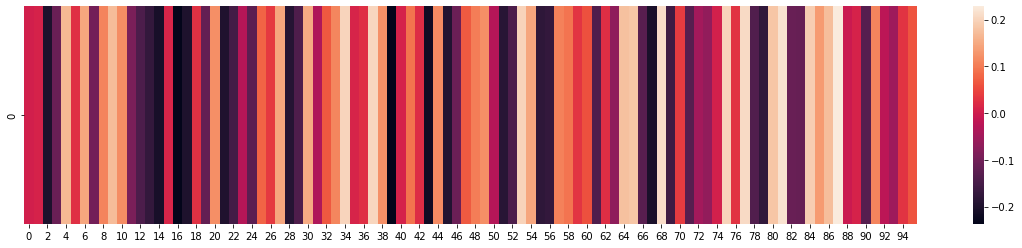

1933


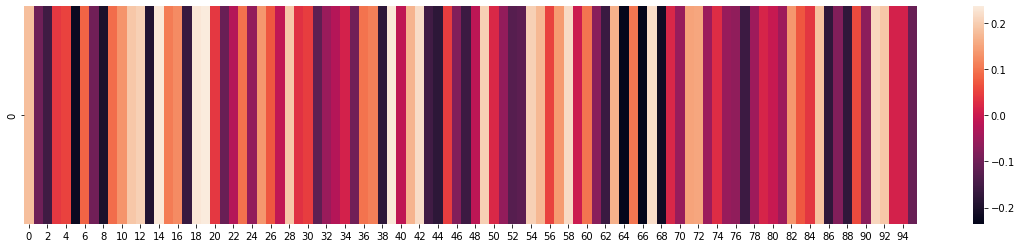

2609


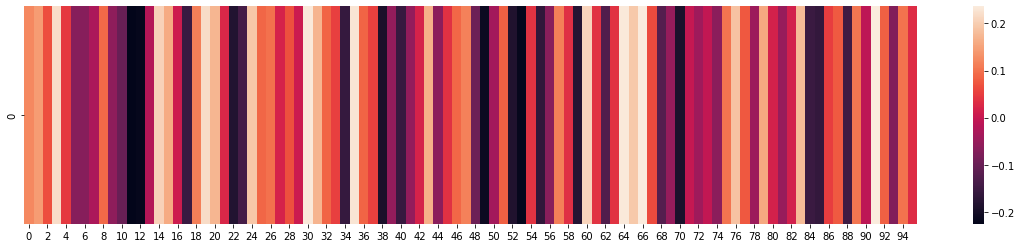

24


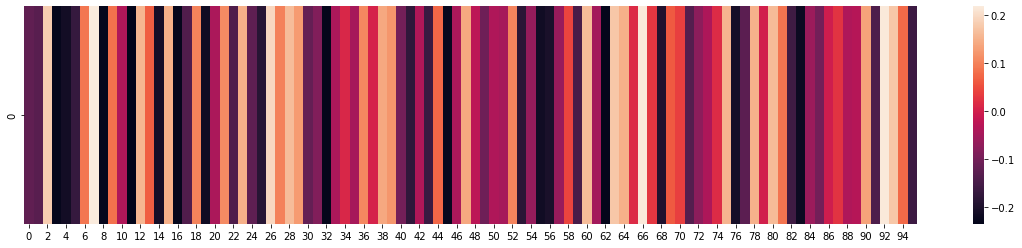

**************************************************
matrix 1, row 8
105


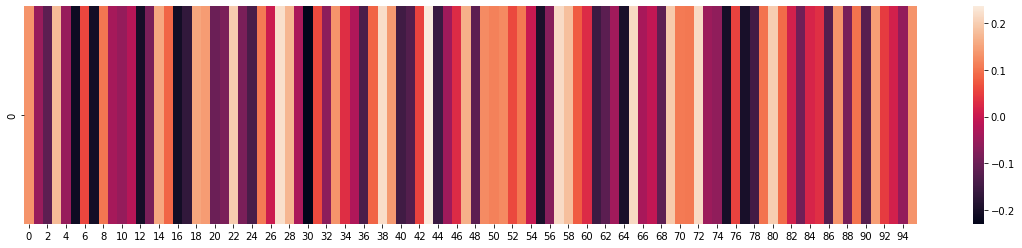

2022


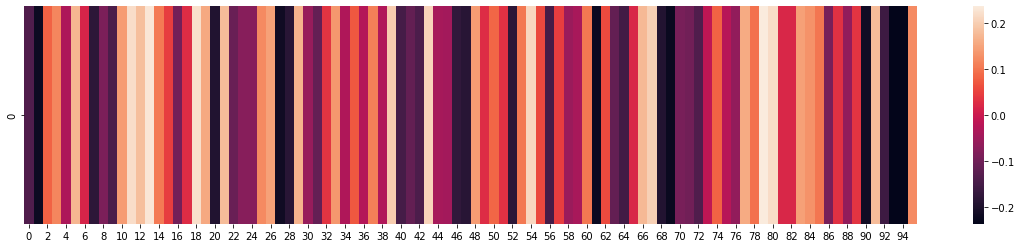

1933


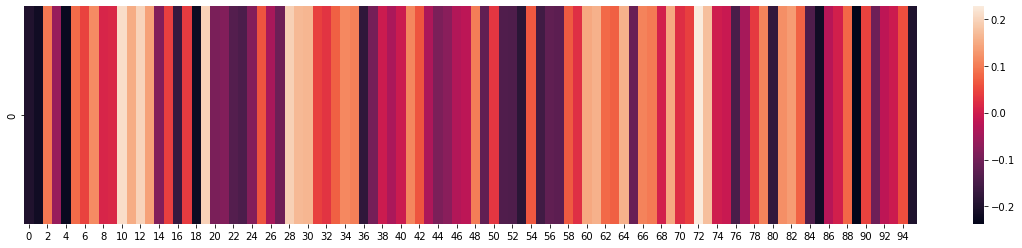

2609


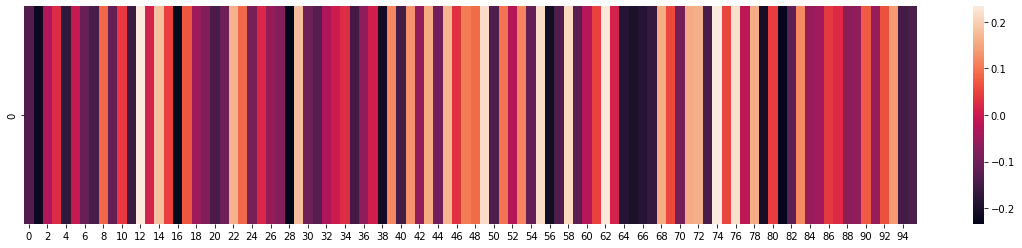

24


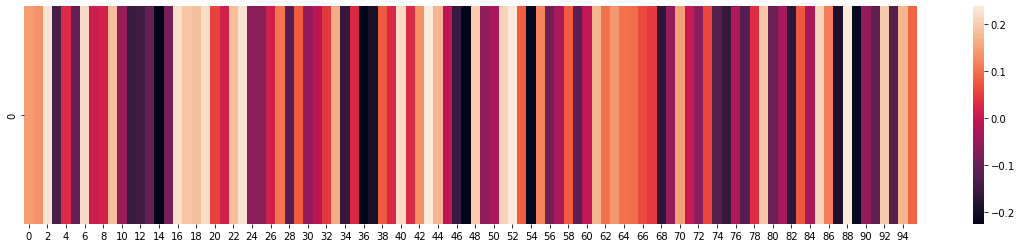

**************************************************
matrix 1, row 9
105


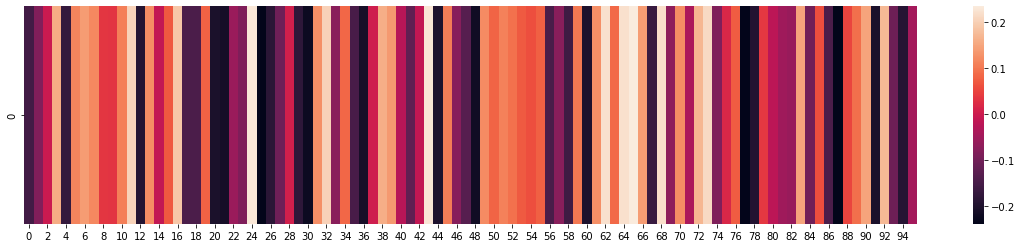

2022


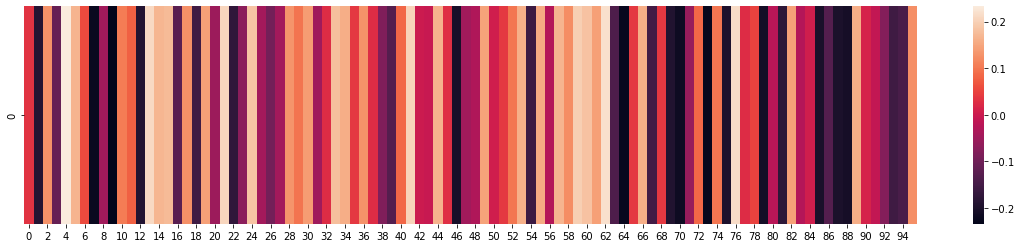

1933


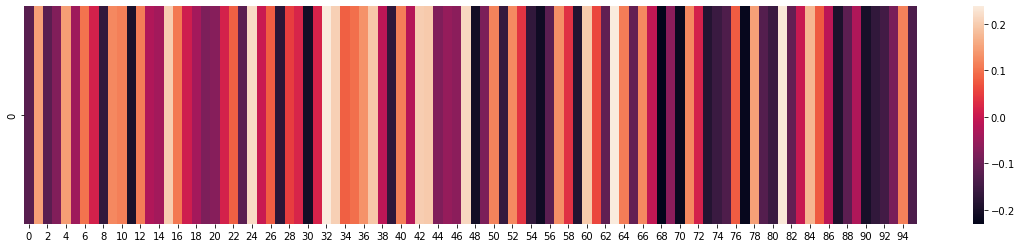

2609


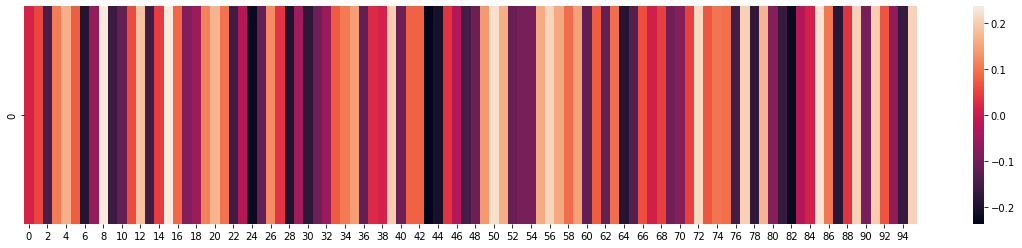

24


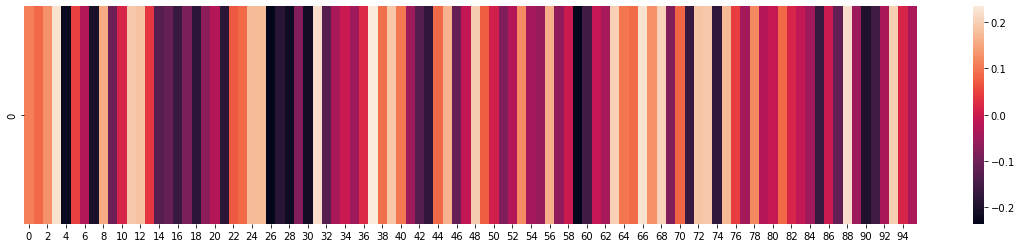

In [88]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    for seed in bad_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        plt.figure(figsize=(20, 4))
        sns.heatmap(pd.DataFrame(w[i]).transpose())
        plt.show()
    

**************************************************
matrix 1, row 0
17


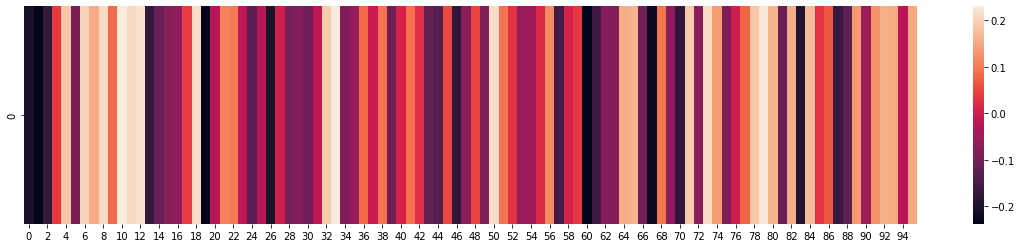

193


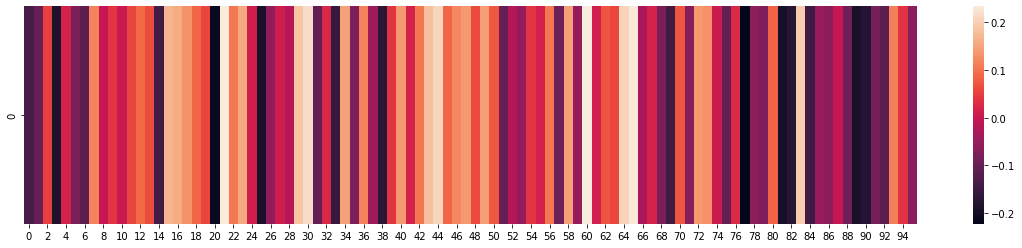

136


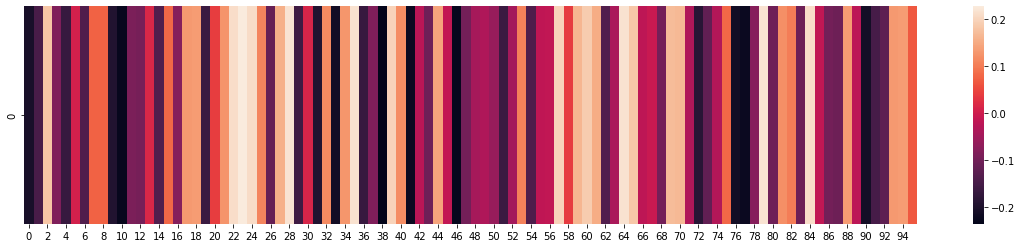

1034


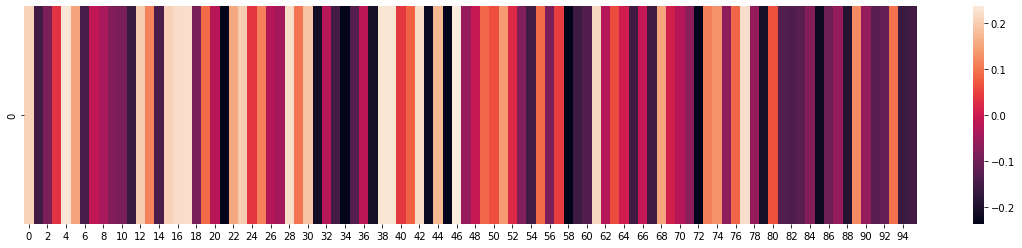

1212


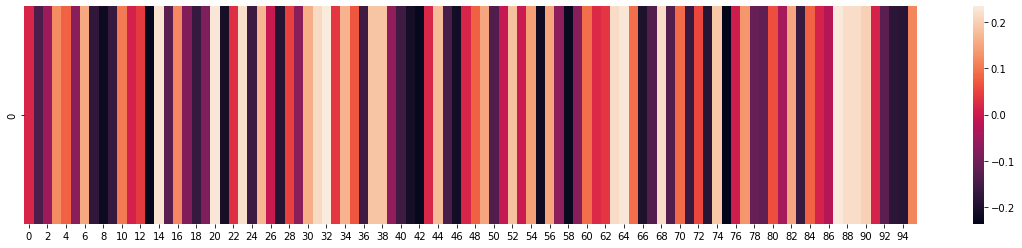

**************************************************
matrix 1, row 1
17


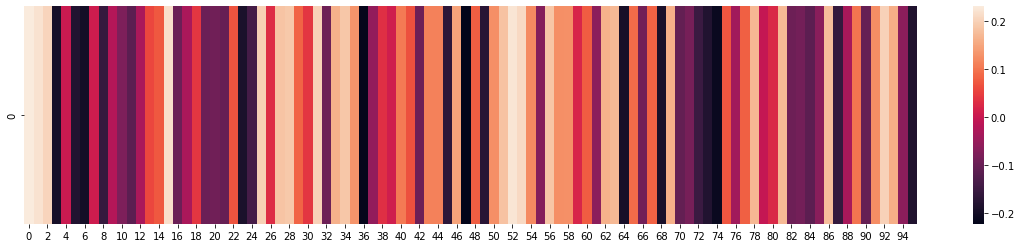

193


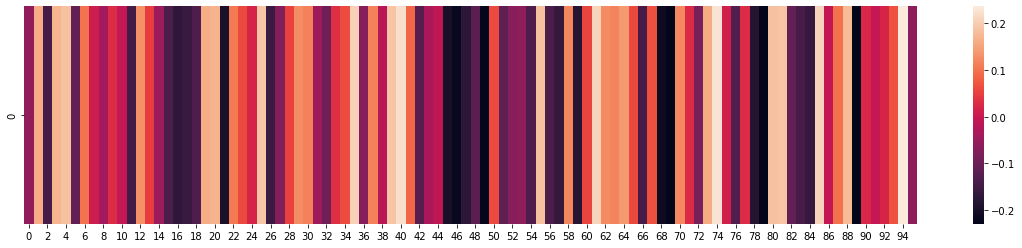

136


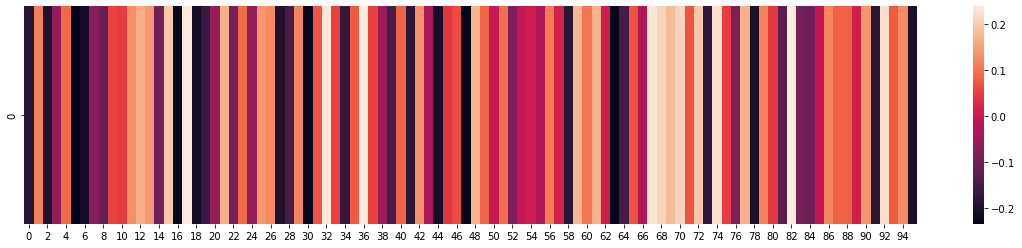

1034


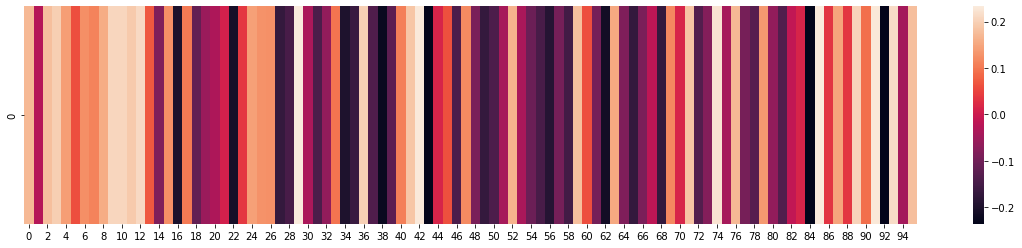

1212


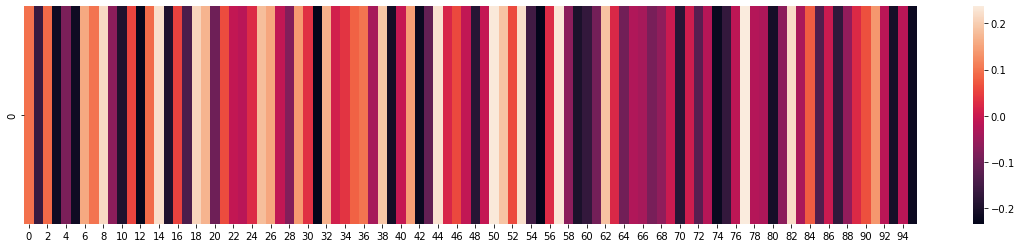

**************************************************
matrix 1, row 2
17


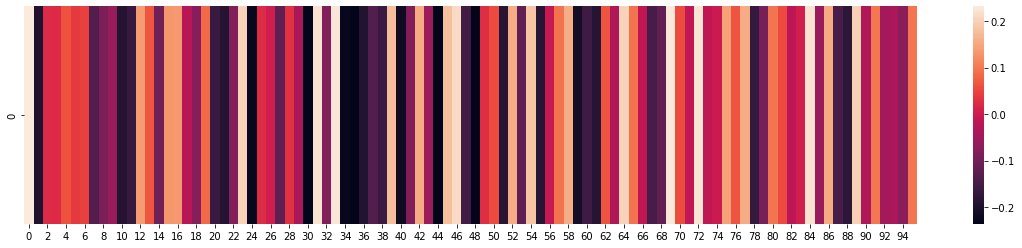

193


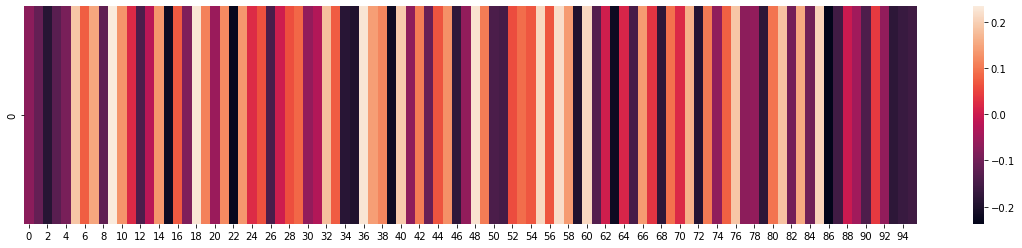

136


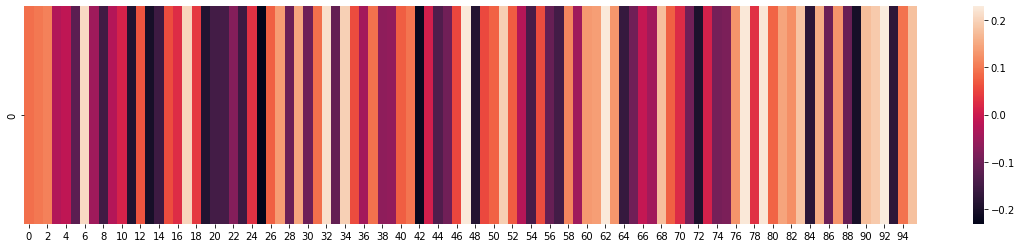

1034


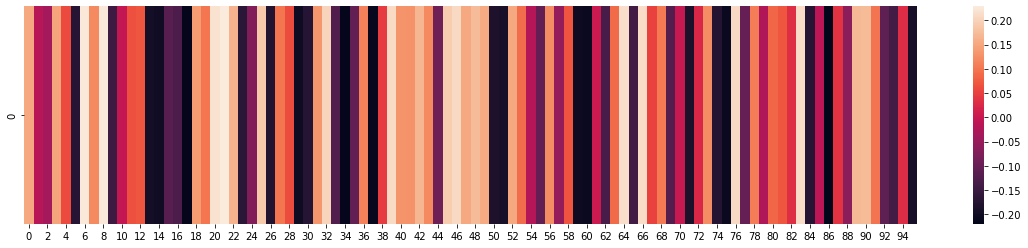

1212


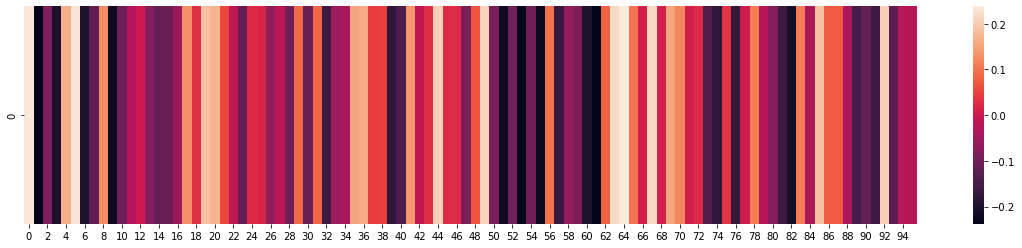

**************************************************
matrix 1, row 3
17


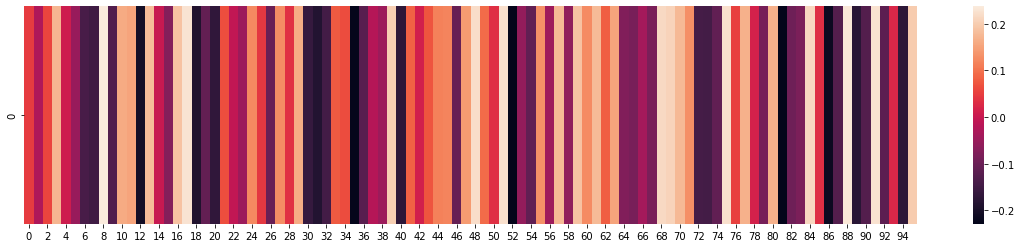

193


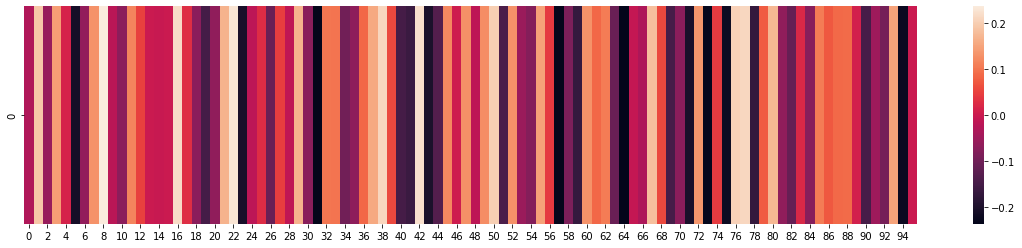

136


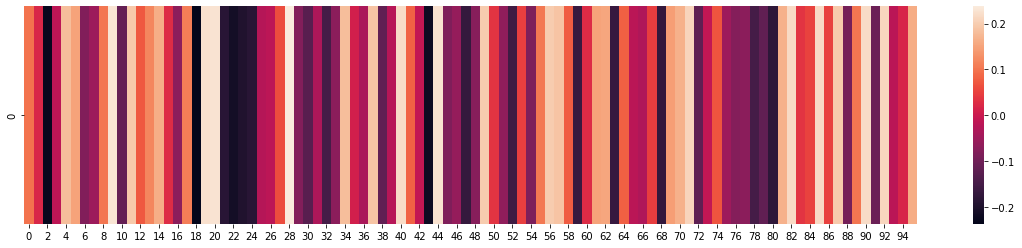

1034


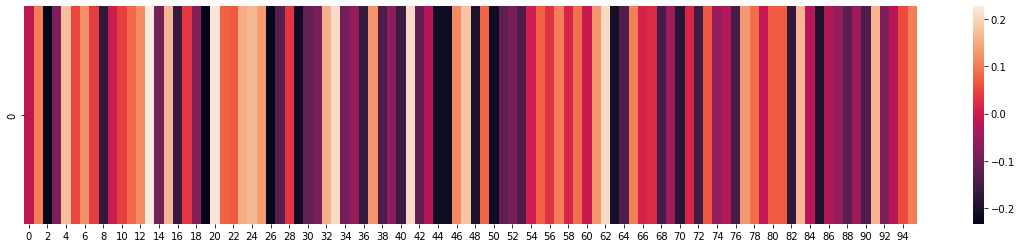

1212


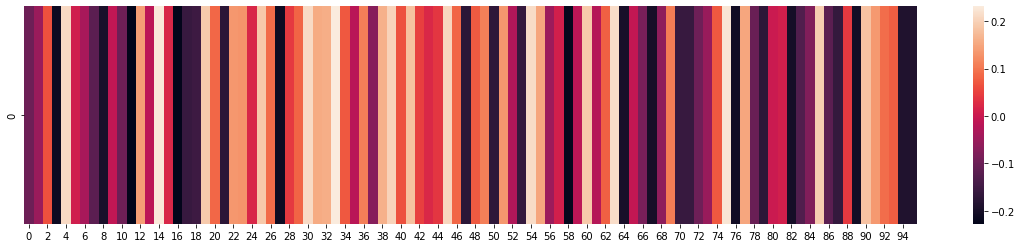

**************************************************
matrix 1, row 4
17


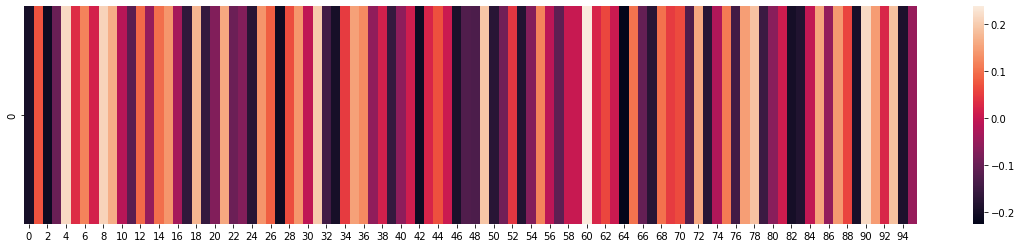

193


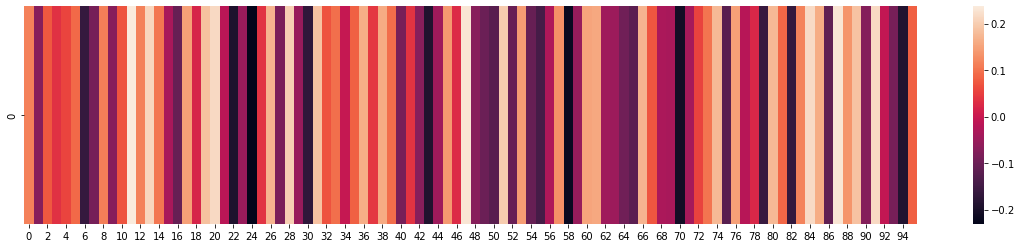

136


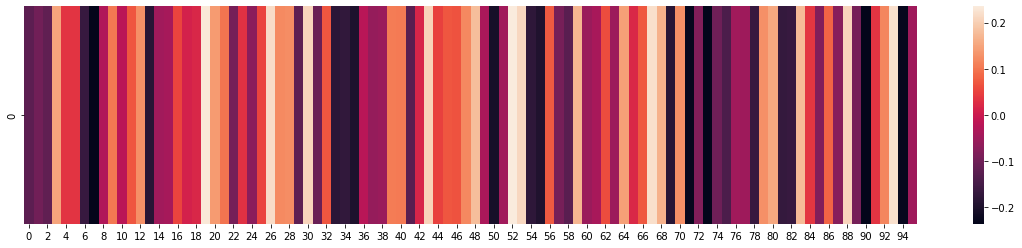

1034


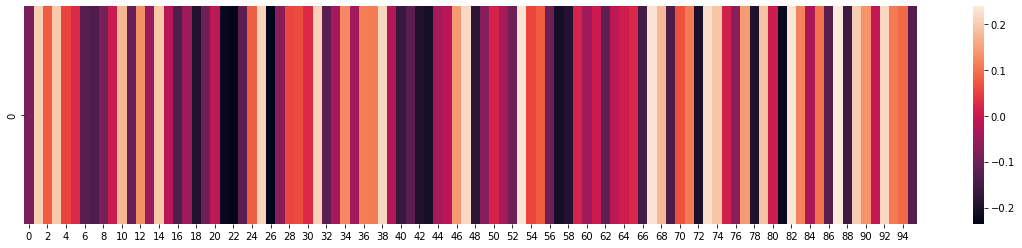

1212


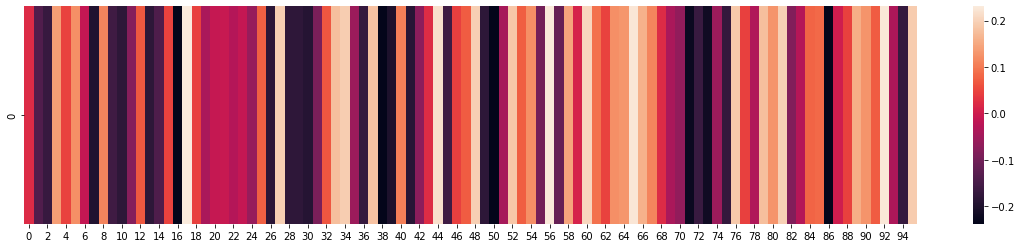

**************************************************
matrix 1, row 5
17


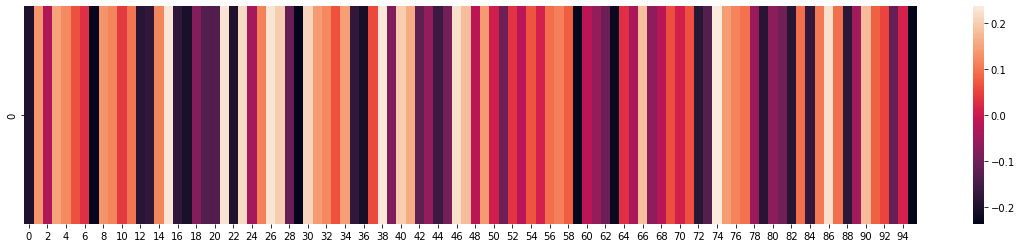

193


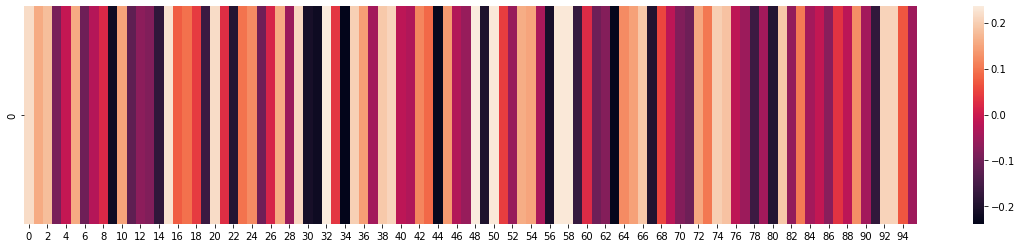

136


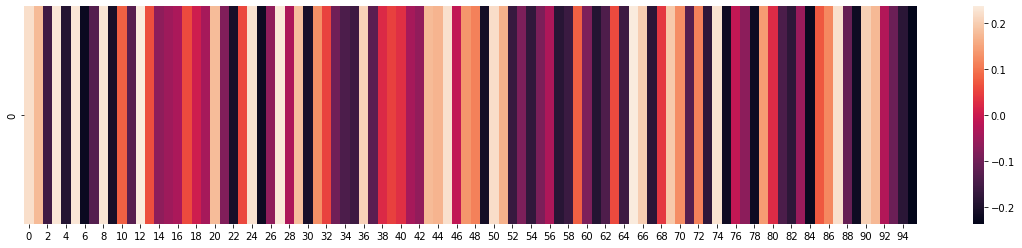

1034


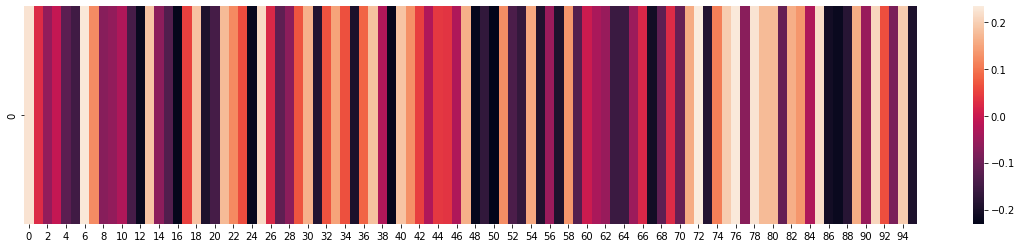

1212


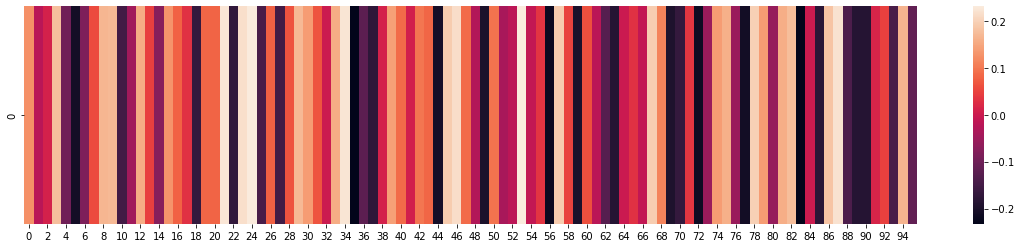

**************************************************
matrix 1, row 6
17


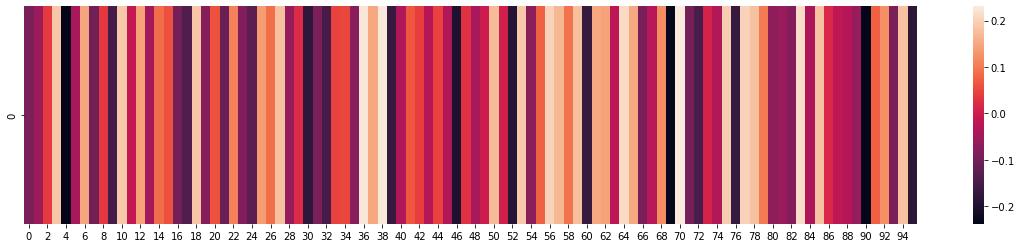

193


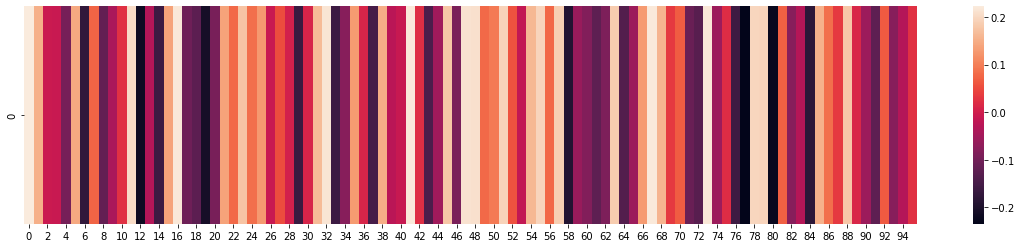

136


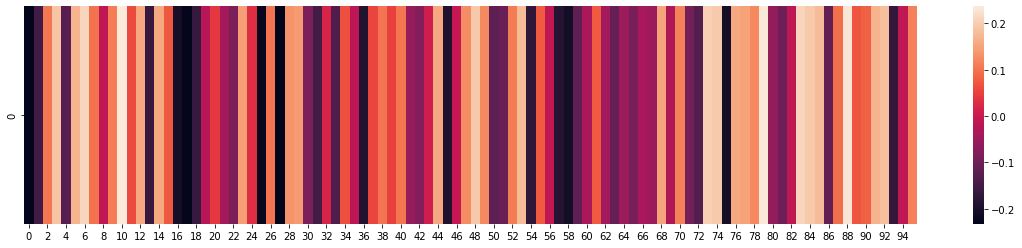

1034


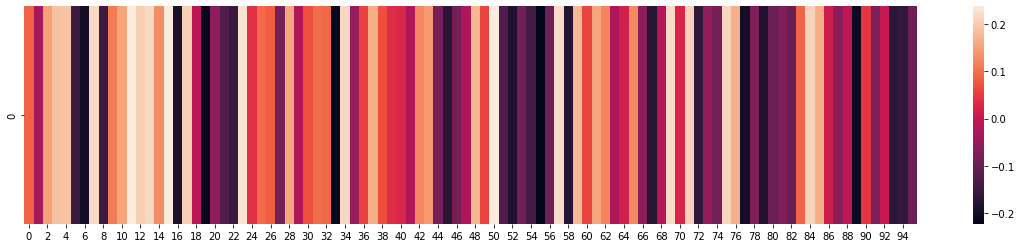

1212


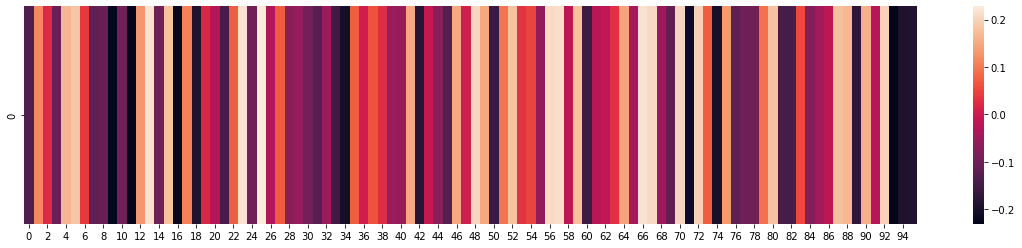

**************************************************
matrix 1, row 7
17


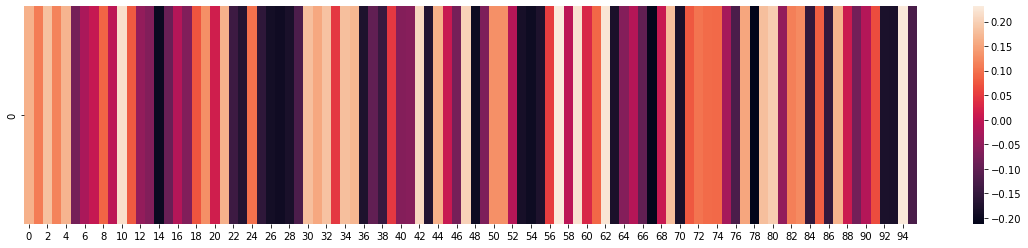

193


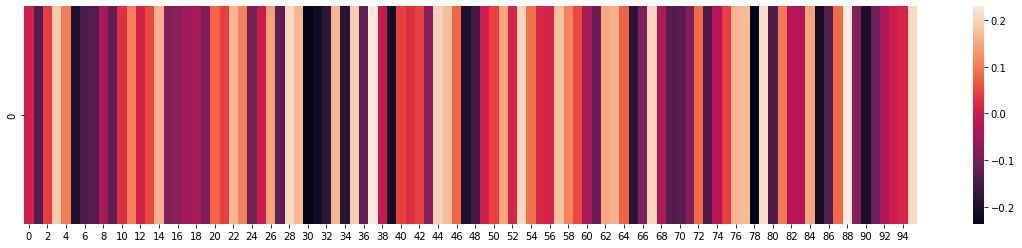

136


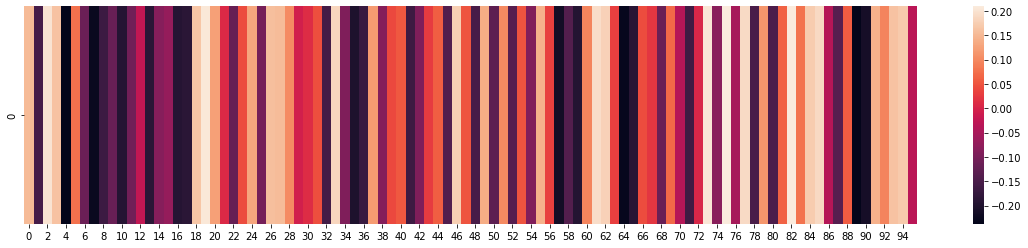

1034


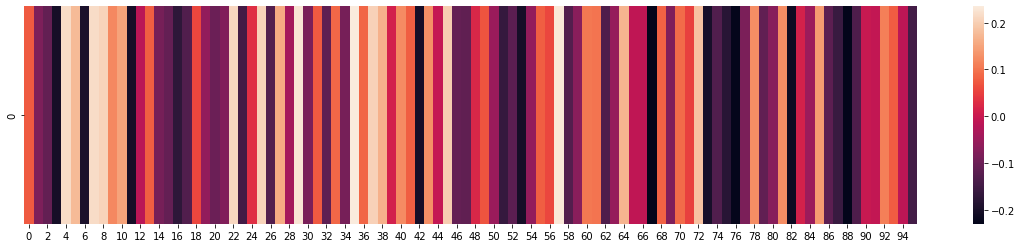

1212


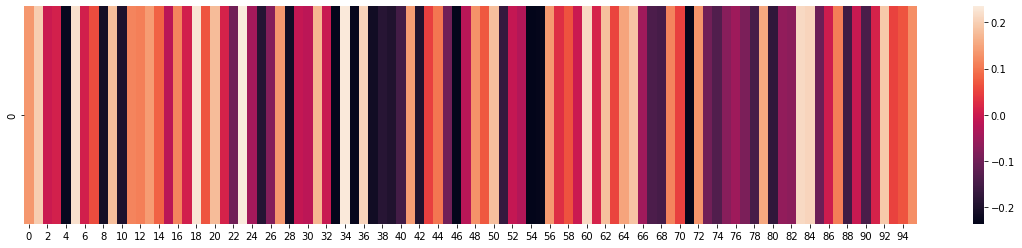

**************************************************
matrix 1, row 8
17


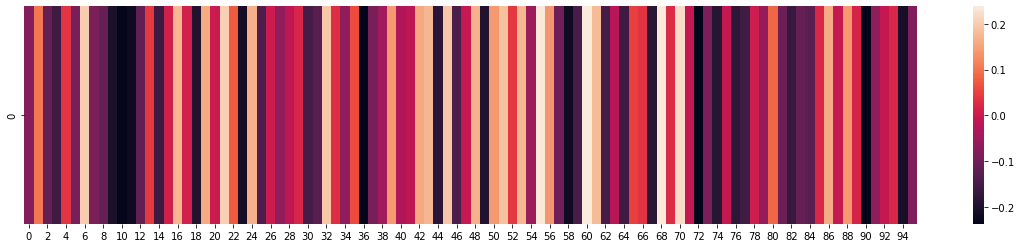

193


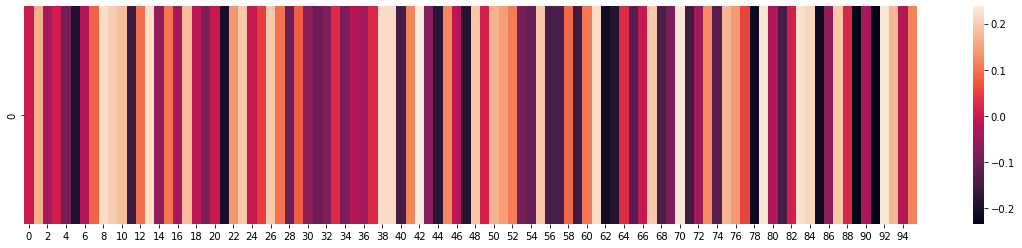

136


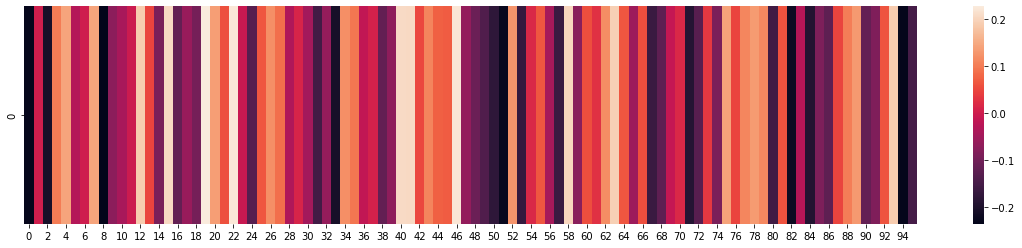

1034


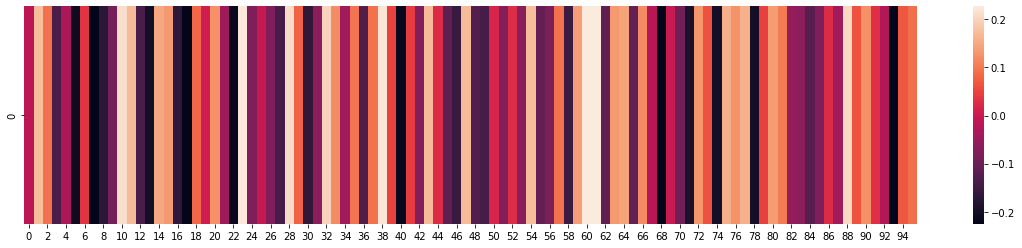

1212


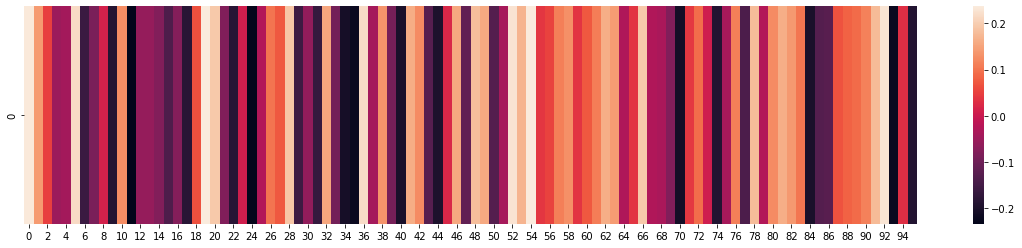

**************************************************
matrix 1, row 9
17


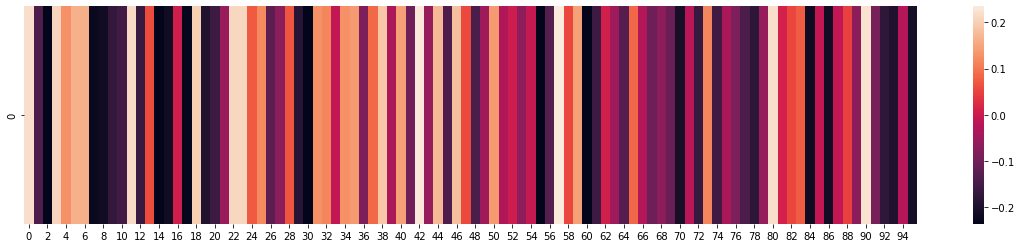

193


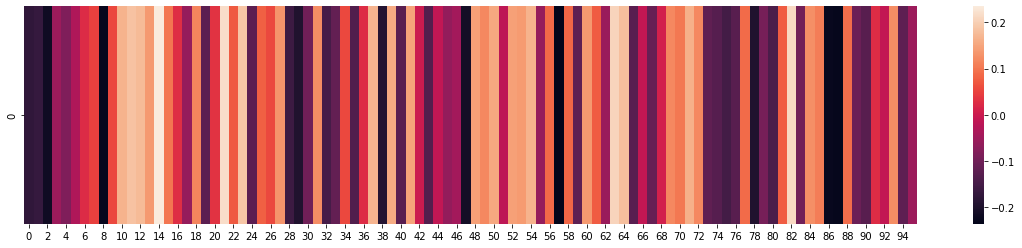

136


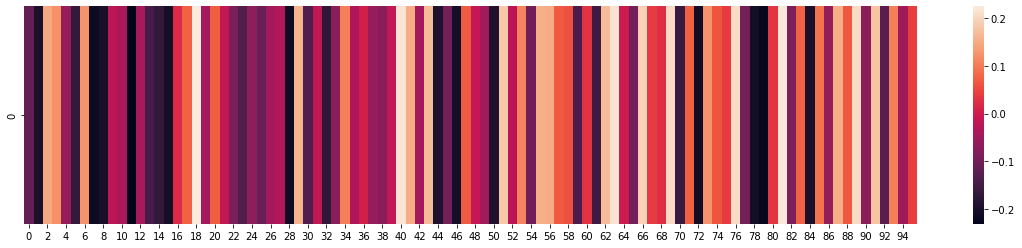

1034


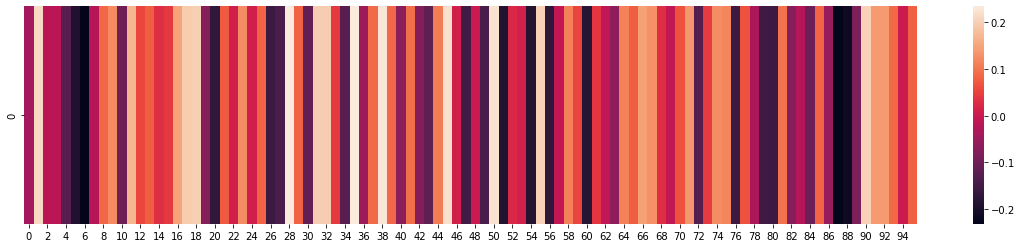

1212


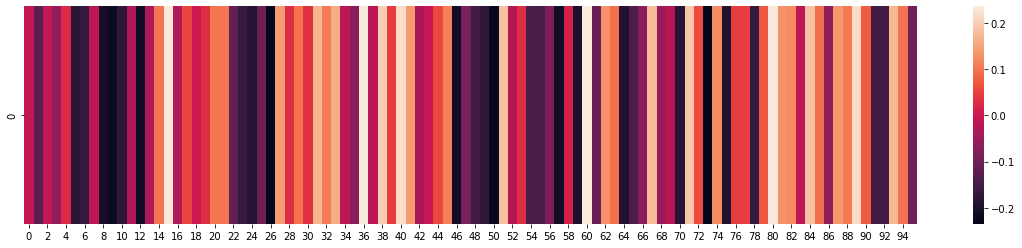

In [89]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    for seed in good_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        plt.figure(figsize=(20, 4))
        sns.heatmap(pd.DataFrame(w[i]).transpose())
        plt.show()
    

**************************************************
matrix 1, row 0
17


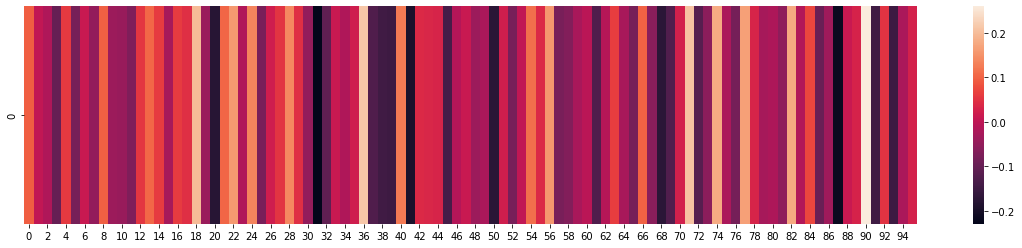

193


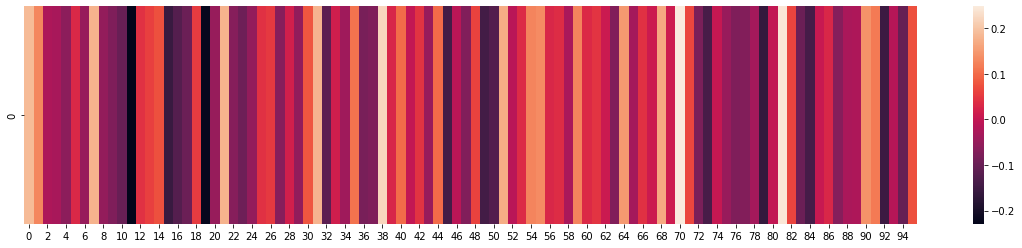

136


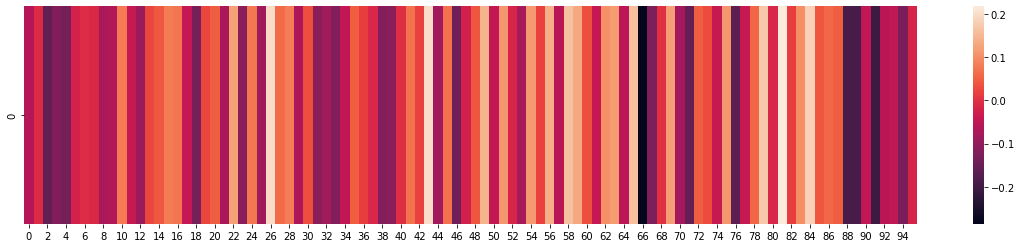

1034


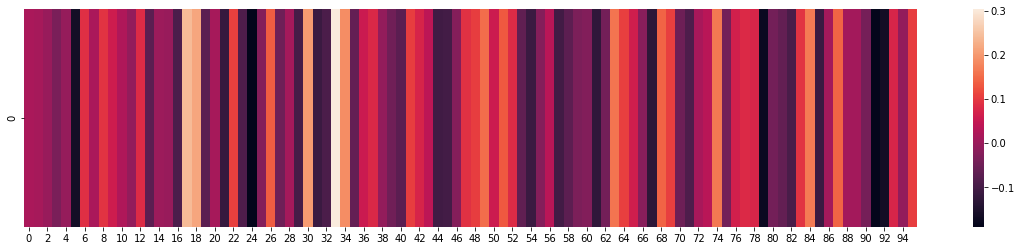

1212


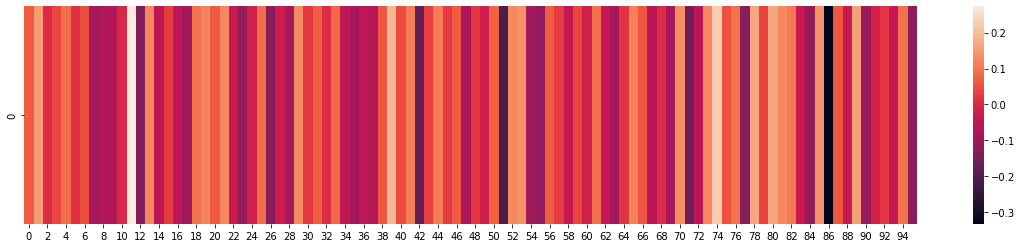

**************************************************
matrix 1, row 1
17


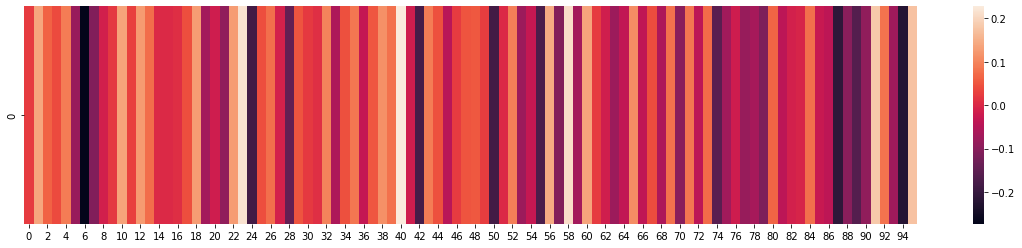

193


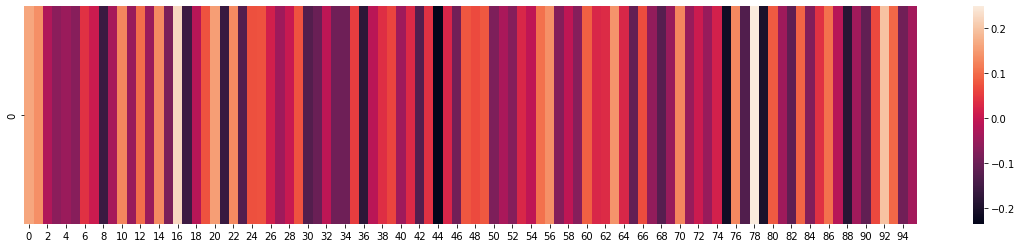

136


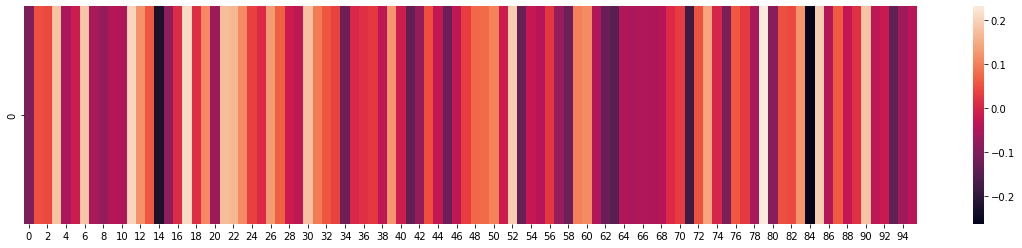

1034


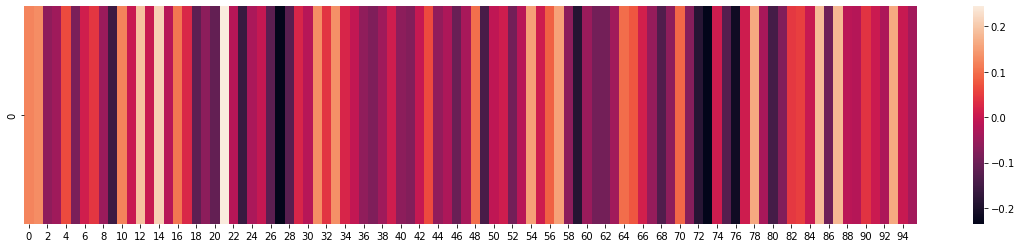

1212


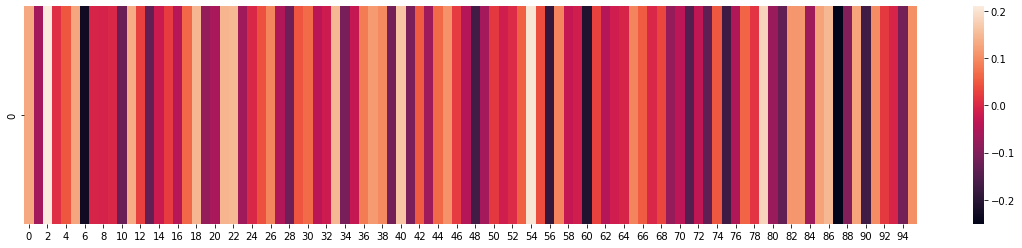

**************************************************
matrix 1, row 2
17


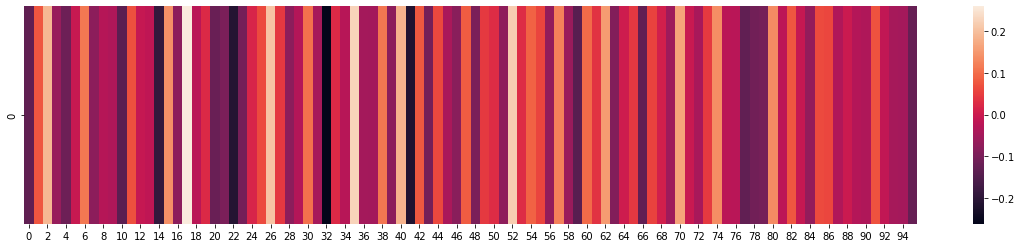

193


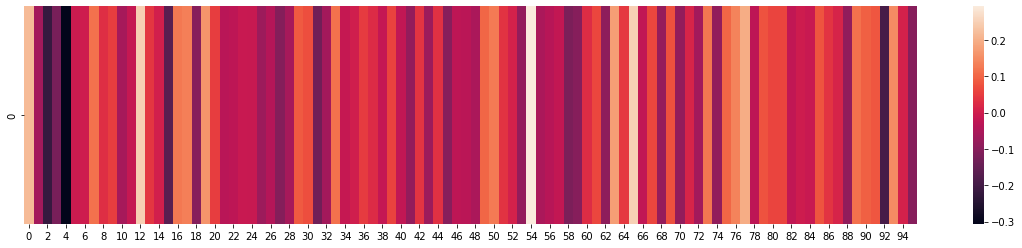

136


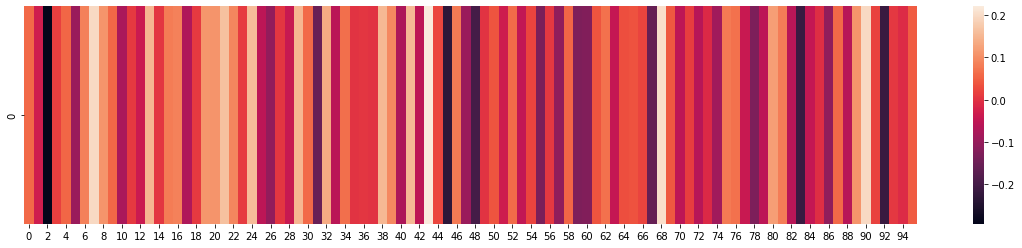

1034


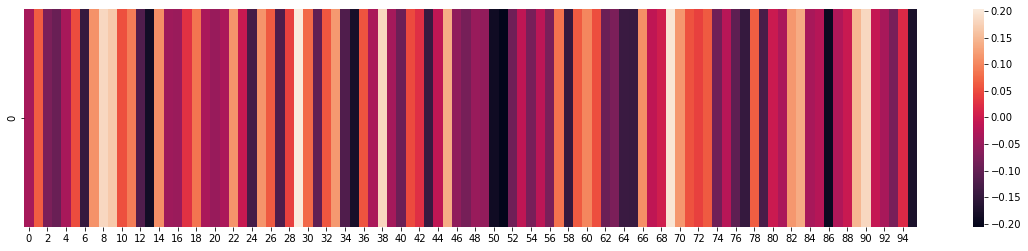

1212


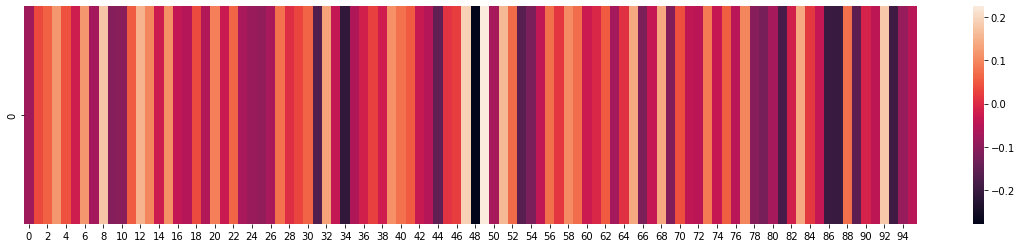

**************************************************
matrix 1, row 3
17


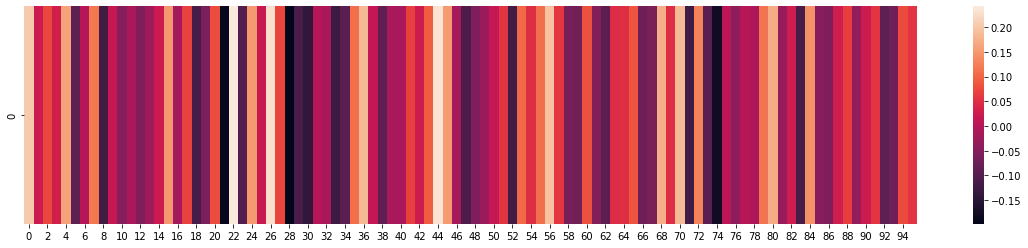

193


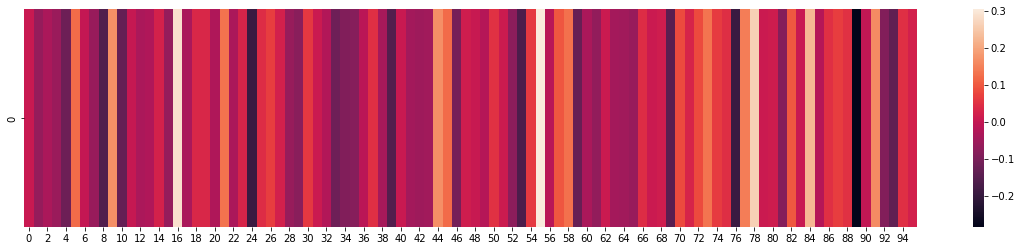

136


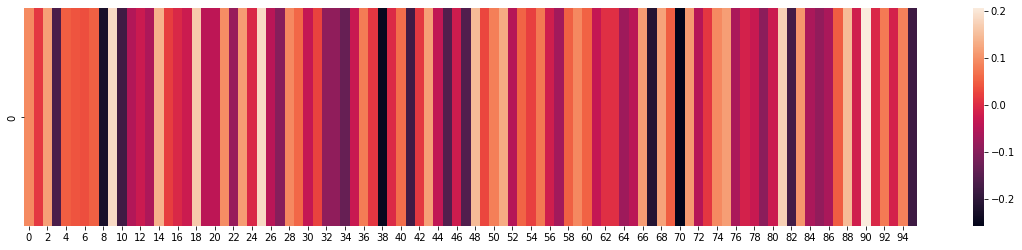

1034


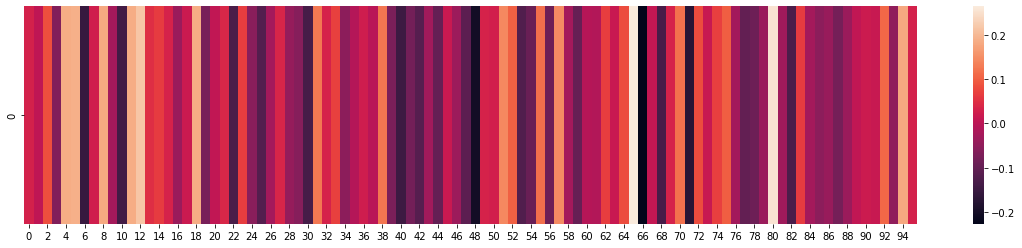

1212


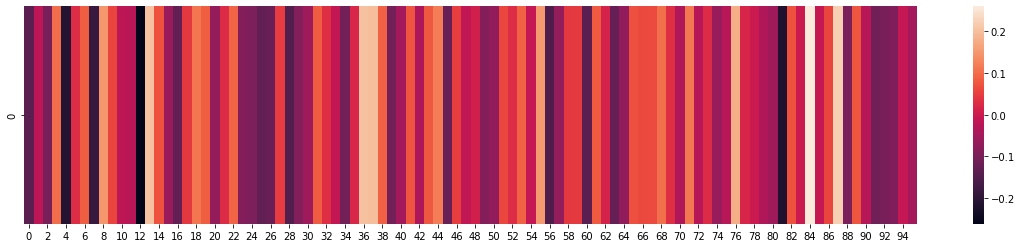

**************************************************
matrix 1, row 4
17


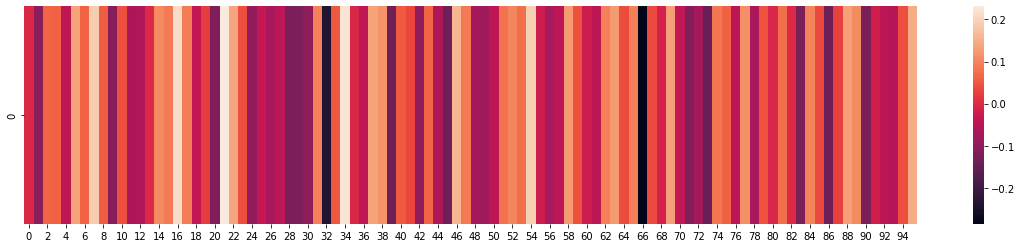

193


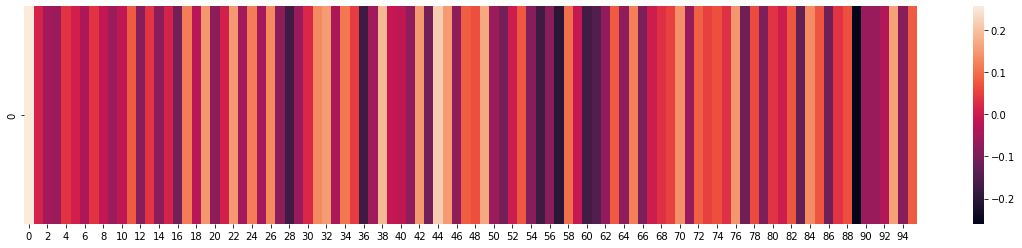

136


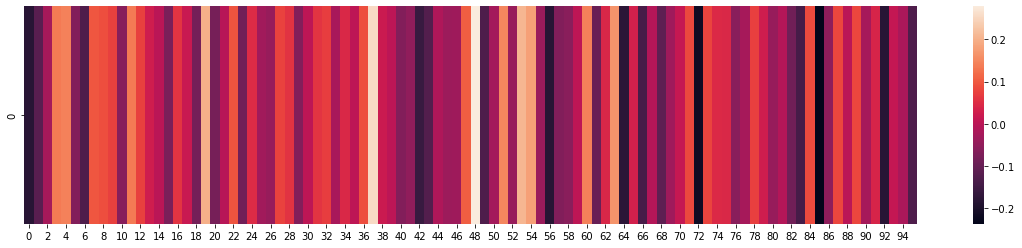

1034


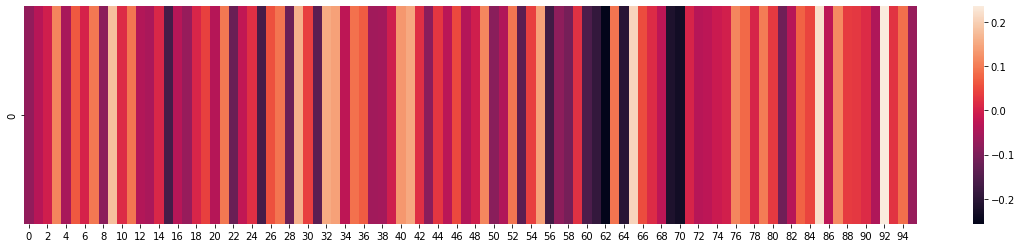

1212


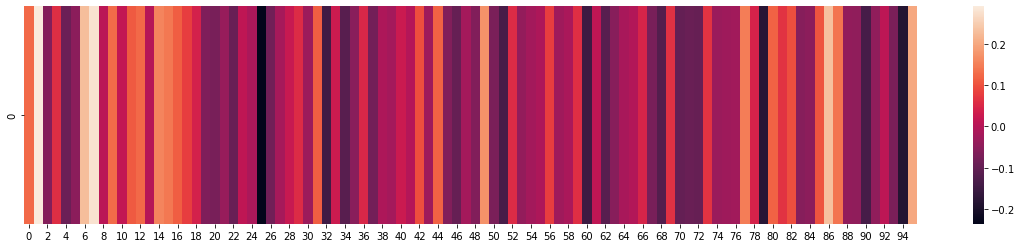

**************************************************
matrix 1, row 5
17


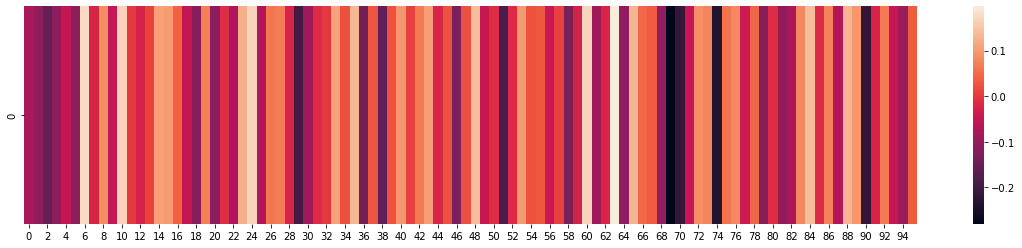

193


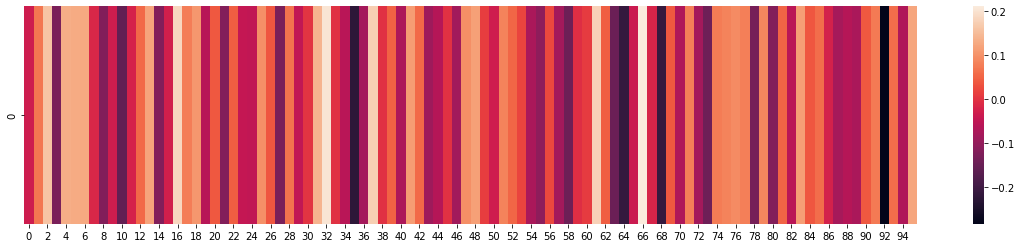

136


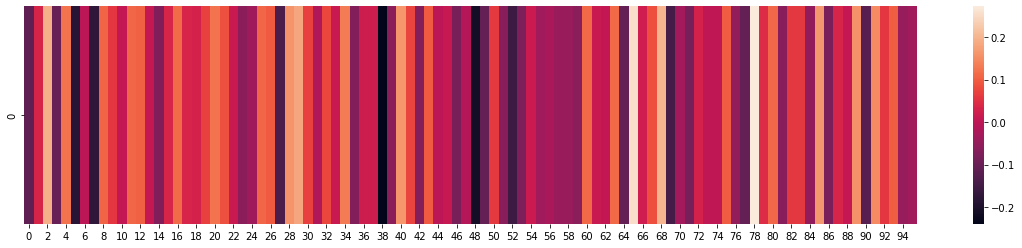

1034


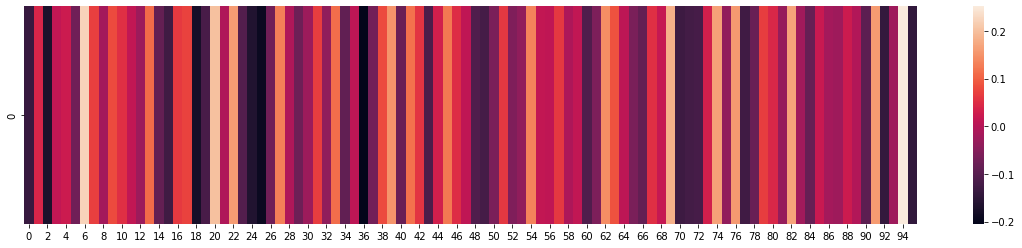

1212


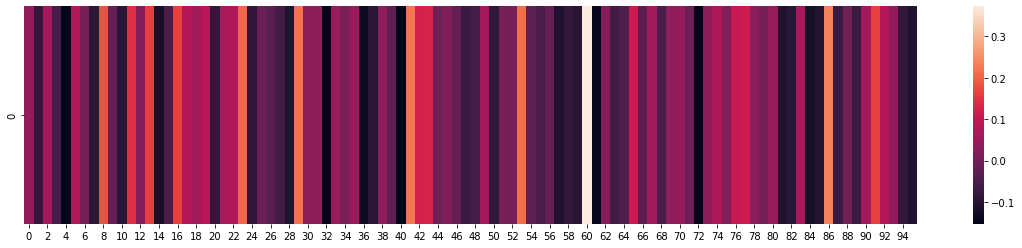

**************************************************
matrix 1, row 6
17


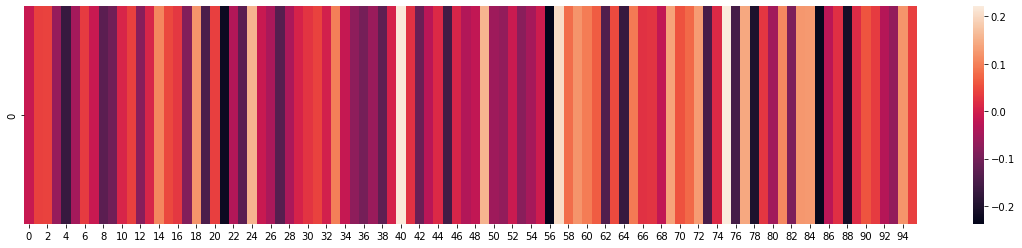

193


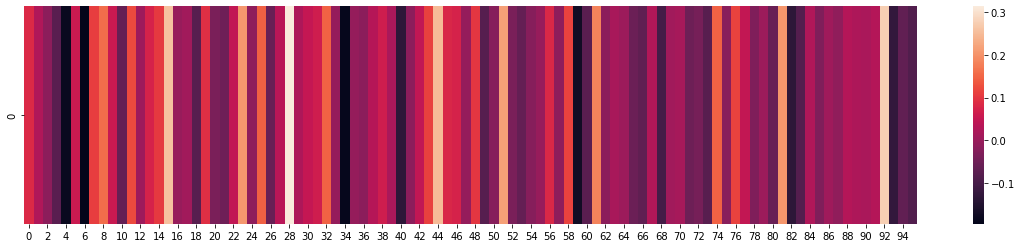

136


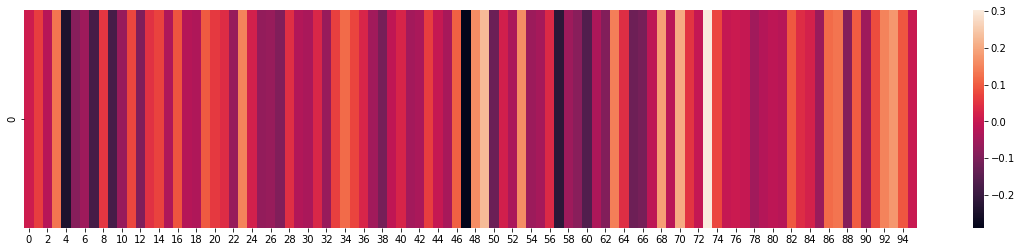

1034


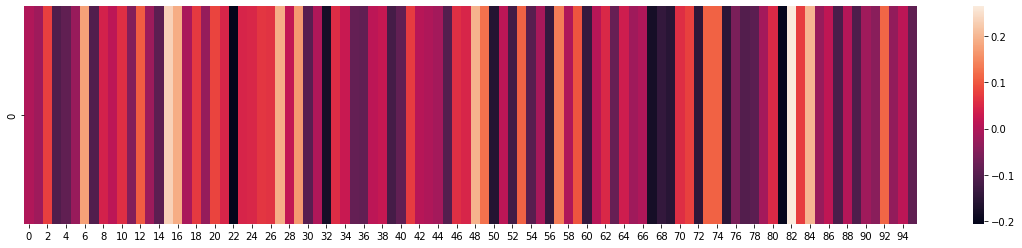

1212


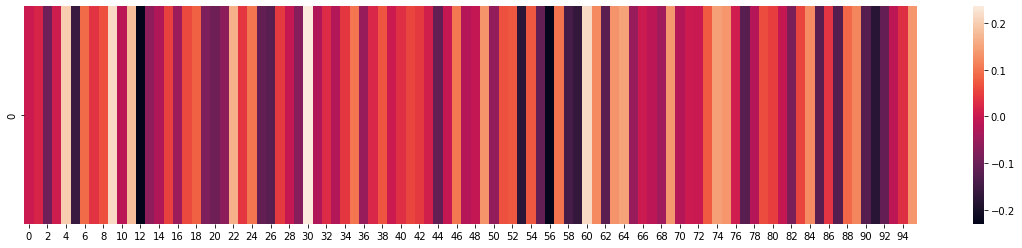

**************************************************
matrix 1, row 7
17


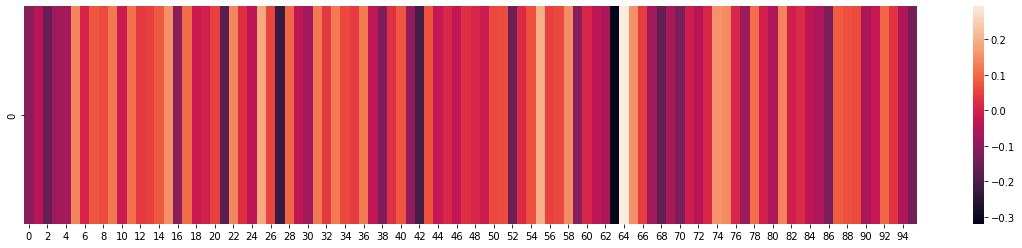

193


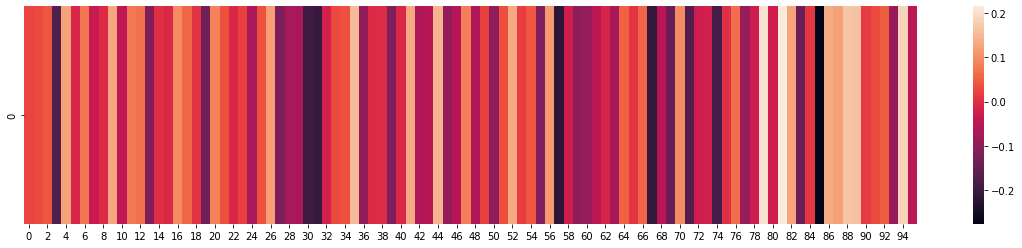

136


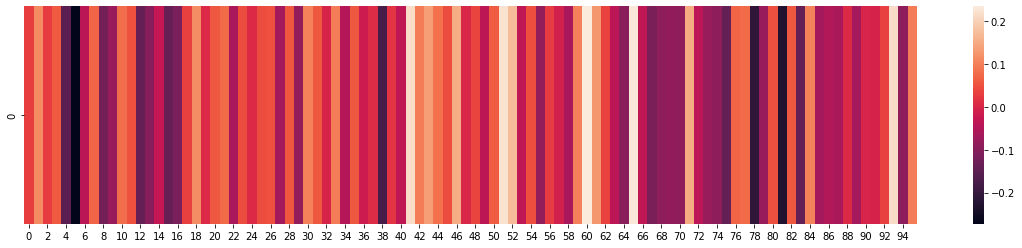

1034


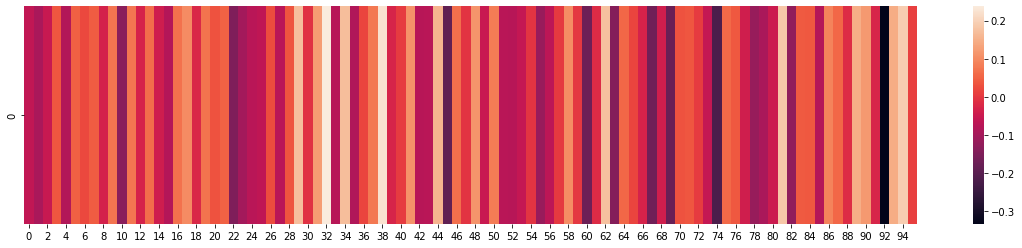

1212


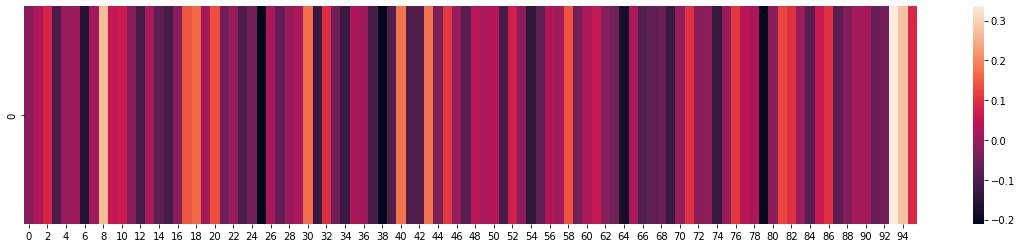

**************************************************
matrix 1, row 8
17


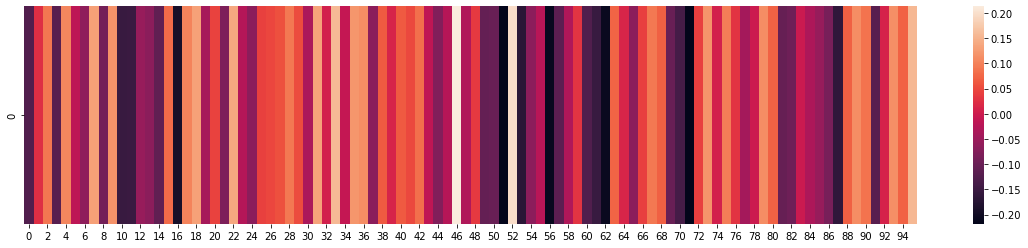

193


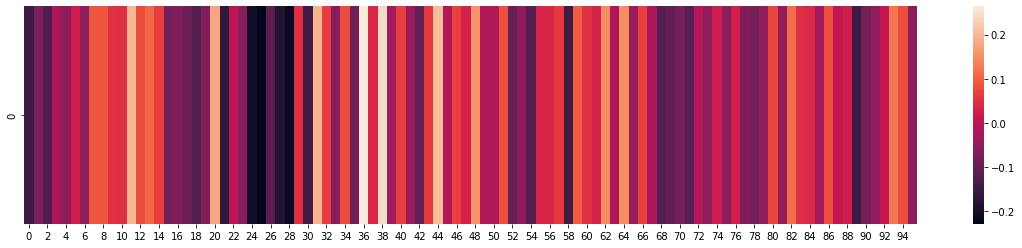

136


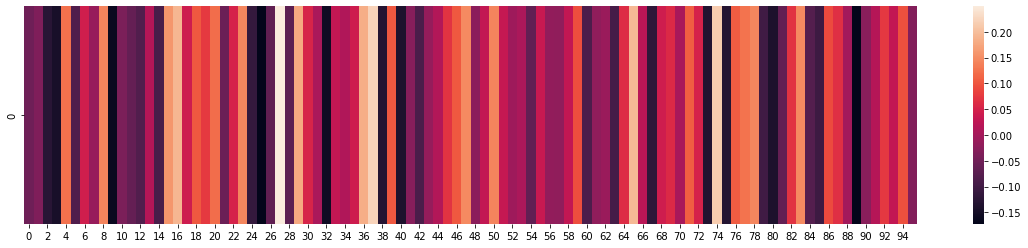

1034


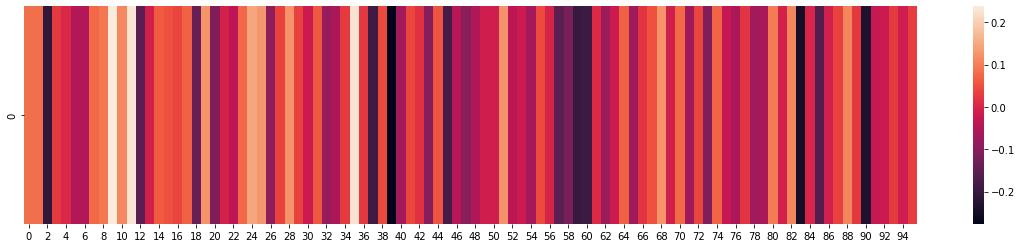

1212


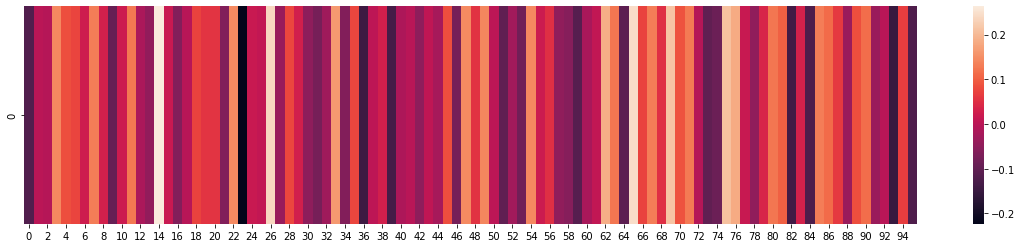

**************************************************
matrix 1, row 9
17


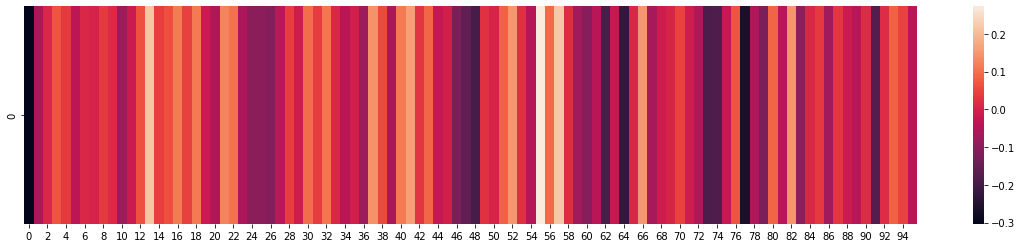

193


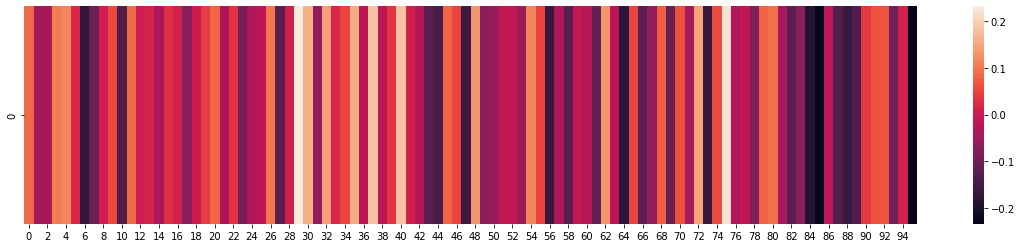

136


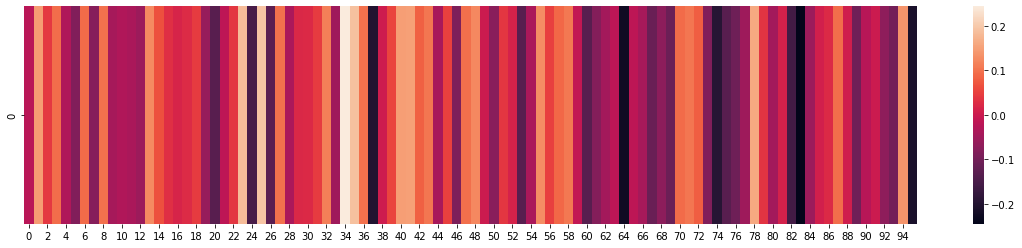

1034


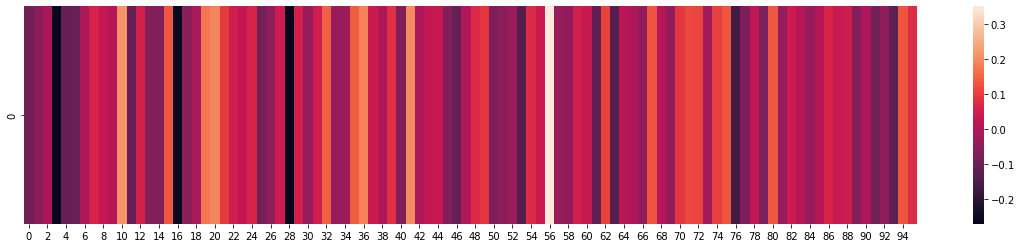

1212


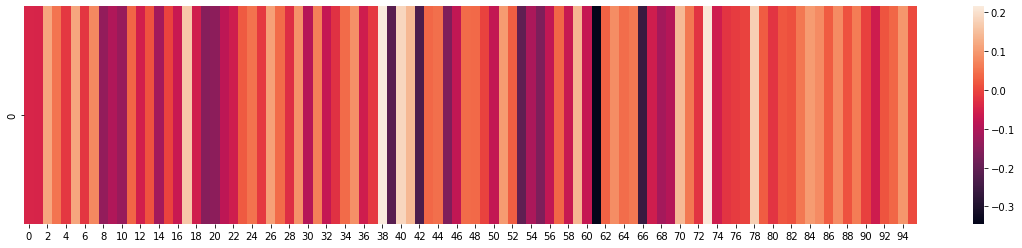

In [91]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    for seed in good_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[1]
        plt.figure(figsize=(20, 4))
        sns.heatmap(pd.DataFrame(w[i]).transpose())
        plt.show()
    

In [95]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    print('GOOD SEEDS')
    for seed in good_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        print('mean: ', np.mean(w[i]))
        print('std: ', np.std(w[i]))
        
    print()
    print('BAD SEEDS')
    for seed in bad_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        print('mean: ', np.mean(w[i]))
        print('std: ', np.std(w[i]))
    

**************************************************
matrix 1, row 0
GOOD SEEDS
17
mean:  0.00977378
std:  0.1345653
193
mean:  0.012788904
std:  0.11876883
136
mean:  -0.0059614405
std:  0.14047481
1034
mean:  -0.008933792
std:  0.14306828
1212
mean:  0.003099105
std:  0.1481506

BAD SEEDS
105
mean:  0.014646406
std:  0.12989442
2022
mean:  -0.012012509
std:  0.13429512
1933
mean:  0.0015191616
std:  0.13031244
2609
mean:  -0.008441447
std:  0.13199696
24
mean:  -0.0055953935
std:  0.13810906
**************************************************
matrix 1, row 1
GOOD SEEDS
17
mean:  0.014798109
std:  0.13537002
193
mean:  -0.00096308347
std:  0.13550289
136
mean:  0.012502215
std:  0.14196838
1034
mean:  0.010090481
std:  0.14481823
1212
mean:  -0.009350662
std:  0.13759068

BAD SEEDS
105
mean:  -0.02713517
std:  0.13001354
2022
mean:  0.010799694
std:  0.1367738
1933
mean:  -0.0059180926
std:  0.14167552
2609
mean:  0.018910374
std:  0.14746892
24
mean:  0.018002989
std:  0.13458437
******

**************************************************
matrix 1, row 0
17


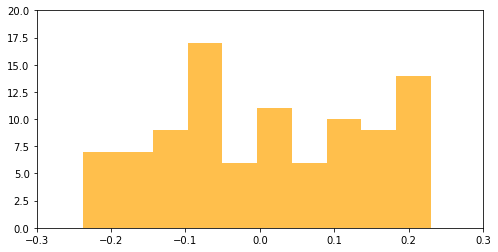

193


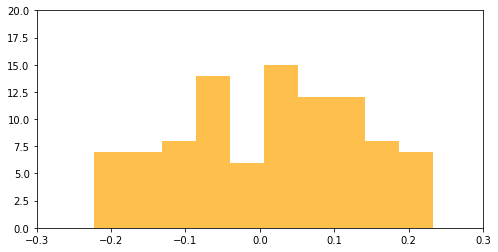

136


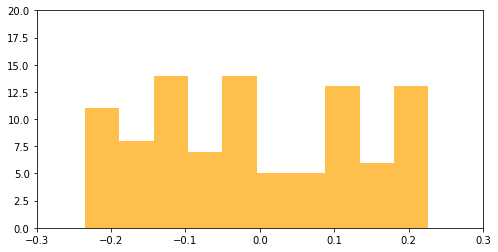

1034


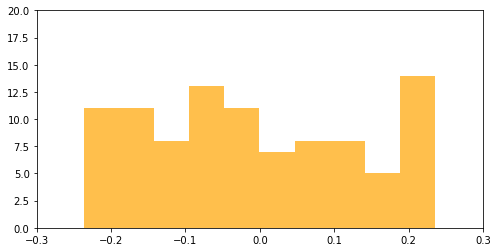

1212


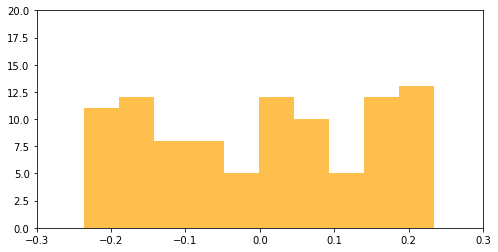

**************************************************
matrix 1, row 1
17


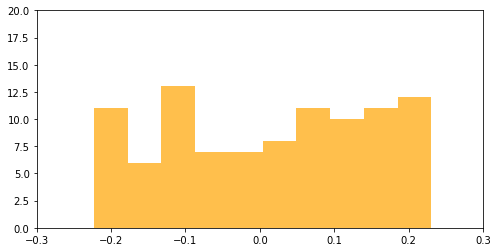

193


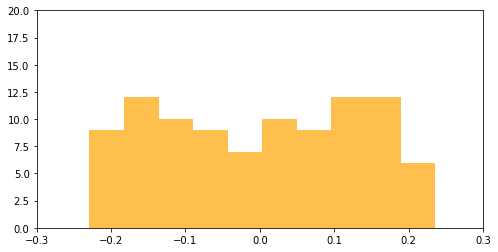

136


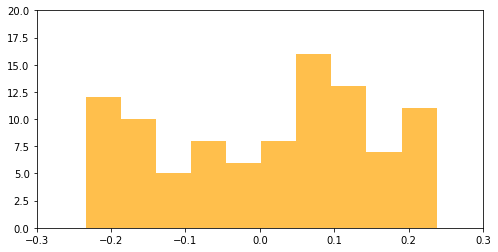

1034


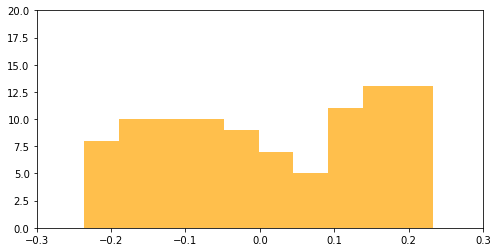

1212


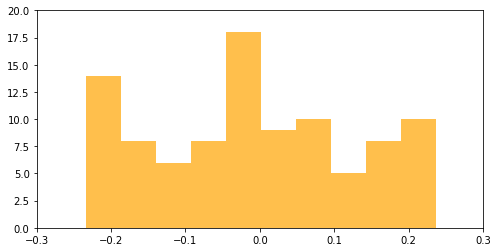

**************************************************
matrix 1, row 2
17


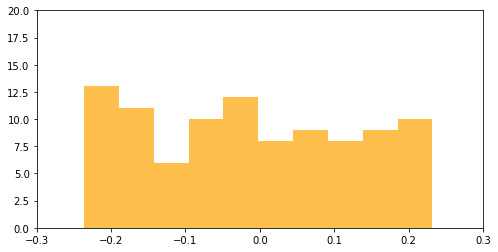

193


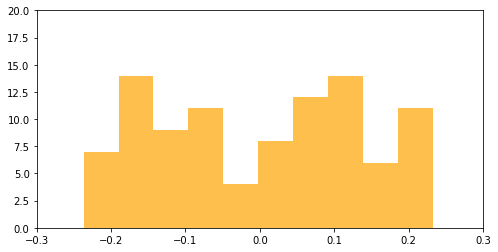

136


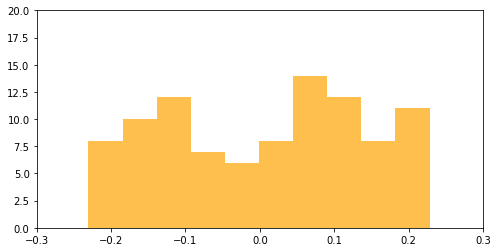

1034


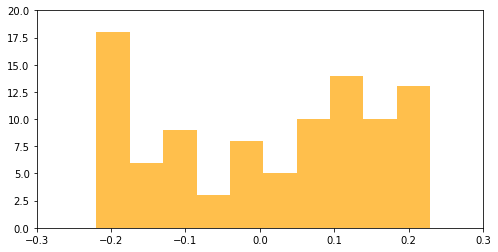

1212


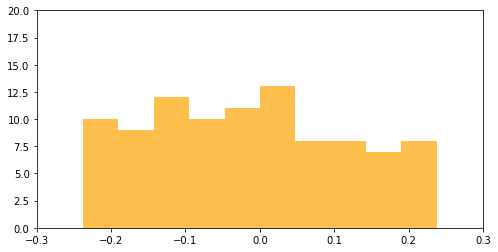

**************************************************
matrix 1, row 3
17


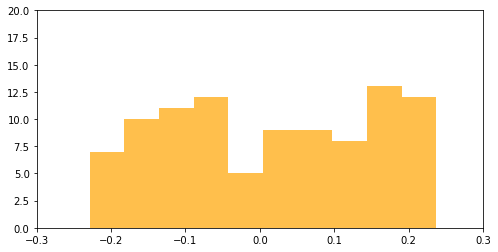

193


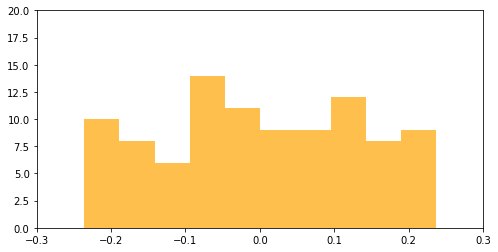

136


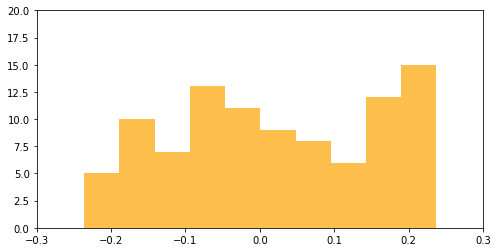

1034


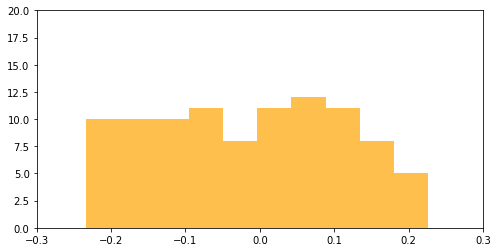

1212


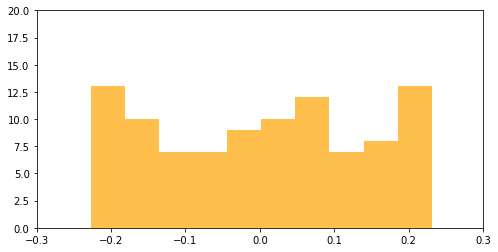

**************************************************
matrix 1, row 4
17


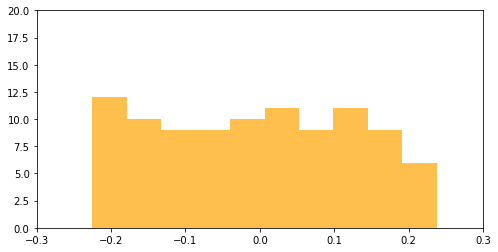

193


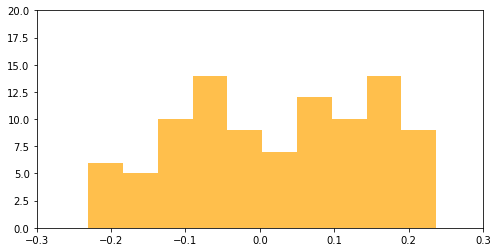

136


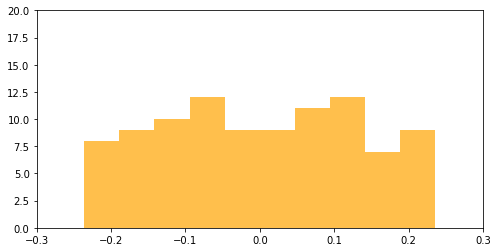

1034


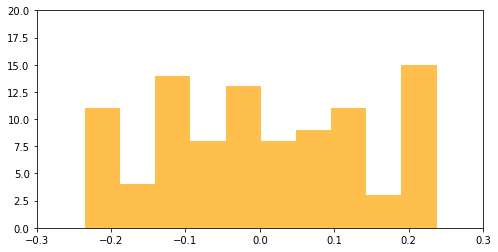

1212


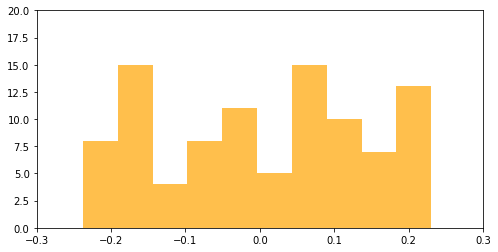

**************************************************
matrix 1, row 5
17


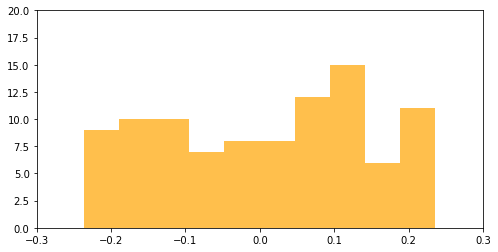

193


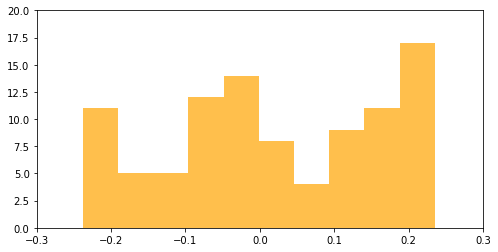

136


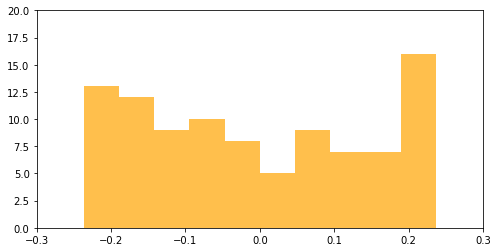

1034


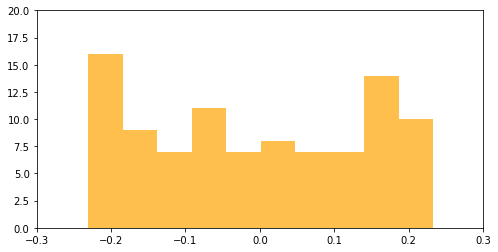

1212


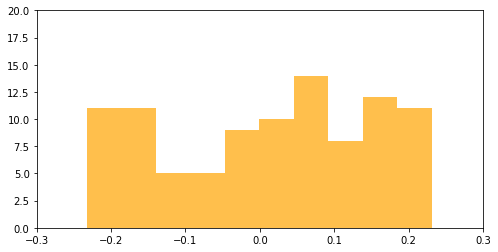

**************************************************
matrix 1, row 6
17


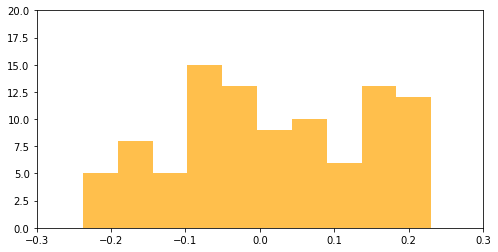

193


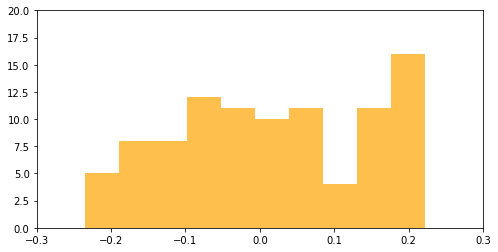

136


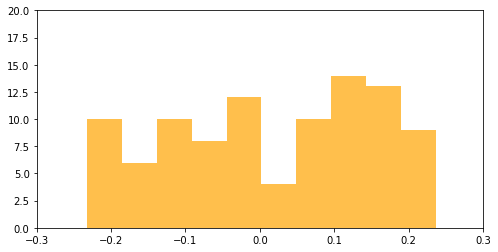

1034


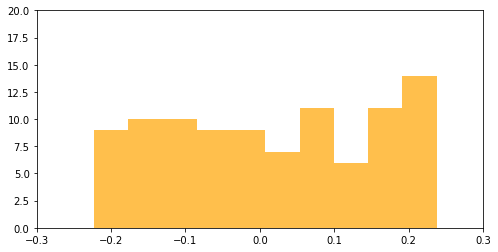

1212


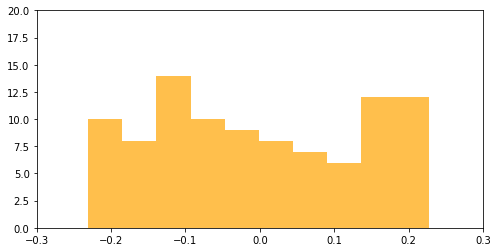

**************************************************
matrix 1, row 7
17


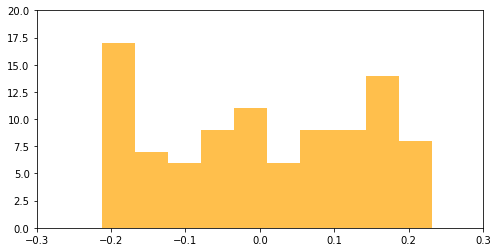

193


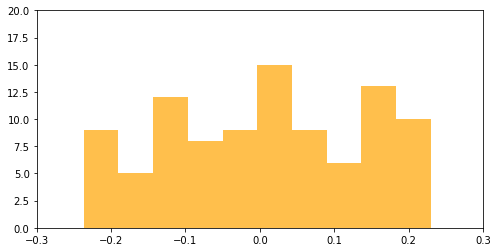

136


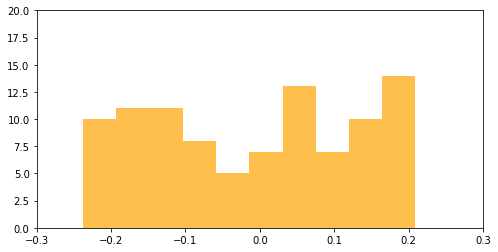

1034


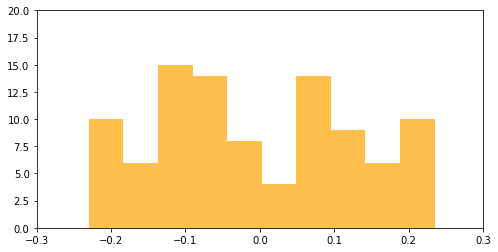

1212


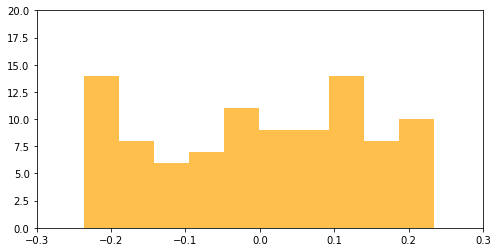

**************************************************
matrix 1, row 8
17


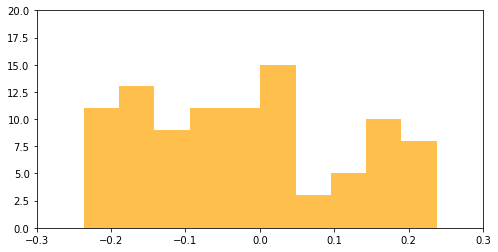

193


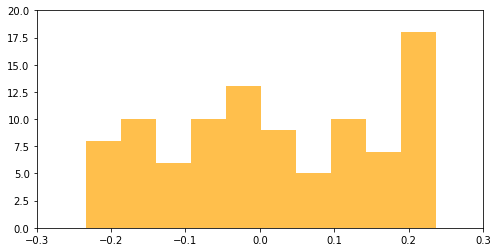

136


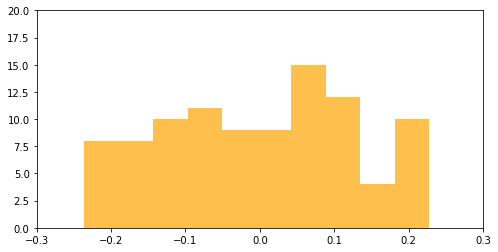

1034


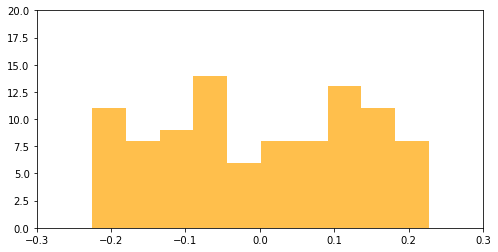

1212


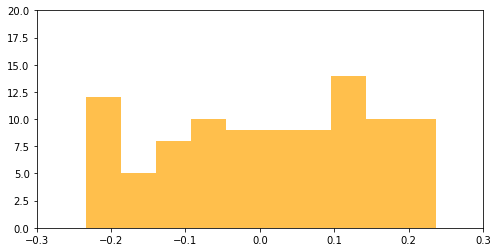

**************************************************
matrix 1, row 9
17


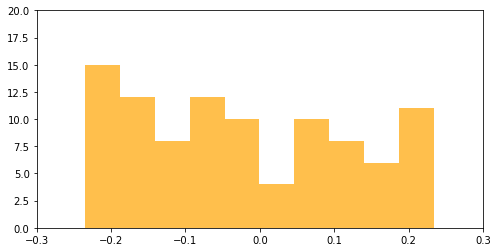

193


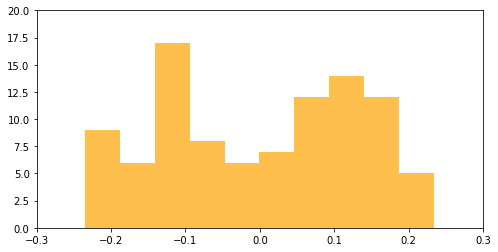

136


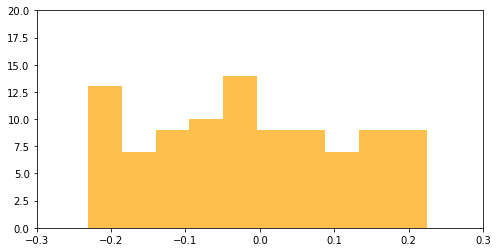

1034


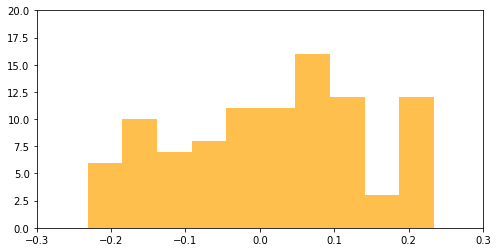

1212


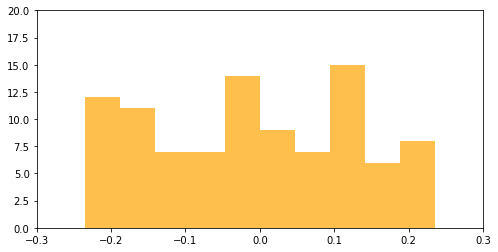

In [102]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    for seed in good_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        plt.figure(figsize=(8, 4))
        plt.hist(w[i], color='orange', alpha=0.7)
        plt.xlim([-0.3, 0.3])
        plt.ylim([0, 20])
        plt.show()
    

**************************************************
matrix 1, row 0
105


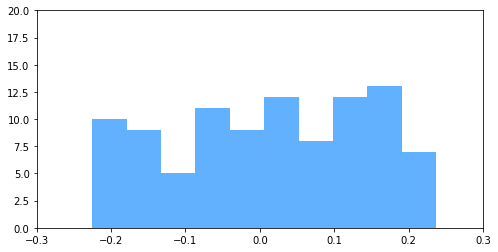

2022


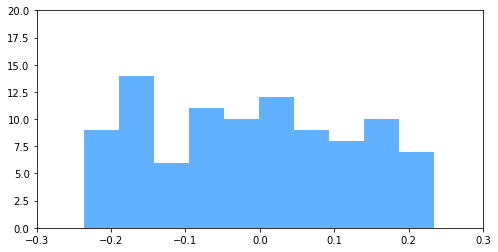

1933


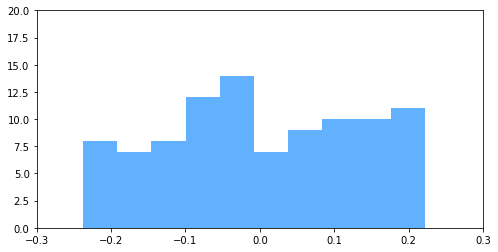

2609


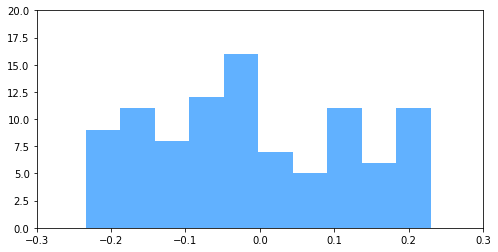

24


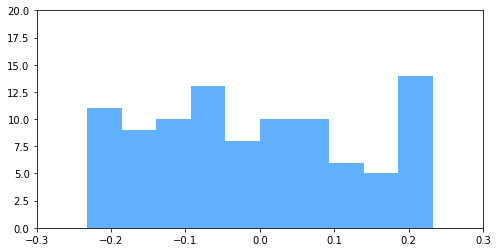

**************************************************
matrix 1, row 1
105


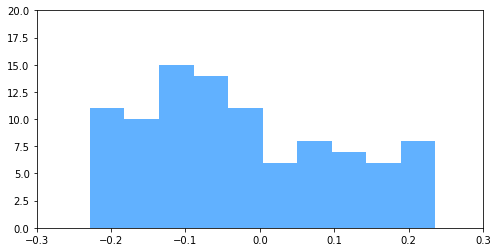

2022


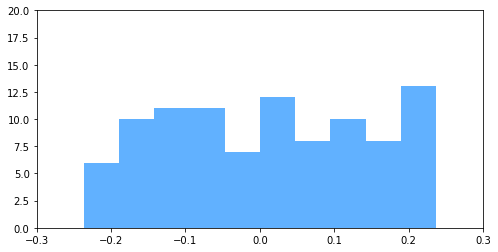

1933


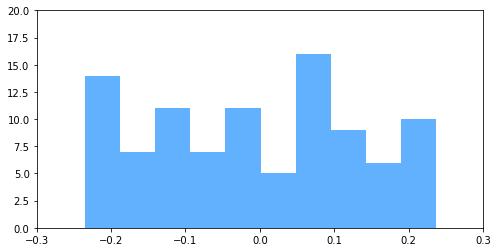

2609


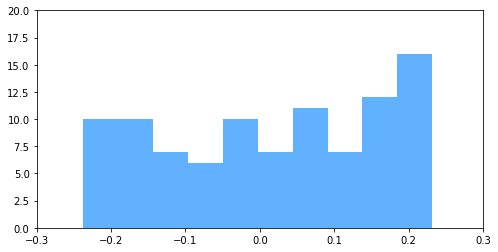

24


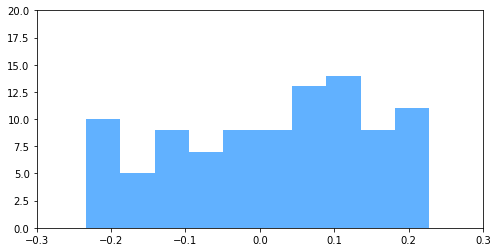

**************************************************
matrix 1, row 2
105


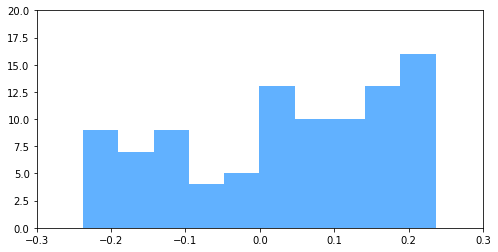

2022


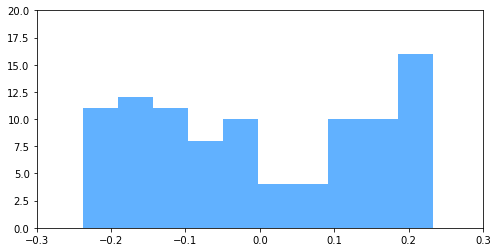

1933


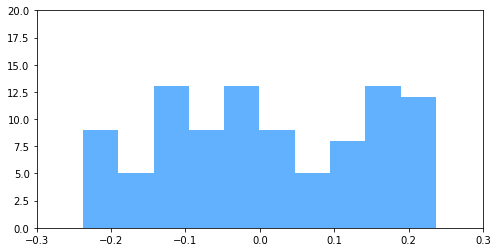

2609


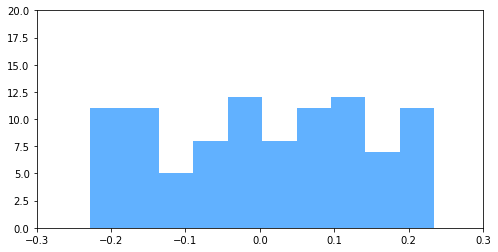

24


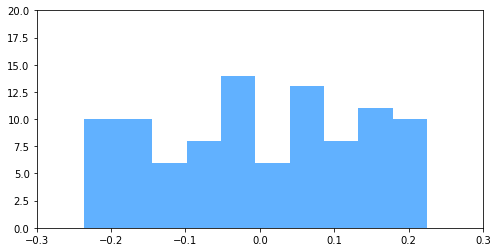

**************************************************
matrix 1, row 3
105


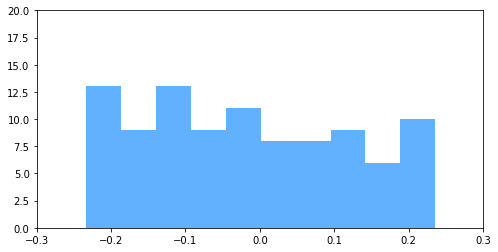

2022


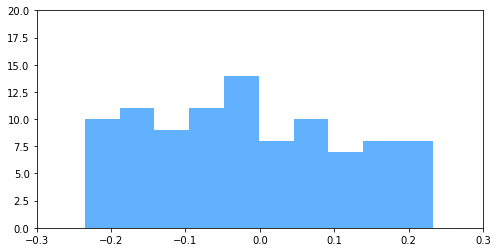

1933


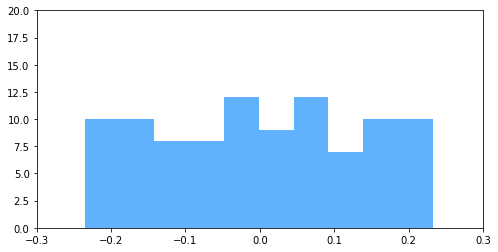

2609


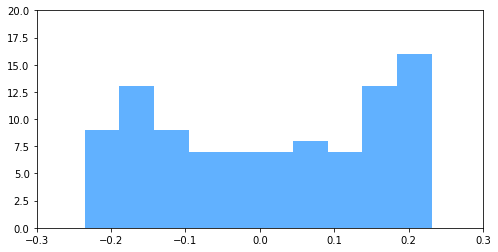

24


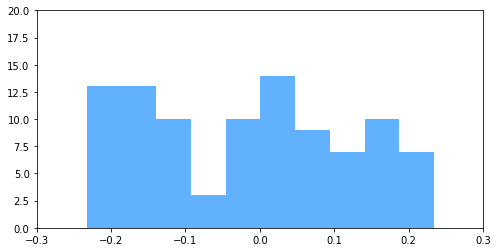

**************************************************
matrix 1, row 4
105


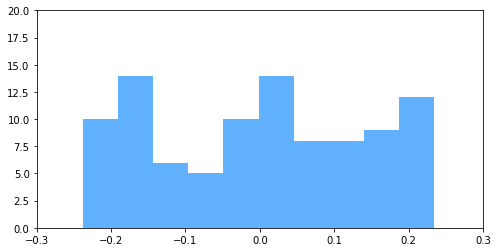

2022


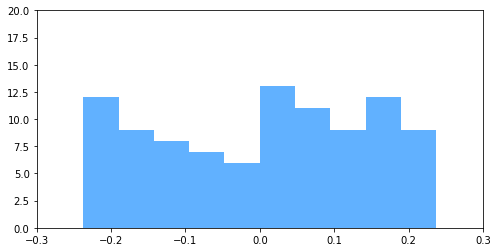

1933


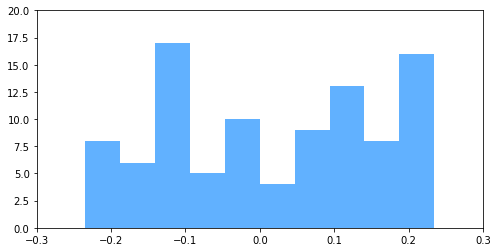

2609


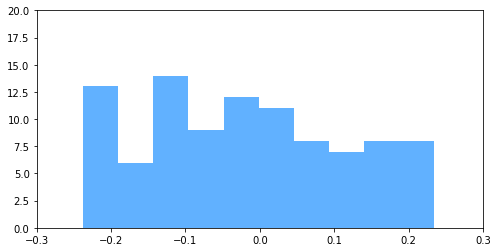

24


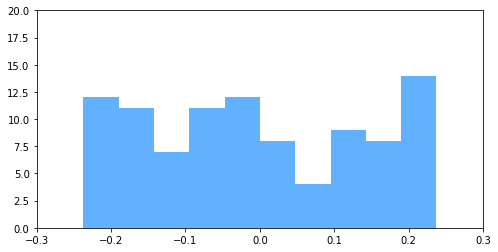

**************************************************
matrix 1, row 5
105


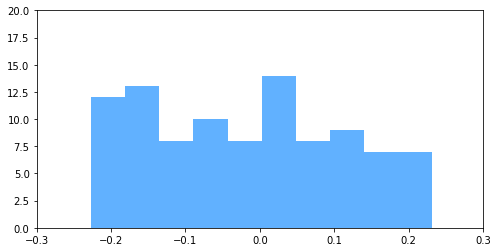

2022


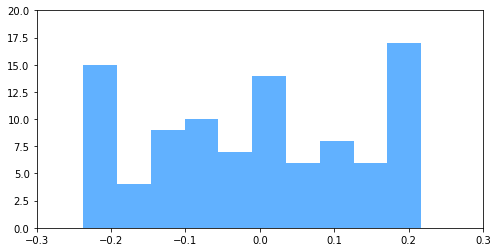

1933


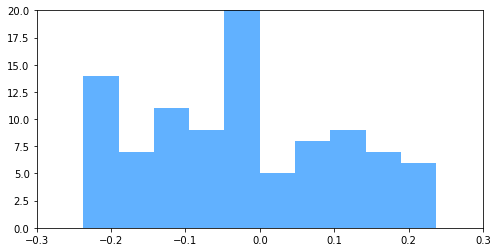

2609


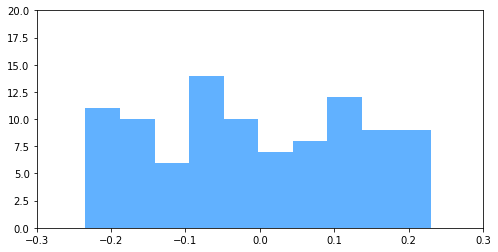

24


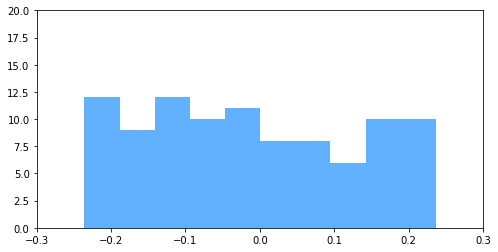

**************************************************
matrix 1, row 6
105


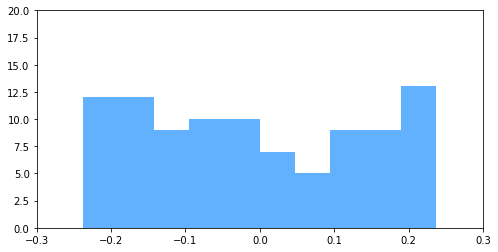

2022


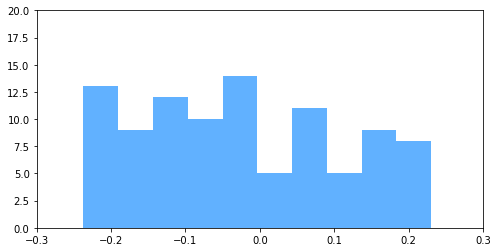

1933


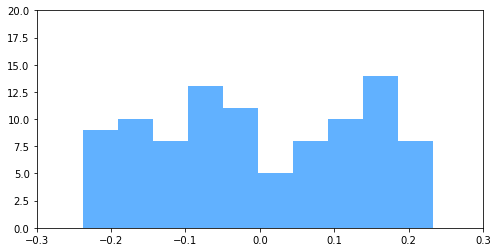

2609


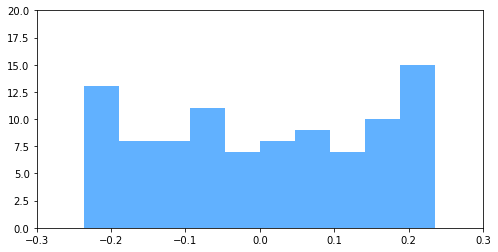

24


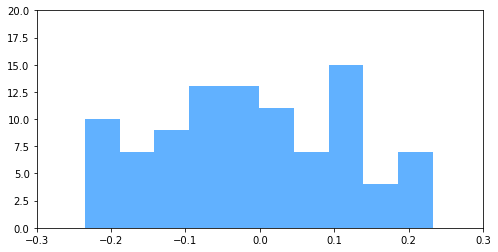

**************************************************
matrix 1, row 7
105


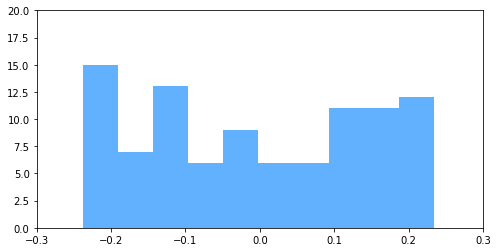

2022


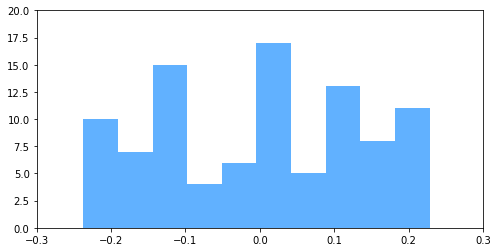

1933


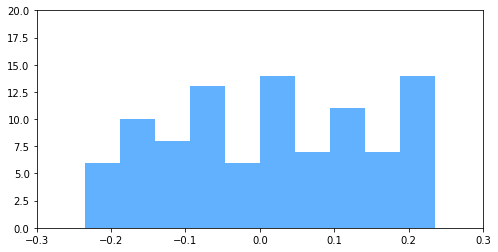

2609


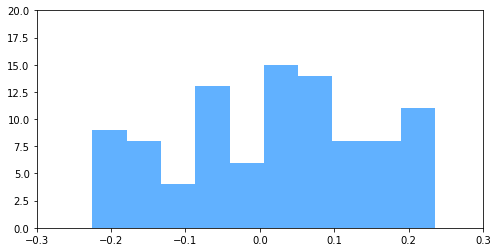

24


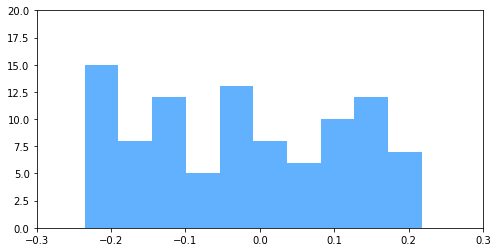

**************************************************
matrix 1, row 8
105


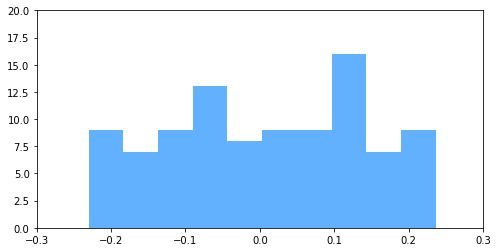

2022


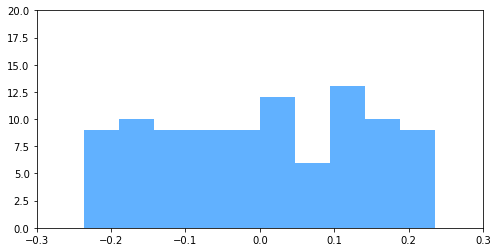

1933


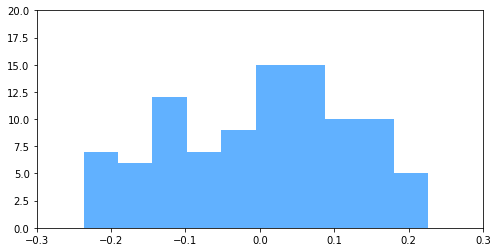

2609


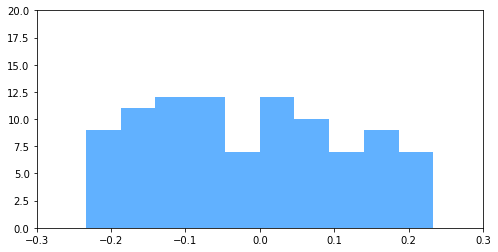

24


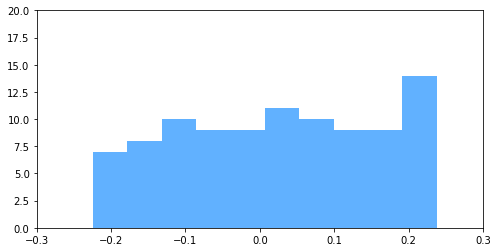

**************************************************
matrix 1, row 9
105


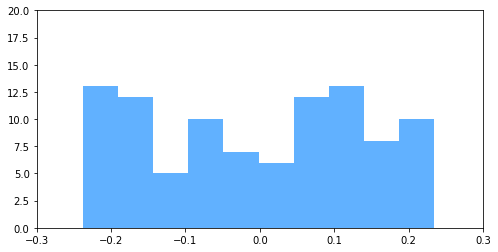

2022


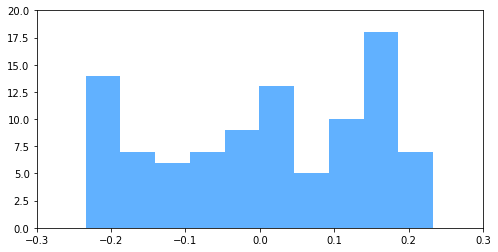

1933


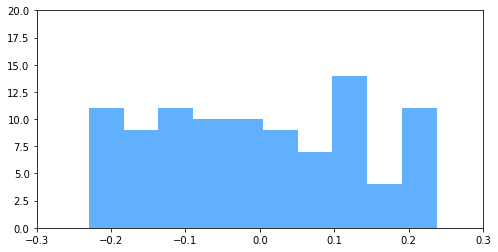

2609


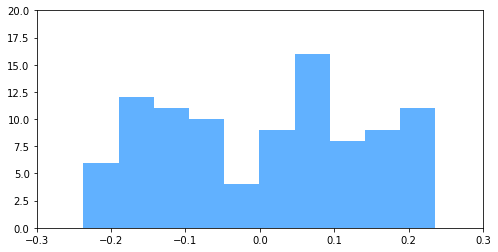

24


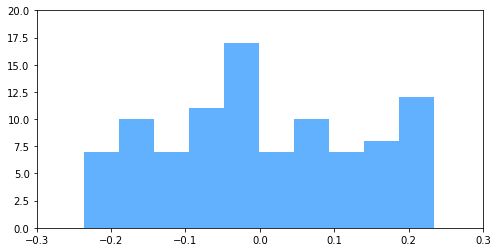

In [103]:
for i in range(10):
    print('*' * 50)
    print('matrix 1, row {}'.format(i))
    for seed in bad_seeds:
        print(seed)
        settings = dict(config)
        settings['ML']['models']['classifiers']['lstm']['seed'] = seed
        model = LSTMModel(settings)
        model.set_outer_fold(0)
        x = model._format_features(sequences)

        model._init_model(x)
        weights = model._model.layers[2].get_weights()
        ws = []
        w = weights[0]
        plt.figure(figsize=(8, 4))
        plt.hist(w[i], color='dodgerblue', alpha=0.7)
        plt.xlim([-0.3, 0.3])
        plt.ylim([0, 20])
        plt.show()
    

In [105]:
a = [1, 2, 4, 3, 1, 5]

In [106]:
a.sort()

In [107]:
a

[1, 1, 2, 3, 4, 5]

# Final Seed Search

In [7]:
pwd

'/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src'

In [16]:
path = '../experiments/seed_lstm/seed-final/seed_gridsearch/simplestate_secondslstm/binconcepts/lstm/raw_full/2022_02_21_1/gridsearch results/'
path_bis = '../experiments/seed_lstm/seed-final/seed-lstm/seed/simplestate_secondslstm/binconcepts/lstm/raw_full/2022_02_18_0/gridsearch results/'


In [17]:
with open(path + 'supgs_l900_f0.pkl', 'rb') as fp:
    gs = pickle.load(fp)
with open(path_bis + 'supgs_l900_f0.pkl', 'rb') as fp:
    gs_bis = pickle.load(fp)

In [20]:
seeds_results = {}
for i in gs._results:
    seeds_results[gs._results[i]['seed']] = gs._results[i]['mean_score']
    
seeds_results_bis = {}
for i in gs_bis._results:
    seeds_results_bis[gs_bis._results[i]['seed']] = gs_bis._results[i]['mean_score']

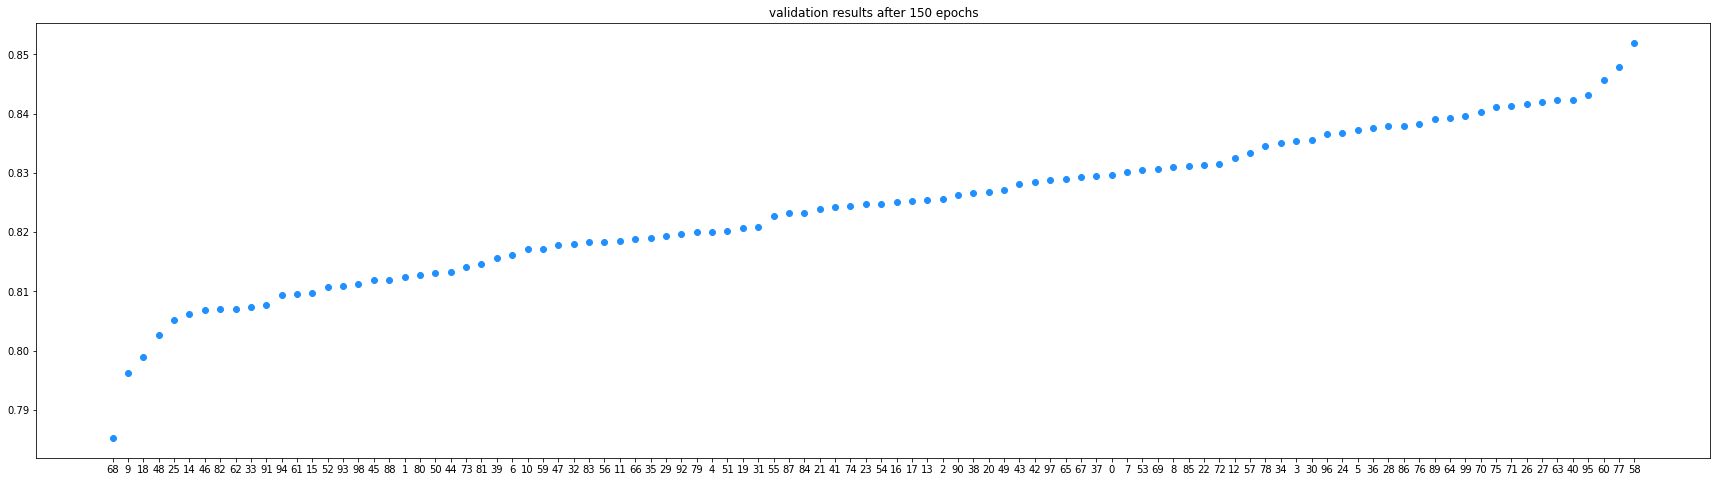

In [46]:
sr_df = pd.DataFrame.from_dict(seeds_results, orient='index')
sr_df = sr_df.sort_values(0)
plt.figure(figsize=(30, 8))
plt.scatter(range(len(sr_df)), sr_df, color='dodgerblue')
plt.xticks(range(len(sr_df)), sr_df.index)
plt.title('validation results after 150 epochs')
plt.show()

In [ ]:
srbis_df = pd.DataFrame.from_dict(seeds_results_bis, orient='index')
srbis_df = srbis_df.sort_values(0)
plt.figure(figsize=(30, 8))
plt.scatter(range(len(srbis_df)), srbis_df, color='dodgerblue')
plt.xticks(range(len(srbis_df)), srbis_df.index)
plt.title('validation results after 50 epochs')
plt.show()

In [36]:
sr_df

0
68  0.785287
9   0.796296
18  0.798958
48  0.802704
25  0.805130
..       ...
40  0.842356
95  0.843167
60  0.845630
77  0.847810
58  0.851958

[100 rows x 1 columns]